<a href="https://colab.research.google.com/github/yifeiz-bu/Undergrad-researches/blob/main/oceanic_ridge_inspection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install netCDF4
from google.colab import drive
drive.mount('/content/drive')
from netCDF4 import Dataset as NetCDFFile 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
nc = NetCDFFile('/content/drive/My Drive/Colab Notebooks/woa23_decav.nc')
nc
print(nc.variables.keys())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.6 MB/s eta 0:00:00
Mounted at /content/drive
dict_keys(['crs', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'depth', 'depth_bnds', 'time', 'climatology_bounds', 't_an', 't_mn', 't_dd', 't_sd', 't_se', 't_oa', 't_gp'])


# SST view

In [2]:
lat = nc.variables['lat'][49:101]
lon = nc.variables['lon'][159:176]
depth = nc.variables['depth'][:]
temp = nc.variables['t_an'][0,:,49:101,159:176]

In [3]:
temp.shape

(102, 52, 17)

In [4]:
lat.shape

(52,)

In [5]:
lon.shape

(17,)

In [6]:
T = temp[0,:,:]

In [7]:
T.shape

(52, 17)

In [8]:
Tt= np.transpose(T[:,:])

In [9]:
latv, lonv = np.meshgrid(lat,lon,indexing='xy')
latv.shape



(17, 52)

In [10]:
Tt.shape

(17, 52)

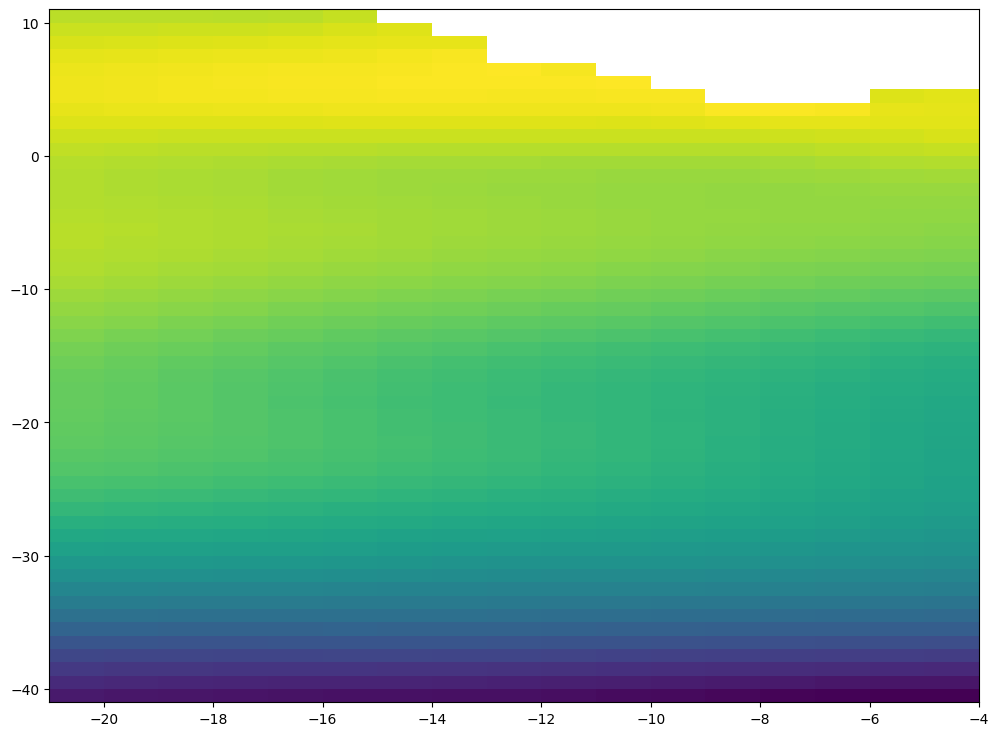

In [11]:
fig = plt.figure(figsize=(12,9))
plt.pcolormesh(lonv,latv,Tt) #doesn't match the grid of X and Y axis（15，52）to(360,180)
plt.show()

In [12]:
depth.shape

(102,)

# Side/vertical view


In [13]:
depth

masked_array(data=[0.00e+00, 5.00e+00, 1.00e+01, 1.50e+01, 2.00e+01,
                   2.50e+01, 3.00e+01, 3.50e+01, 4.00e+01, 4.50e+01,
                   5.00e+01, 5.50e+01, 6.00e+01, 6.50e+01, 7.00e+01,
                   7.50e+01, 8.00e+01, 8.50e+01, 9.00e+01, 9.50e+01,
                   1.00e+02, 1.25e+02, 1.50e+02, 1.75e+02, 2.00e+02,
                   2.25e+02, 2.50e+02, 2.75e+02, 3.00e+02, 3.25e+02,
                   3.50e+02, 3.75e+02, 4.00e+02, 4.25e+02, 4.50e+02,
                   4.75e+02, 5.00e+02, 5.50e+02, 6.00e+02, 6.50e+02,
                   7.00e+02, 7.50e+02, 8.00e+02, 8.50e+02, 9.00e+02,
                   9.50e+02, 1.00e+03, 1.05e+03, 1.10e+03, 1.15e+03,
                   1.20e+03, 1.25e+03, 1.30e+03, 1.35e+03, 1.40e+03,
                   1.45e+03, 1.50e+03, 1.55e+03, 1.60e+03, 1.65e+03,
                   1.70e+03, 1.75e+03, 1.80e+03, 1.85e+03, 1.90e+03,
                   1.95e+03, 2.00e+03, 2.10e+03, 2.20e+03, 2.30e+03,
                   2.40e+03, 2.50e

In [14]:
lat = nc.variables['lat'][49:101]
lon = nc.variables['lon'][165]
depth = nc.variables['depth'][0:40]
temp = nc.variables['t_an'][0,0:40,49:101,165]

In [15]:
depth=depth*-1

In [16]:
for i in [lat,lon,depth,temp]:
  i.shape
  print(i.shape)

(52,)
()
(40,)
(40, 52)


In [17]:
latv,depthv= np.meshgrid(lat,depth,indexing='xy')
latv.shape

(40, 52)

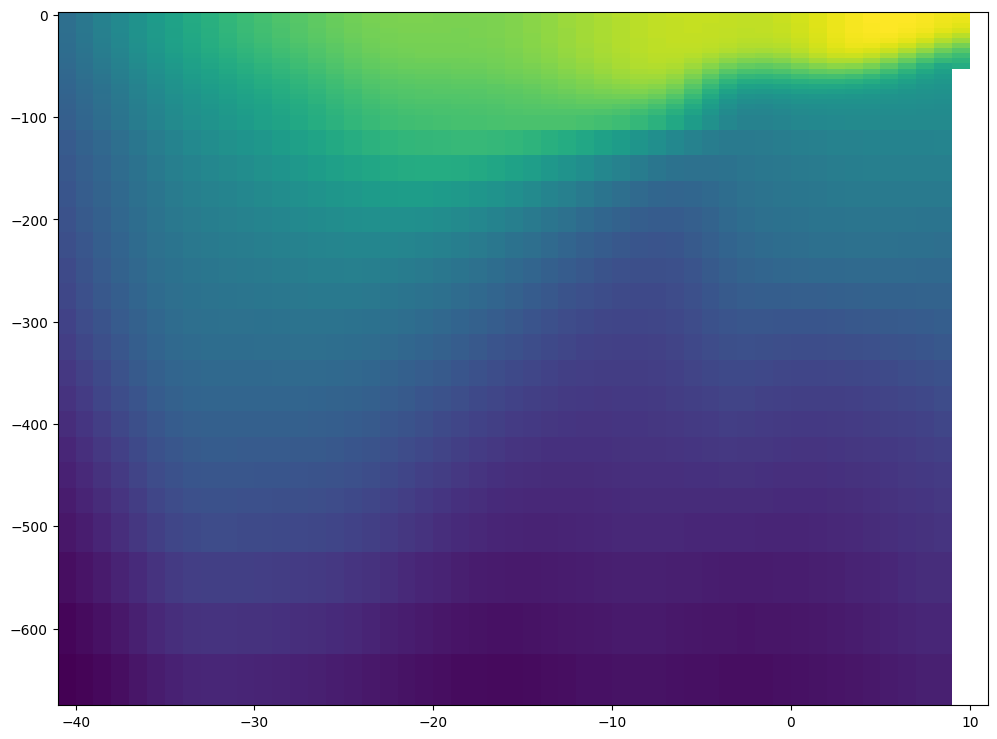

In [18]:
fig = plt.figure(figsize=(12,9))
plt.pcolormesh(latv,depthv,temp) 
plt.show()

latitude cut-off

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:718: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


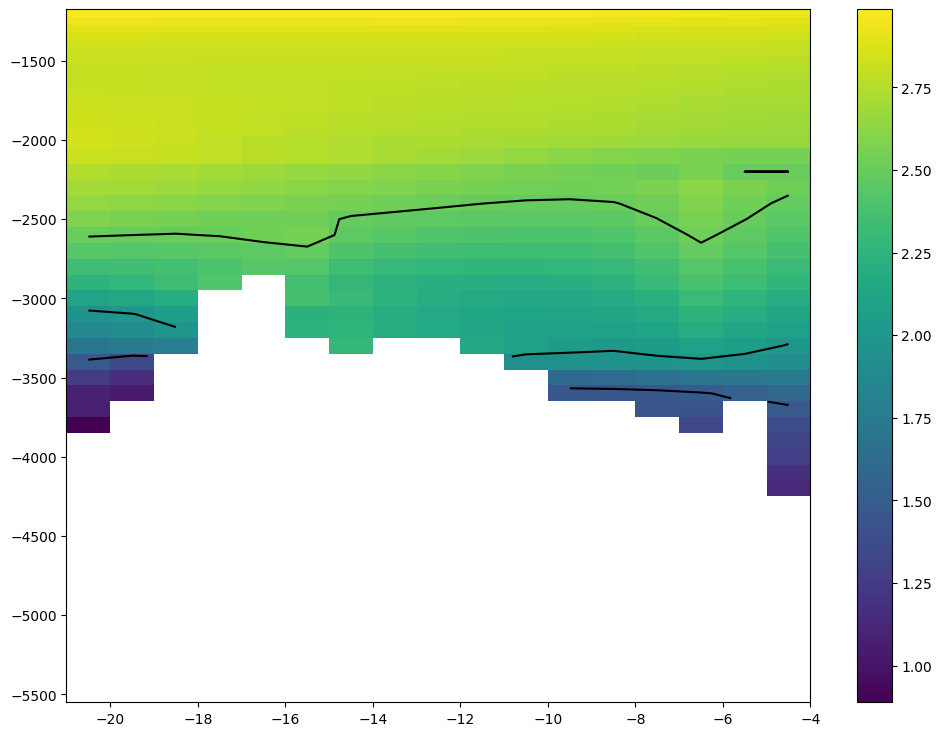

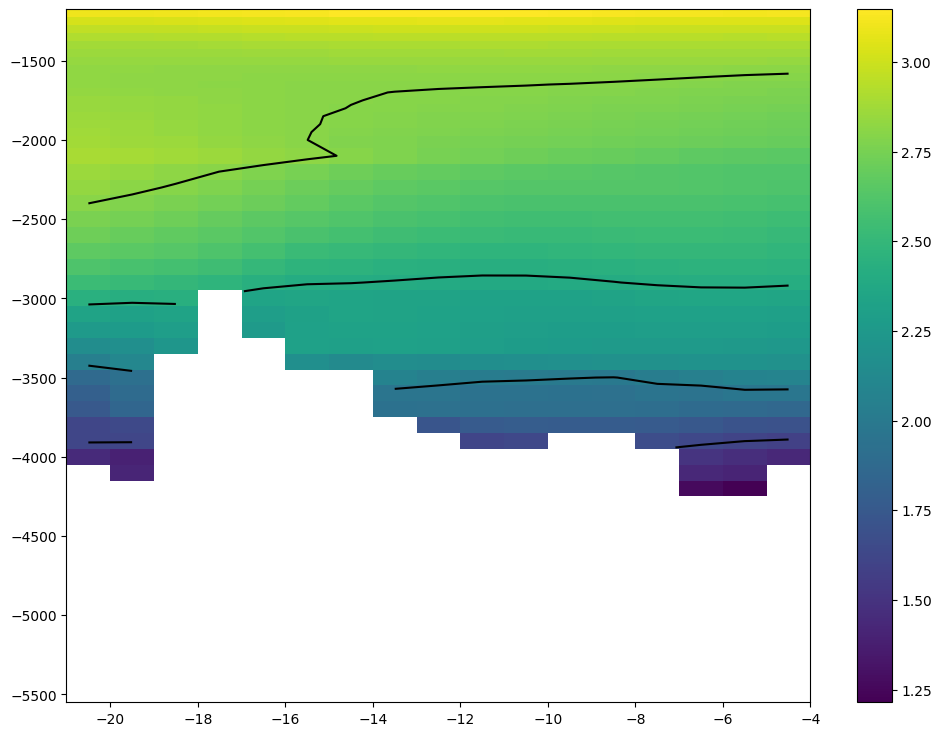

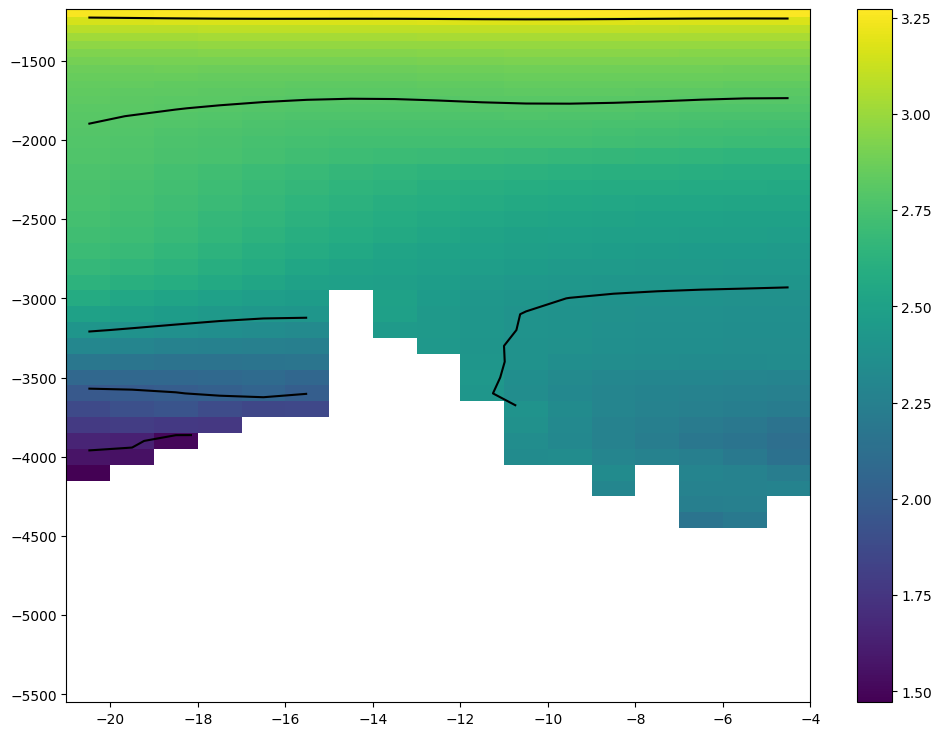

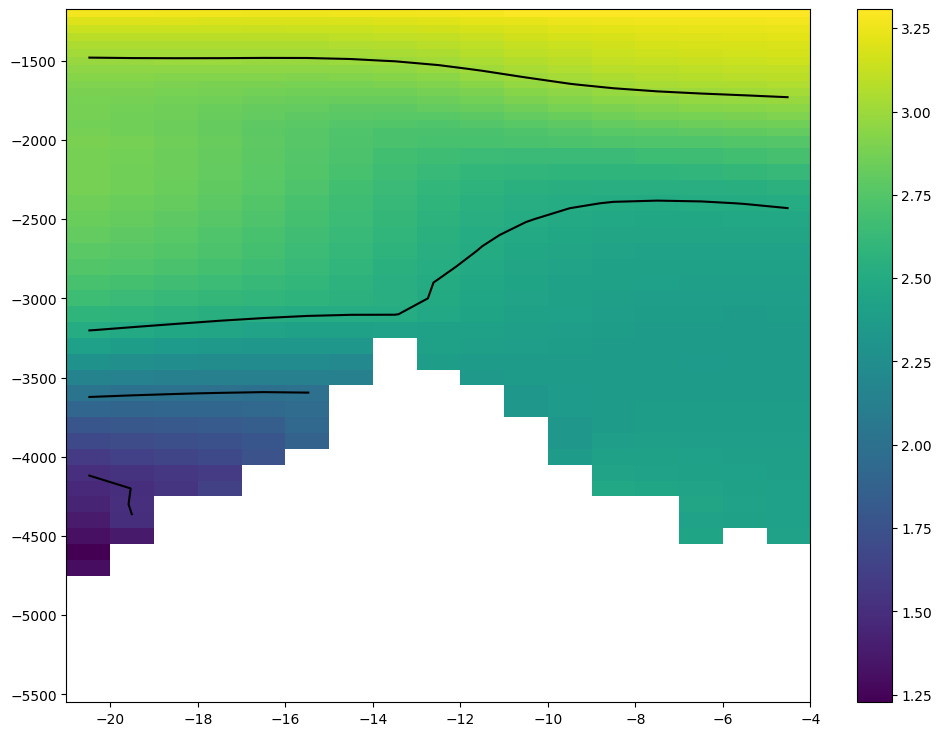

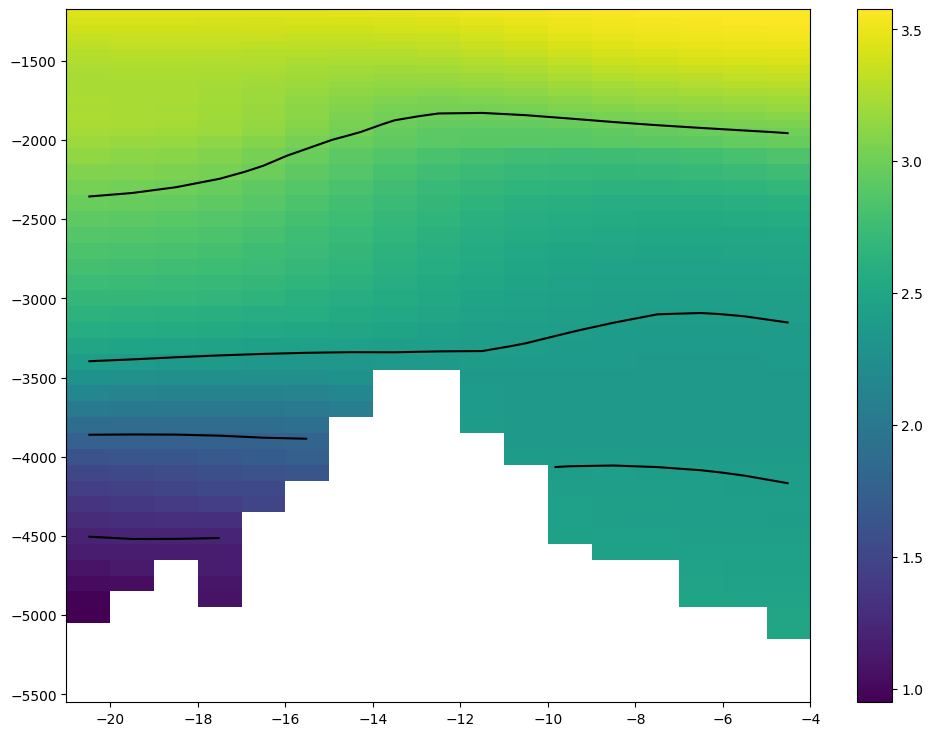

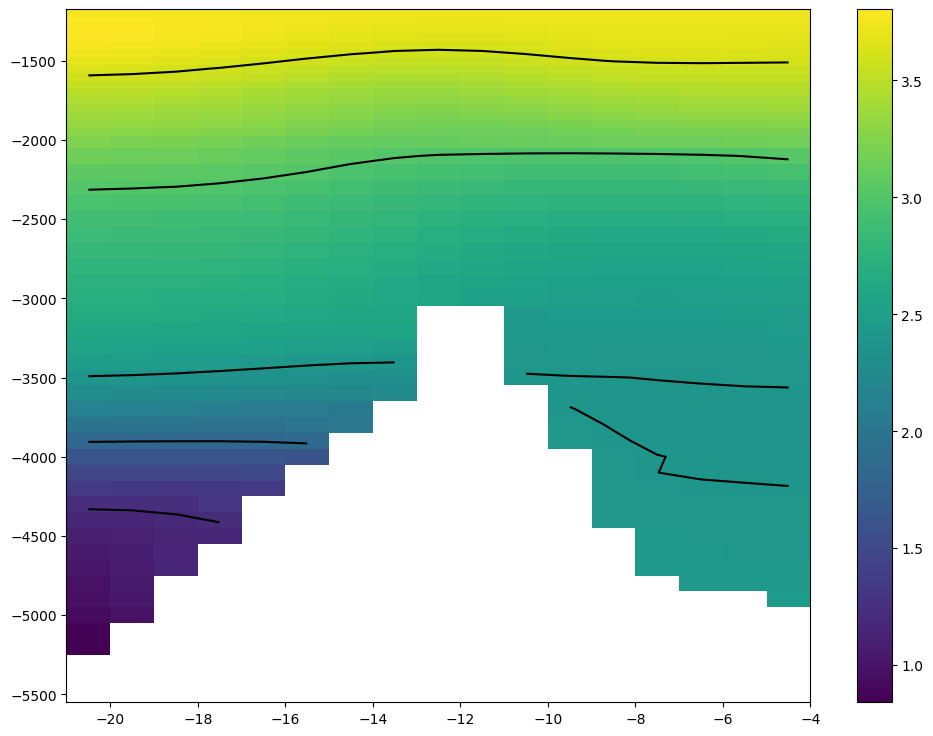

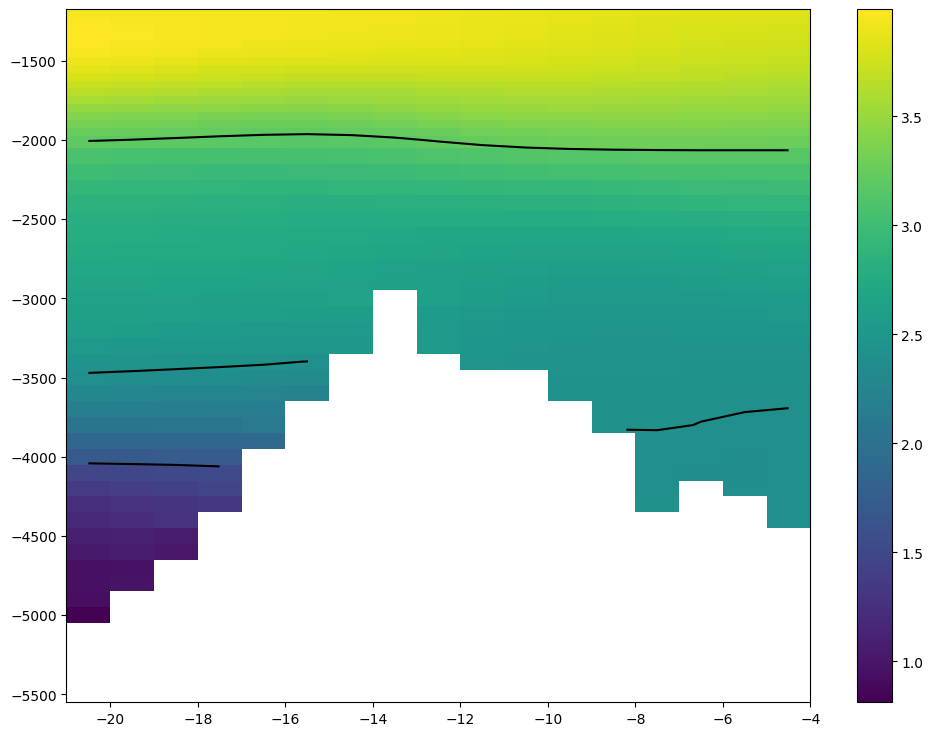

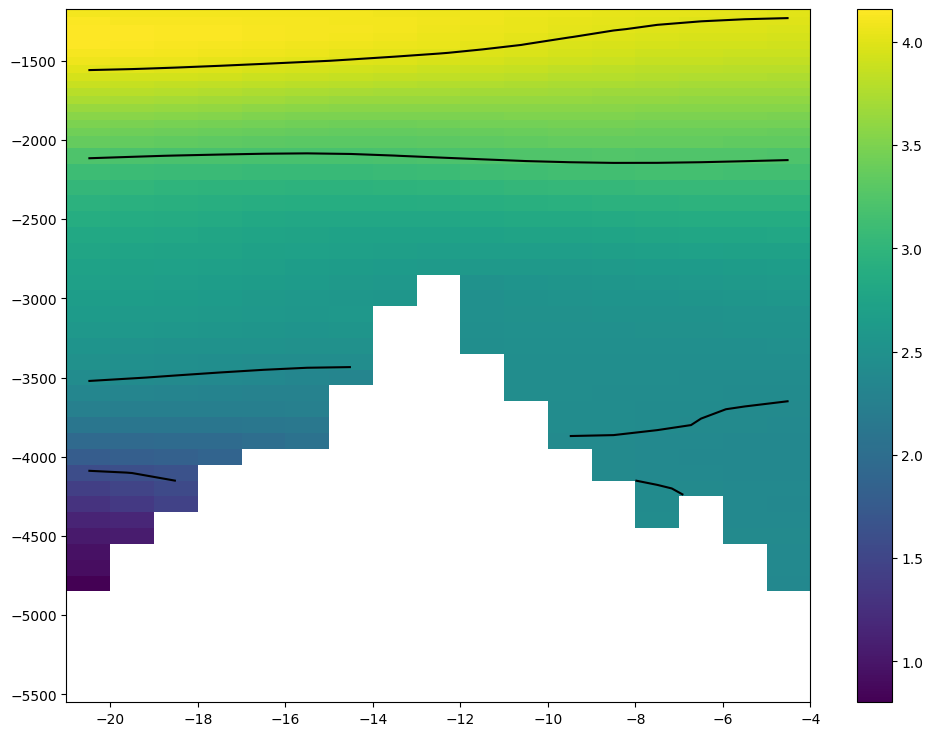

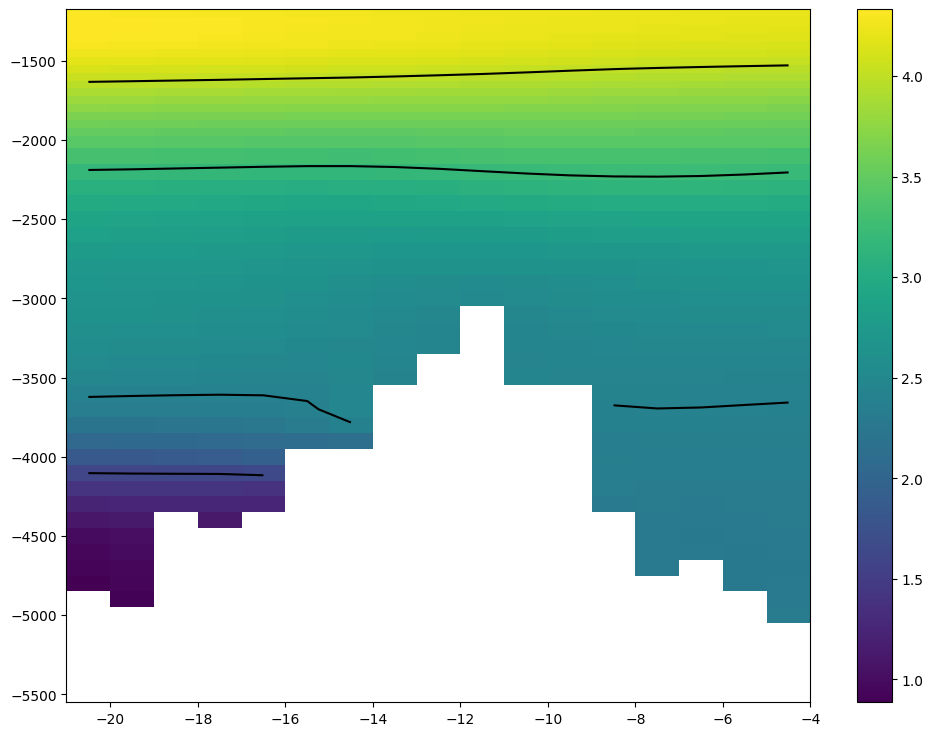

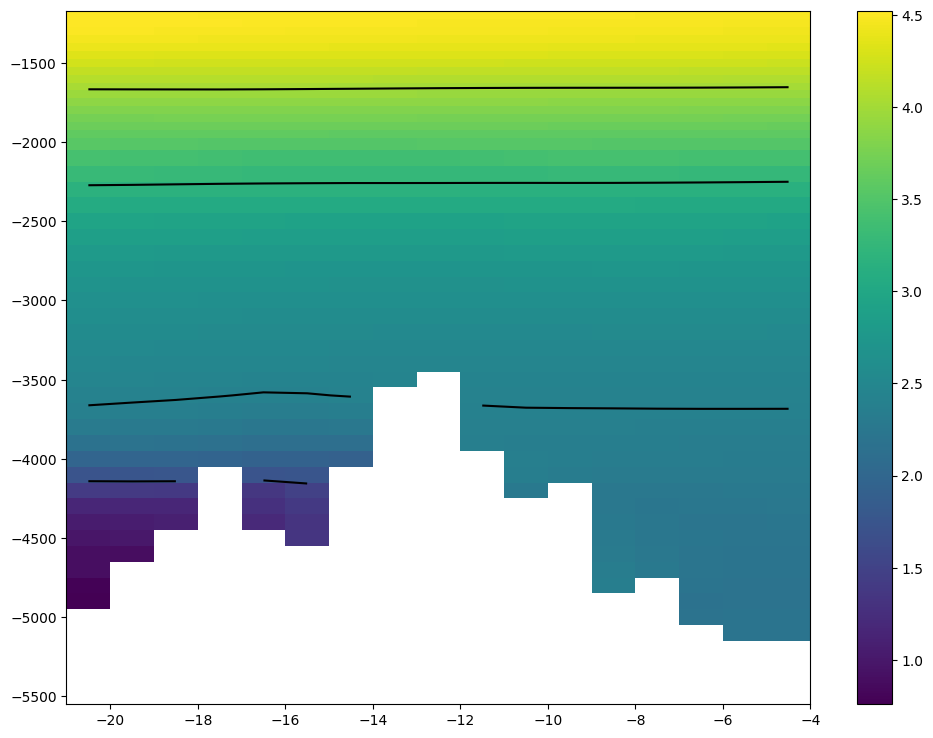

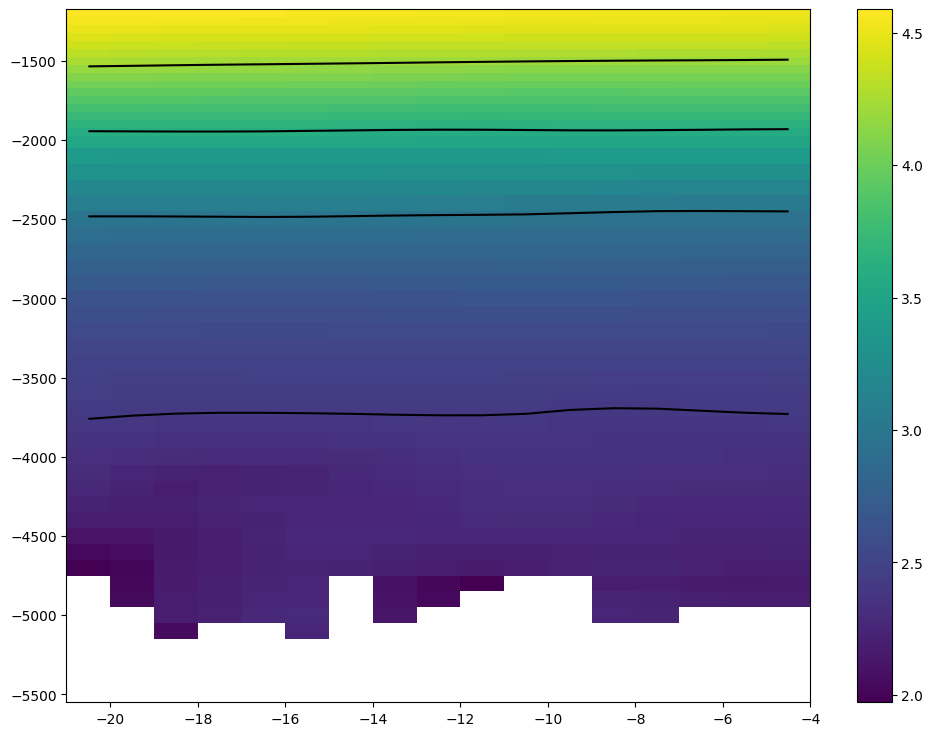

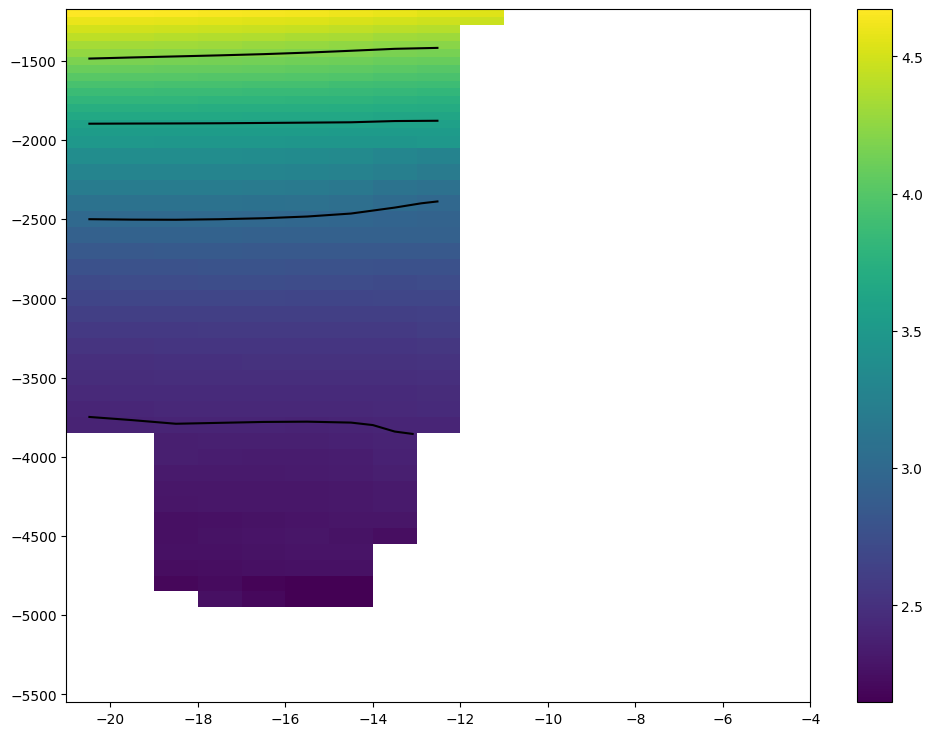

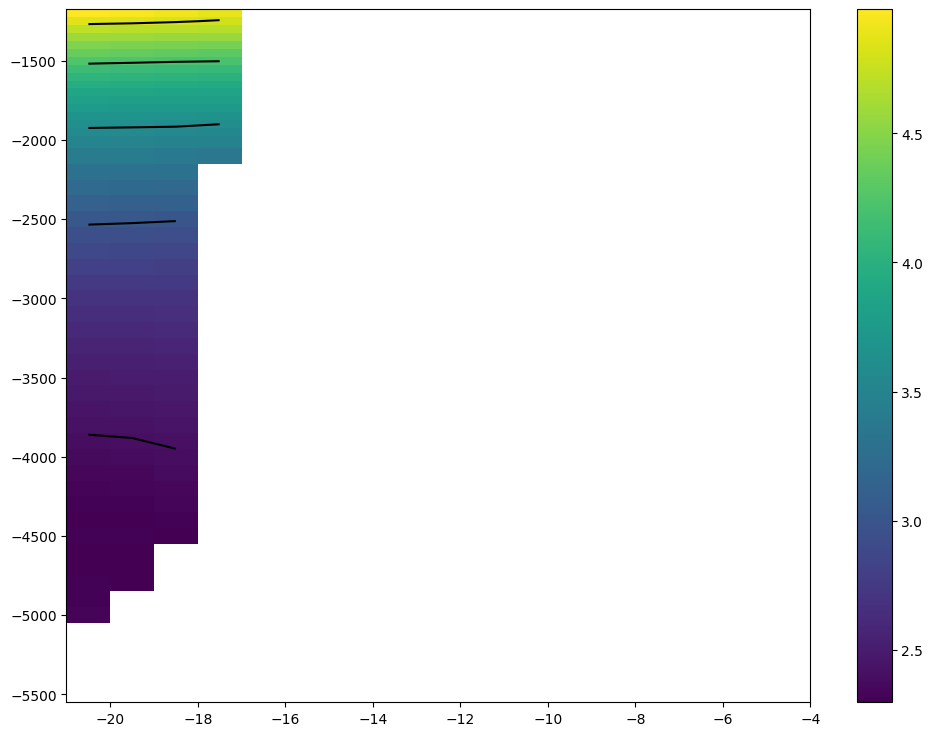

In [19]:
for i in np.linspace(49,101,13):
  lat = nc.variables['lat'][i]
  lon = nc.variables['lon'][159:176]
  depth = nc.variables['depth'][50:120]
  temp = nc.variables['t_an'][0,50:120,i,159:176]
  depth=depth*-1
  lonv,depthv= np.meshgrid(lon,depth,indexing='xy')
  fig = plt.figure(figsize=(12,9))
  cont = plt.contour(lonv,depthv,temp,4,colors='k',origin='lower') 
  plt.pcolormesh(lonv,depthv,temp) 
  plt.colorbar()
  plt.show()
  

longitude cut-off

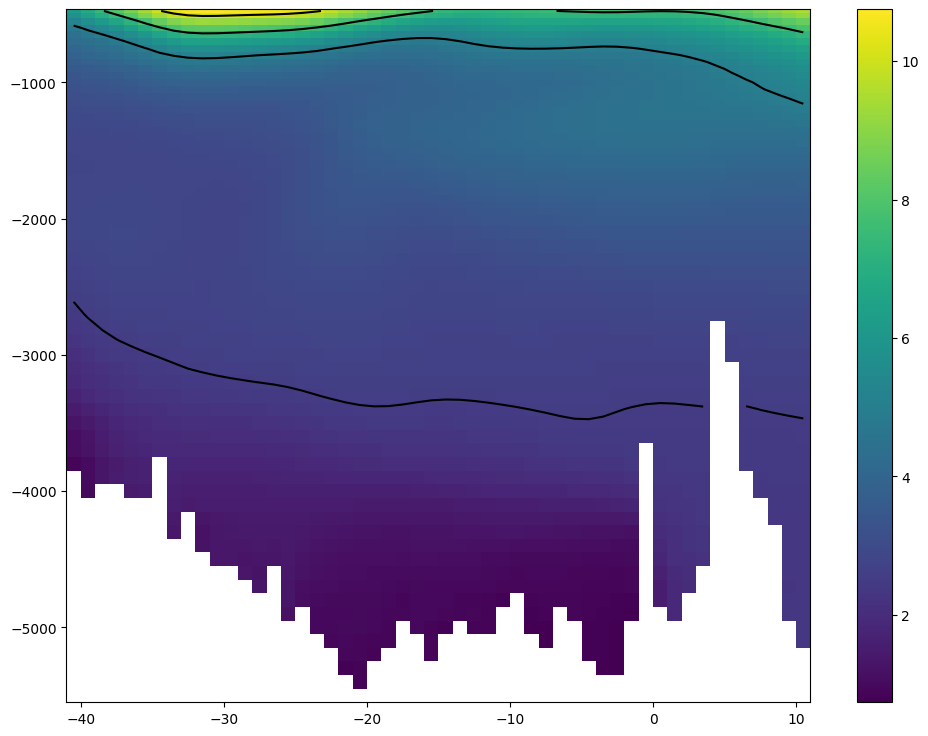

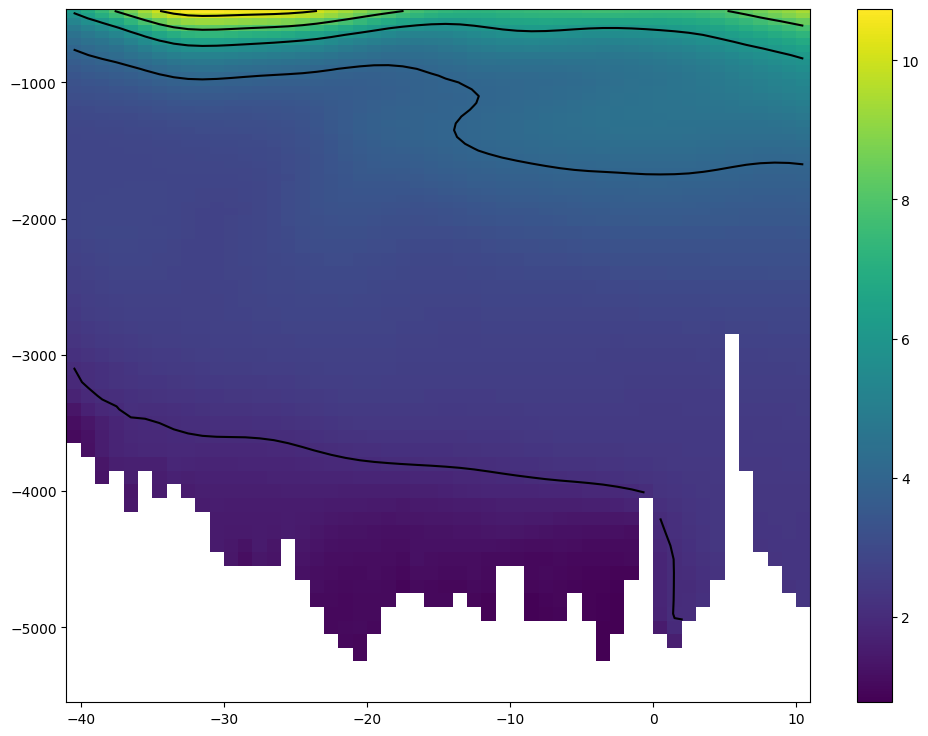

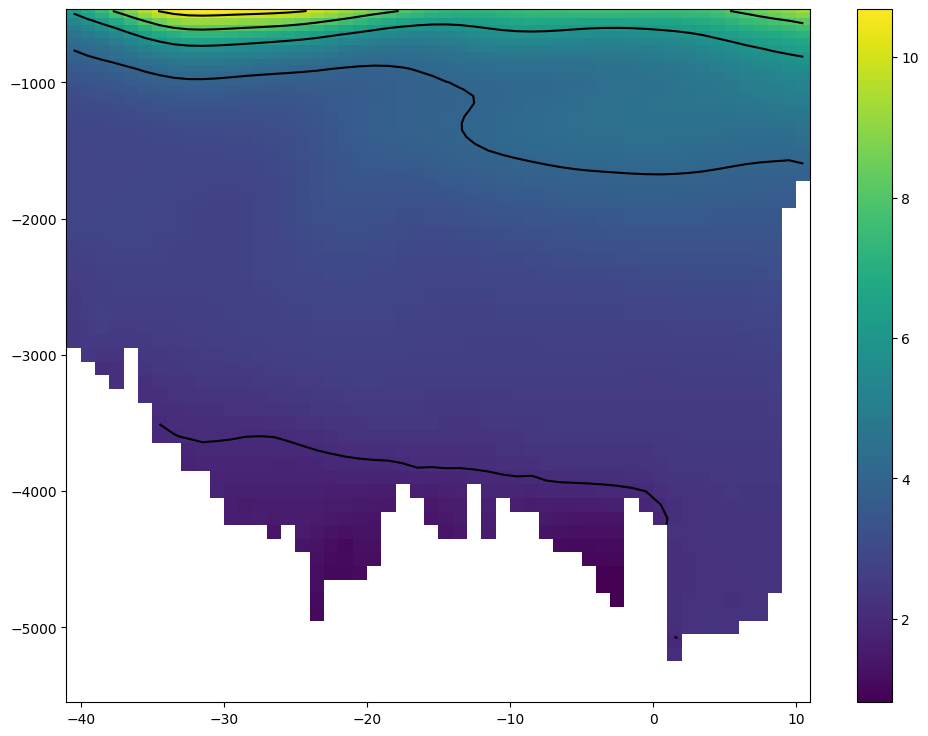

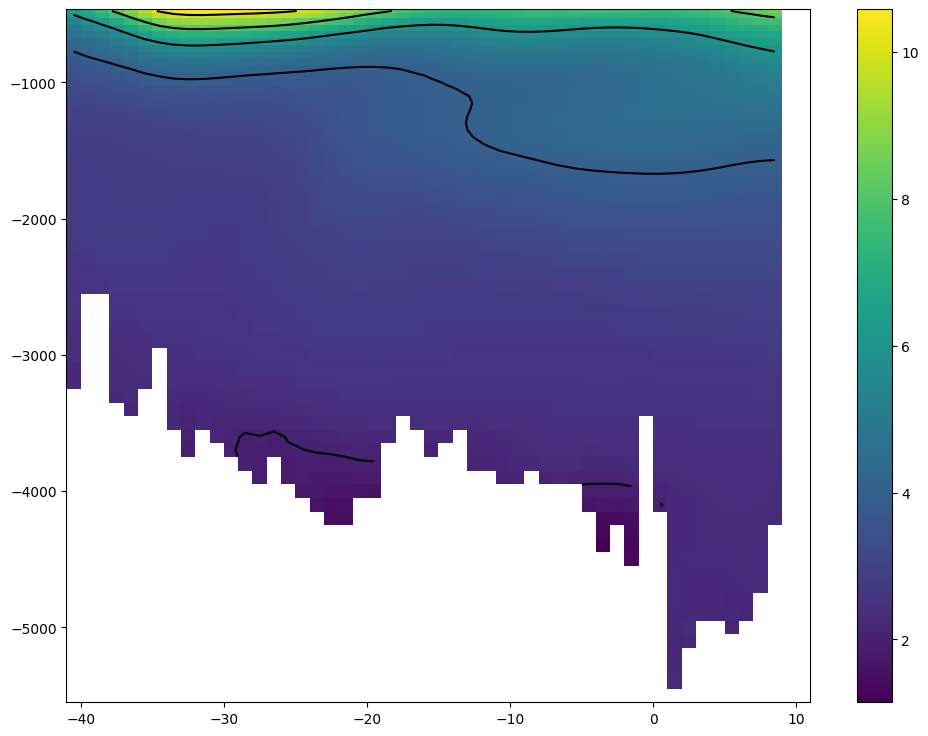

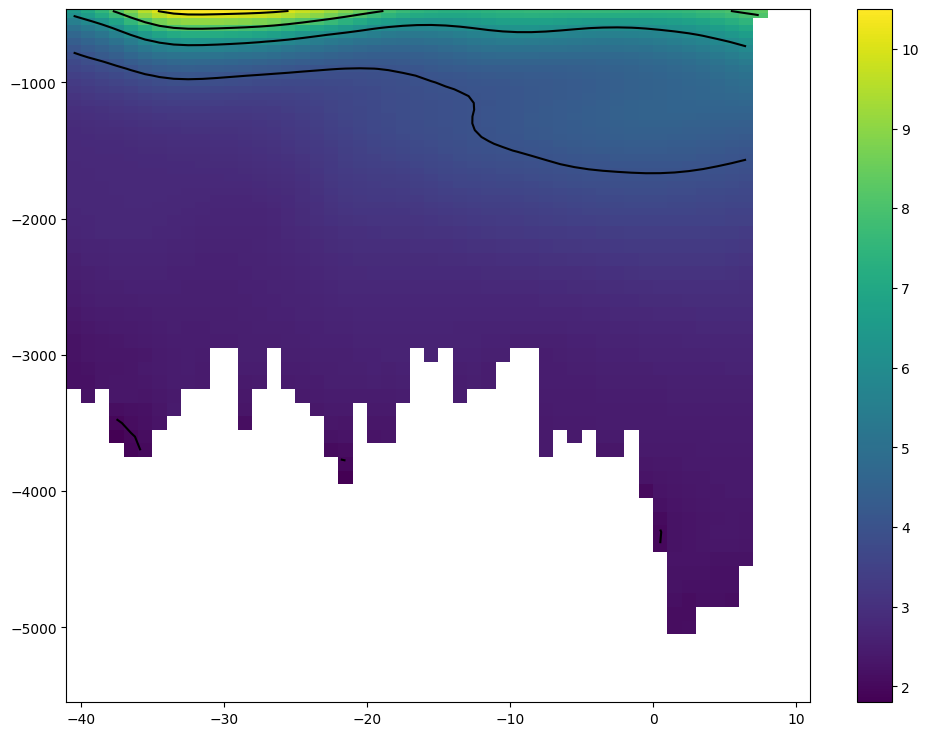

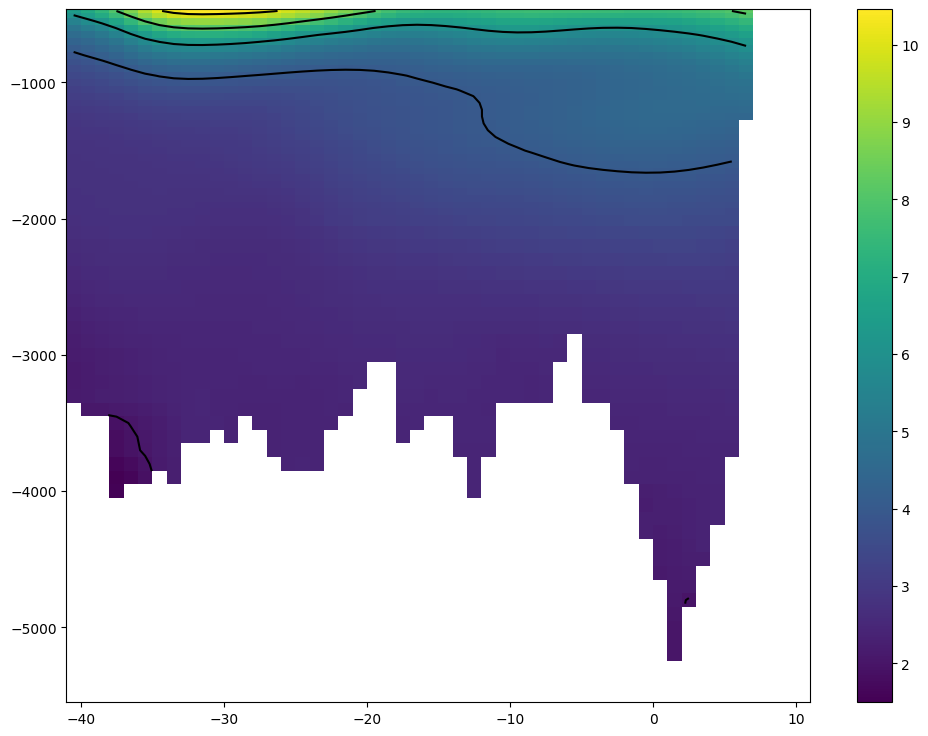

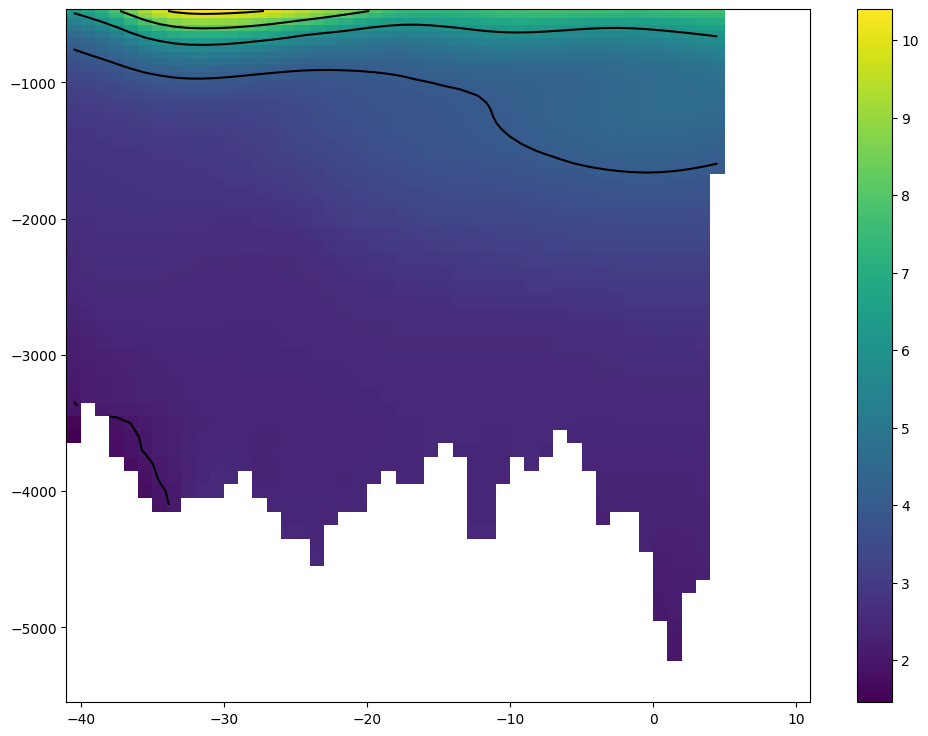

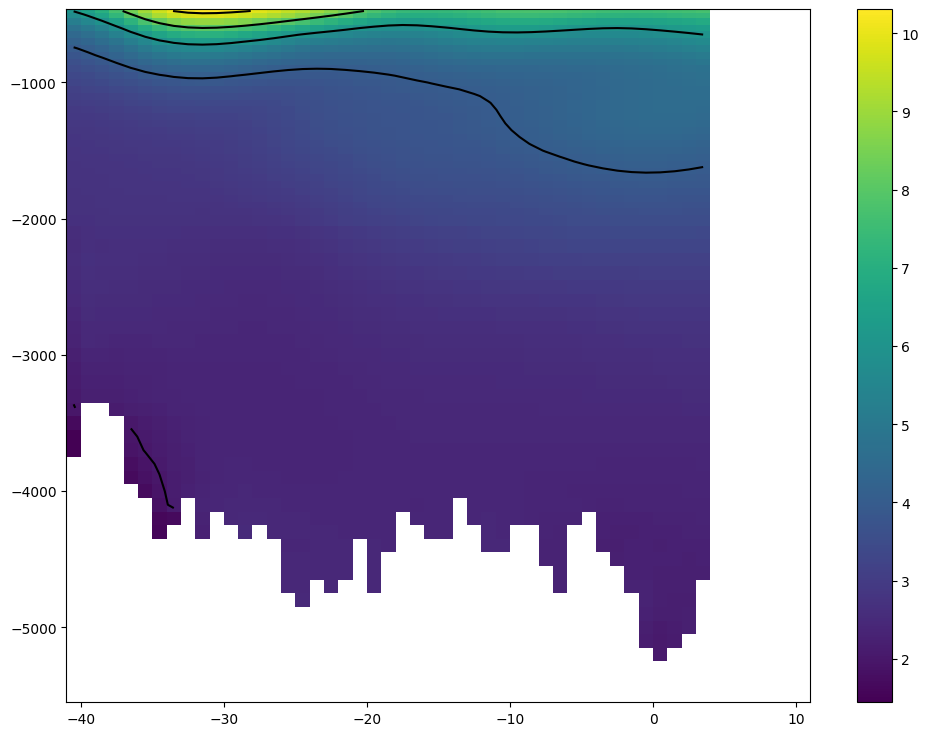

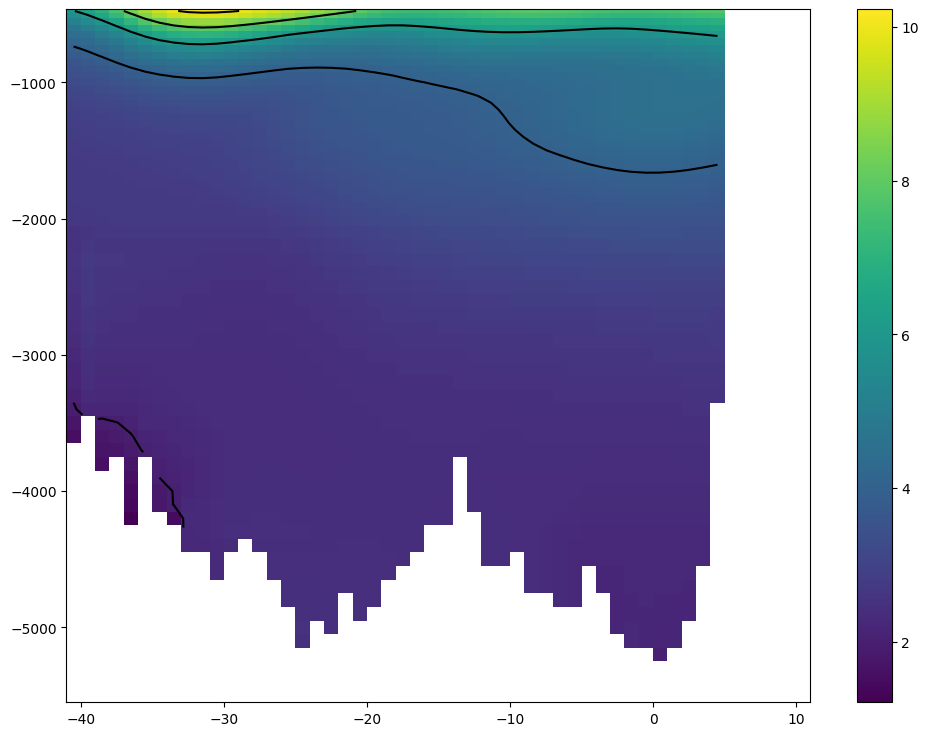

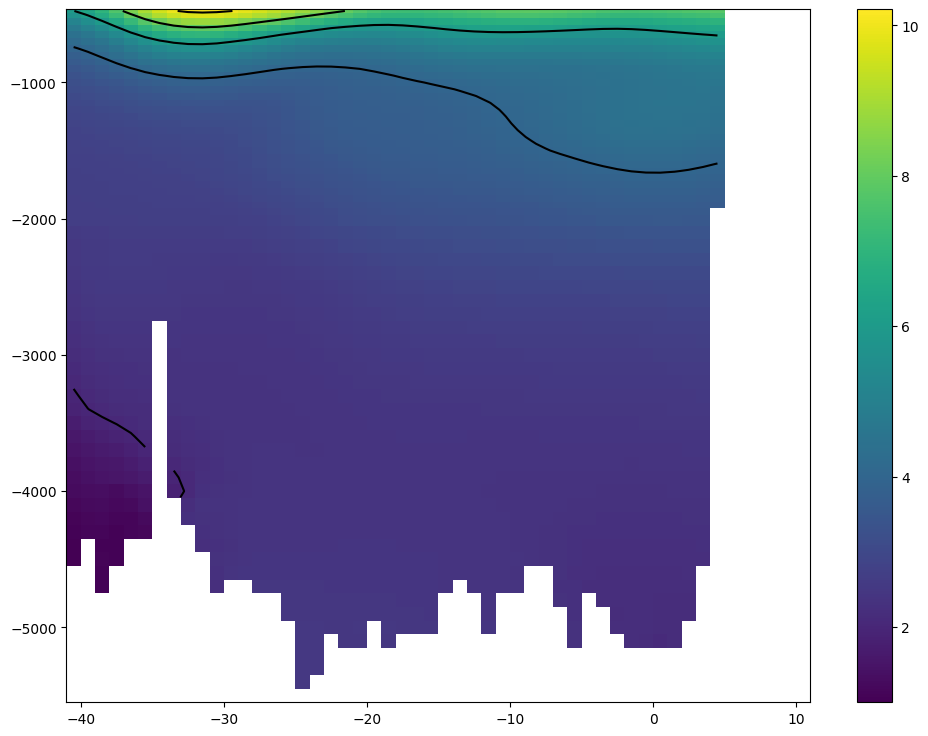

In [20]:
for i in np.linspace(159,176,10):
  lat = nc.variables['lat'][49:101]
  lon = nc.variables['lon'][i]
  depth = nc.variables['depth'][35:140]
  temp = nc.variables['t_an'][0,35:140,49:101,i]
  depth=depth*-1
  latv,depthv= np.meshgrid(lat,depth,indexing='xy')
  fig = plt.figure(figsize=(12,9))
  cont = plt.contour(latv,depthv,temp,4,colors='k',origin='lower')
  plt.pcolormesh(latv,depthv,temp) 
  plt.colorbar()
  plt.show()

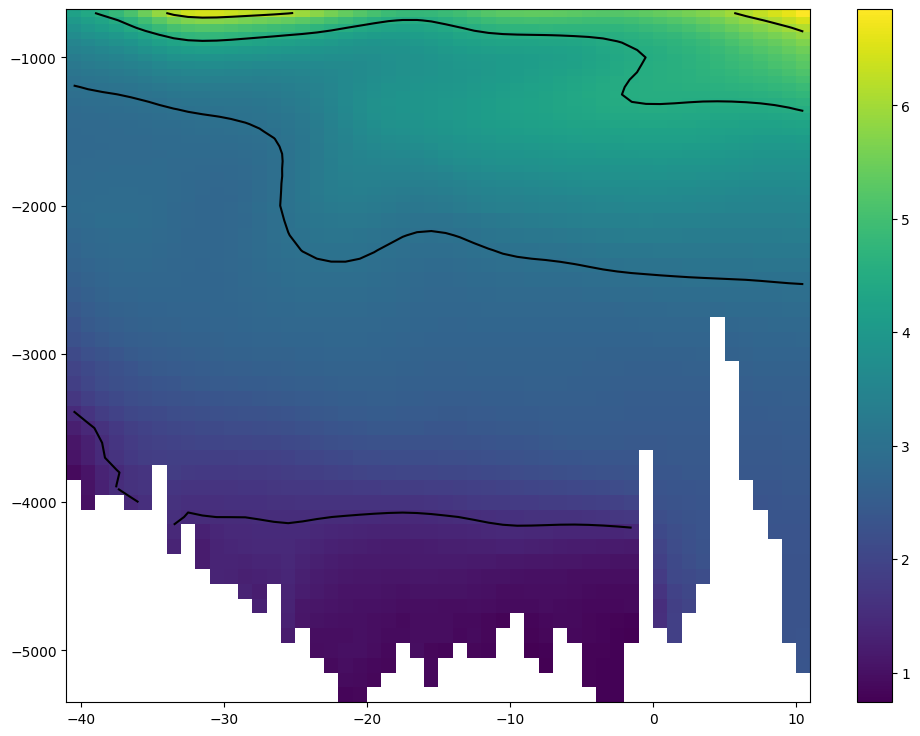

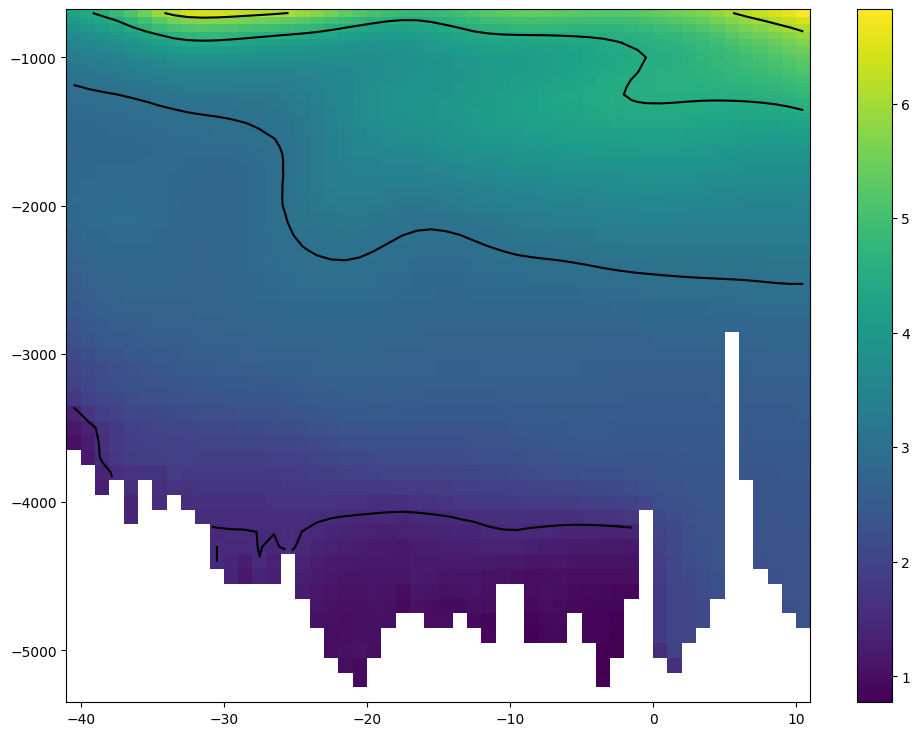

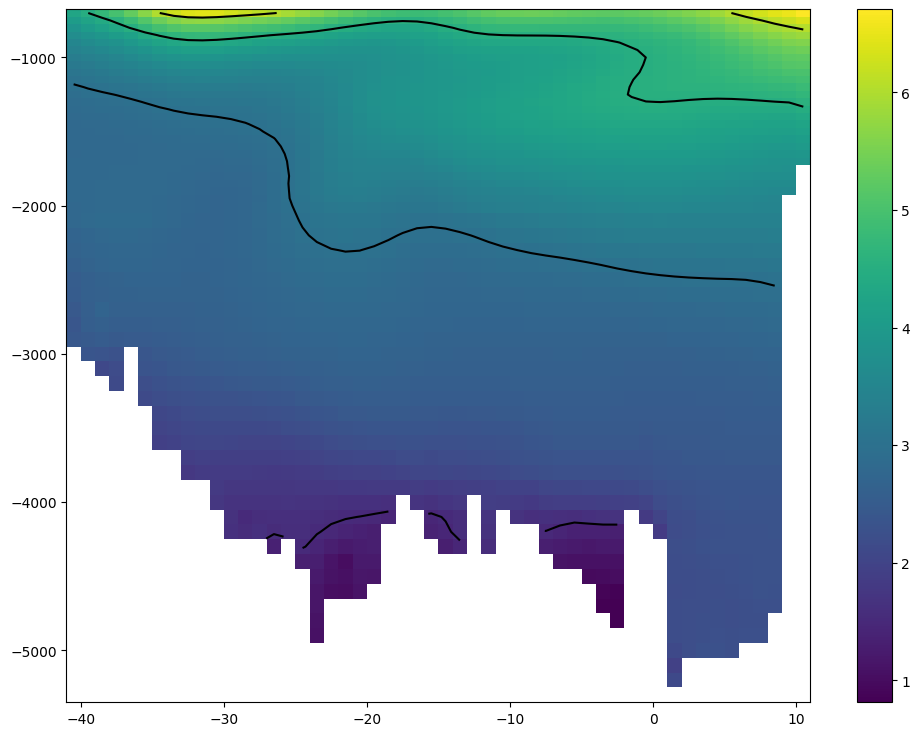

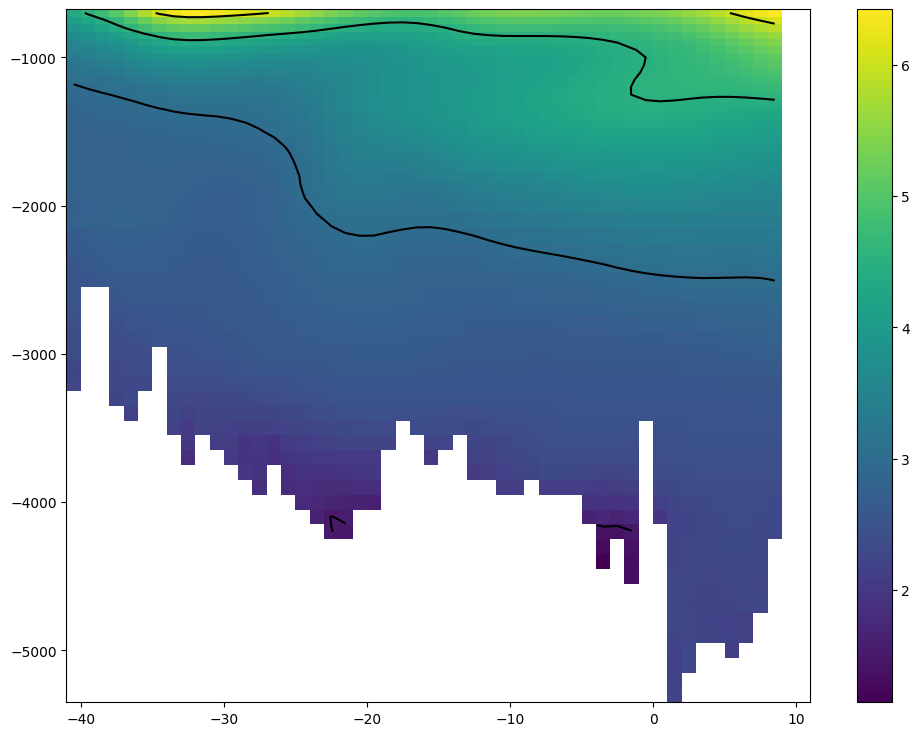

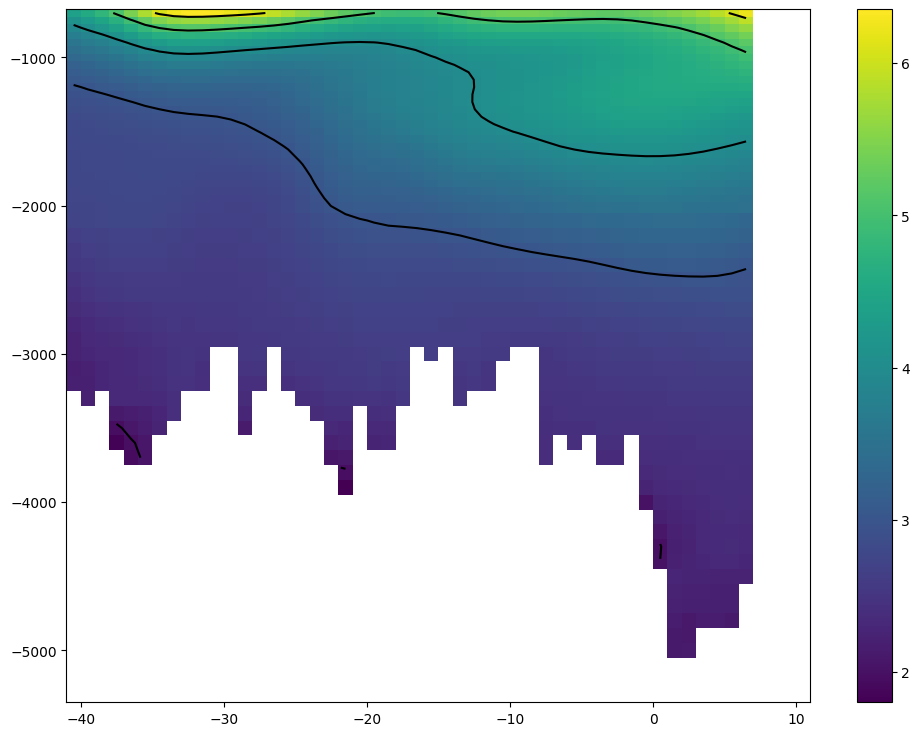

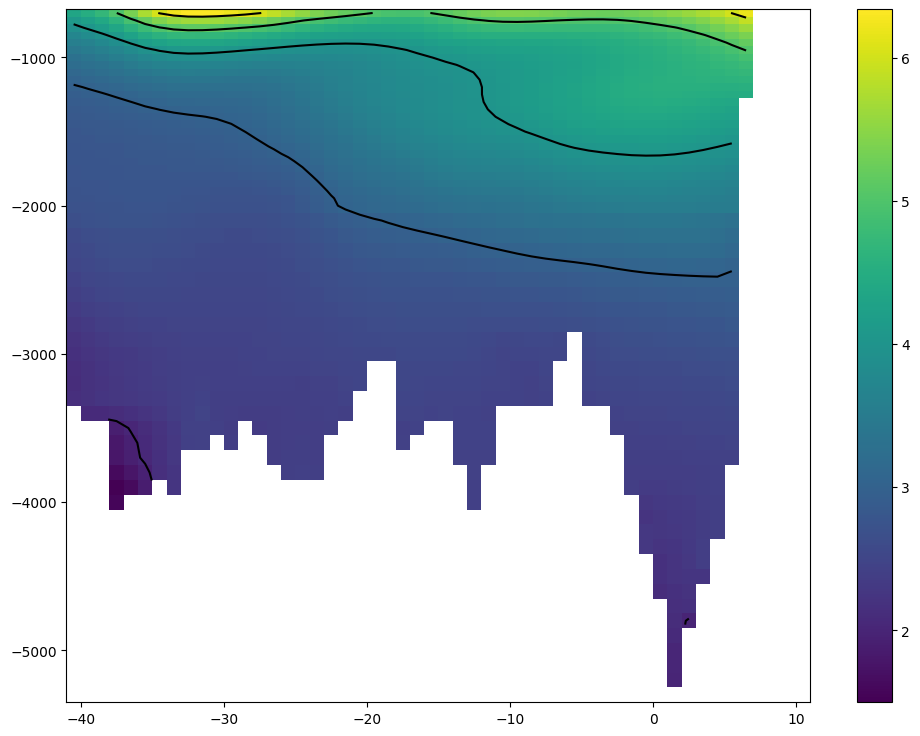

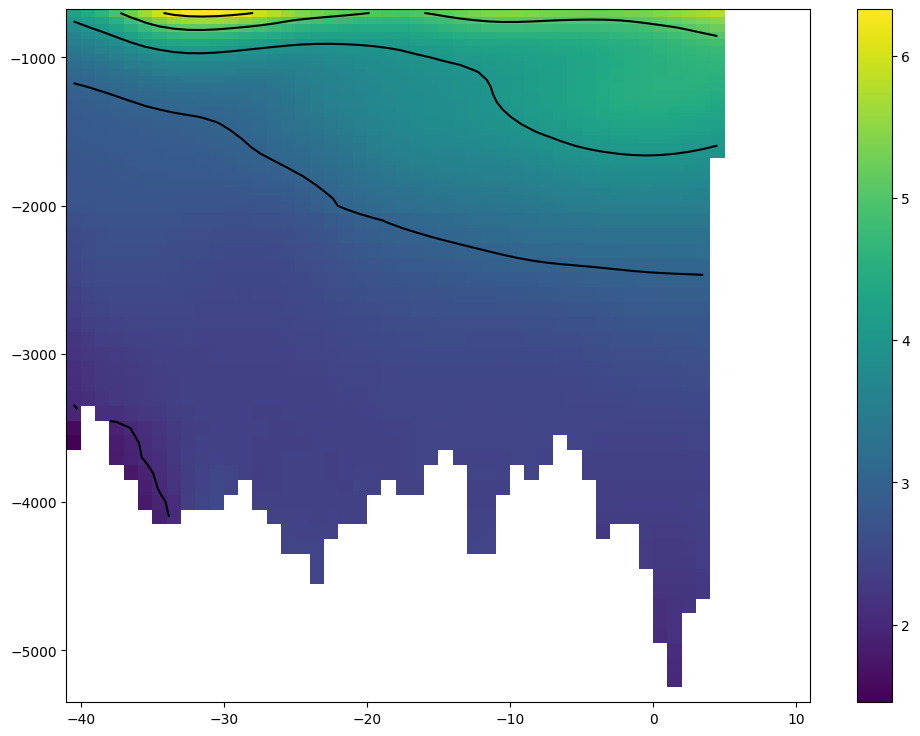

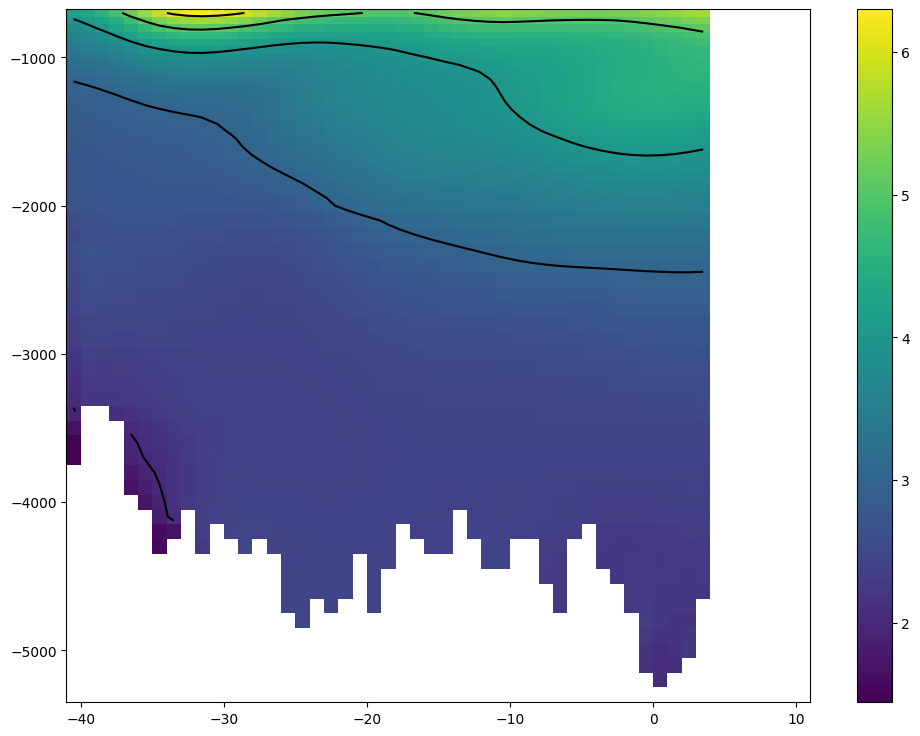

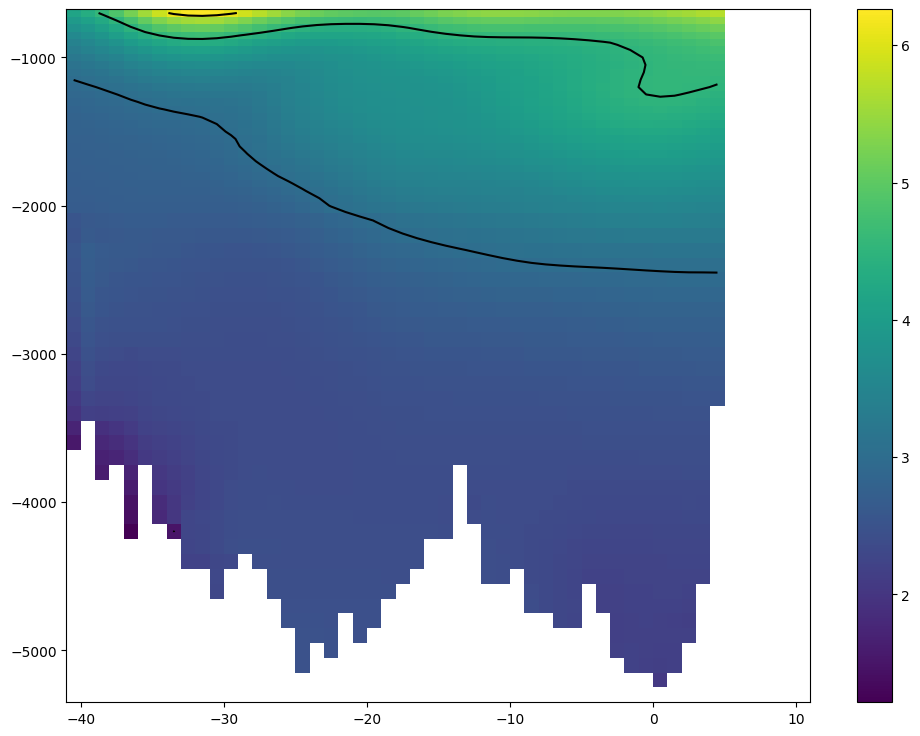

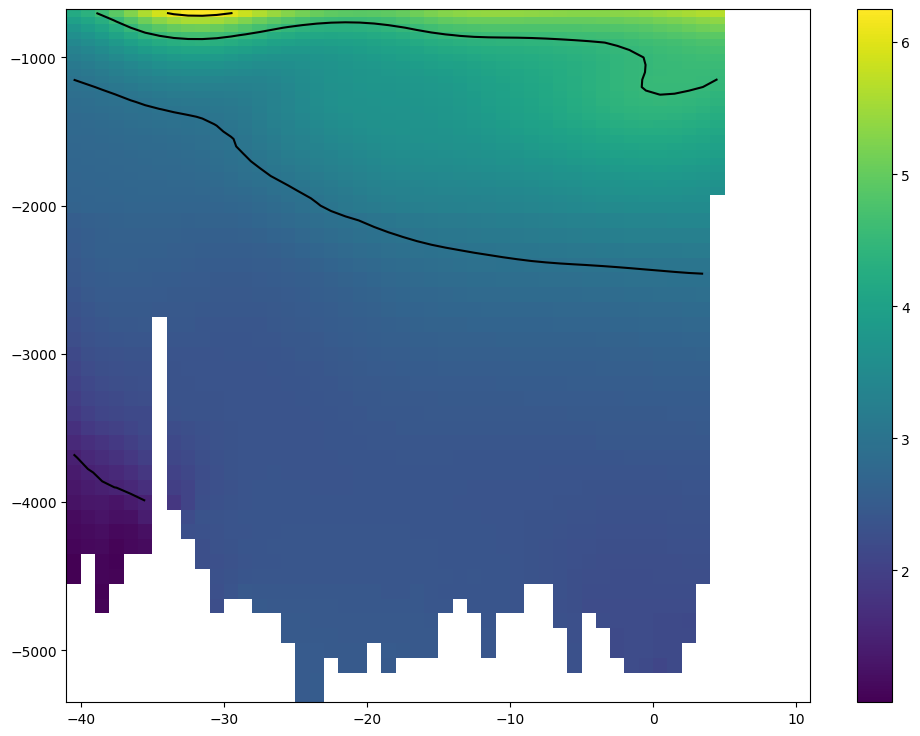

In [21]:
for i in np.linspace(159,176,10):
  lat = nc.variables['lat'][49:101]
  lon = nc.variables['lon'][i]
  depth = nc.variables['depth'][40:100]
  temp = nc.variables['t_an'][0,40:100,49:101,i]
  depth=depth*-1
  latv,depthv= np.meshgrid(lat,depth,indexing='xy')
  fig = plt.figure(figsize=(12,9))
  cont = plt.contour(latv,depthv,temp,4,colors='k',origin='lower') 
  plt.pcolormesh(latv,depthv,temp)
  plt.colorbar()
  plt.show()


# **Temperature Gradient**

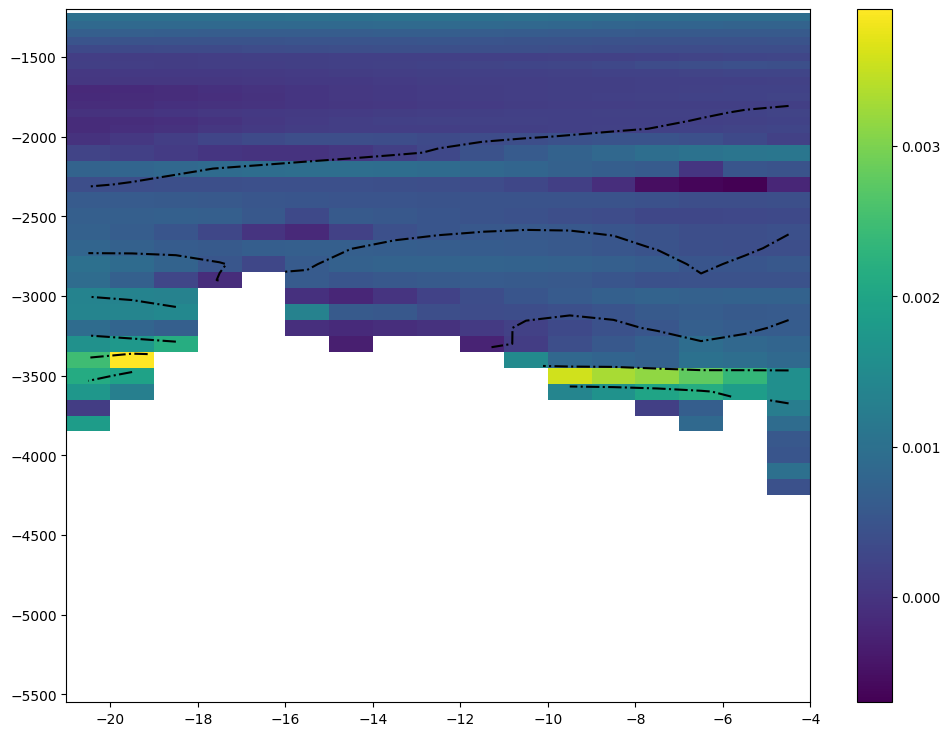

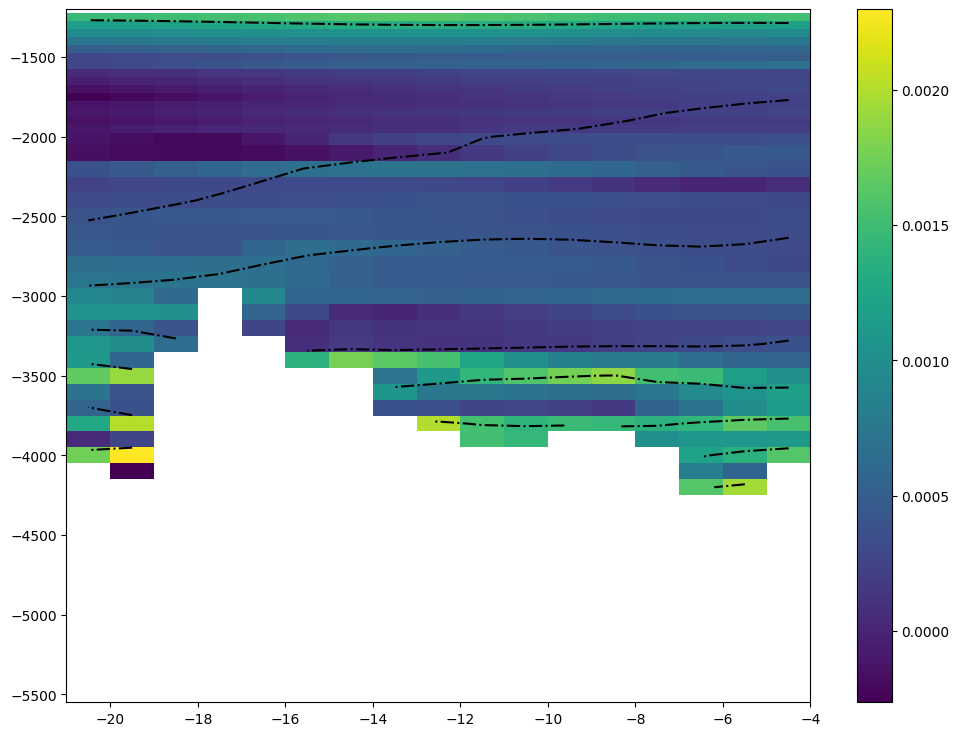

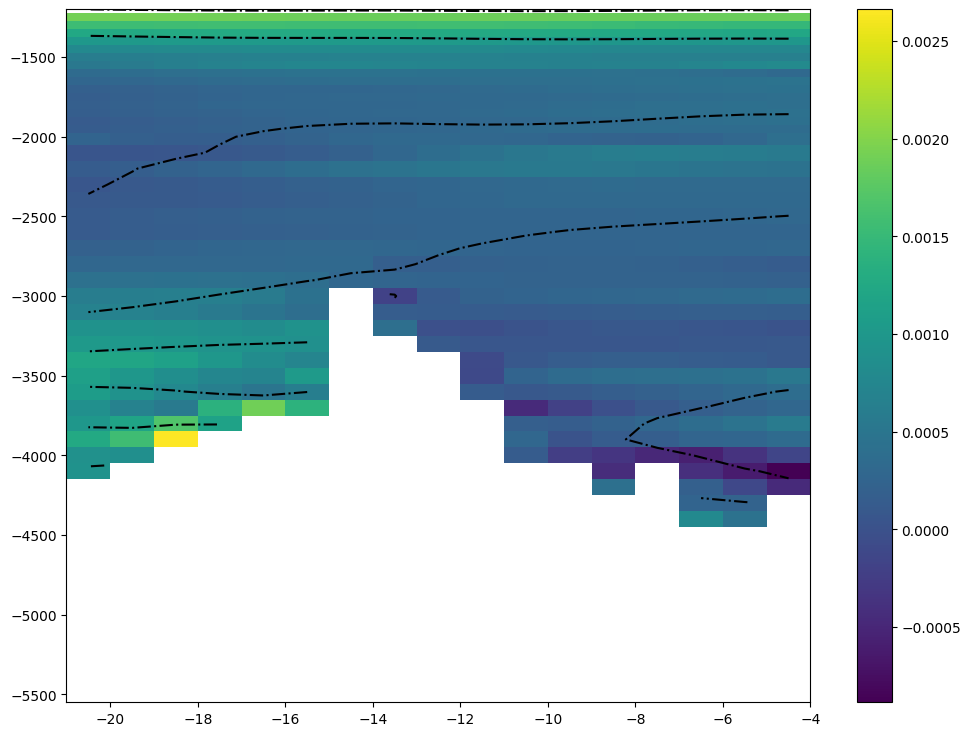

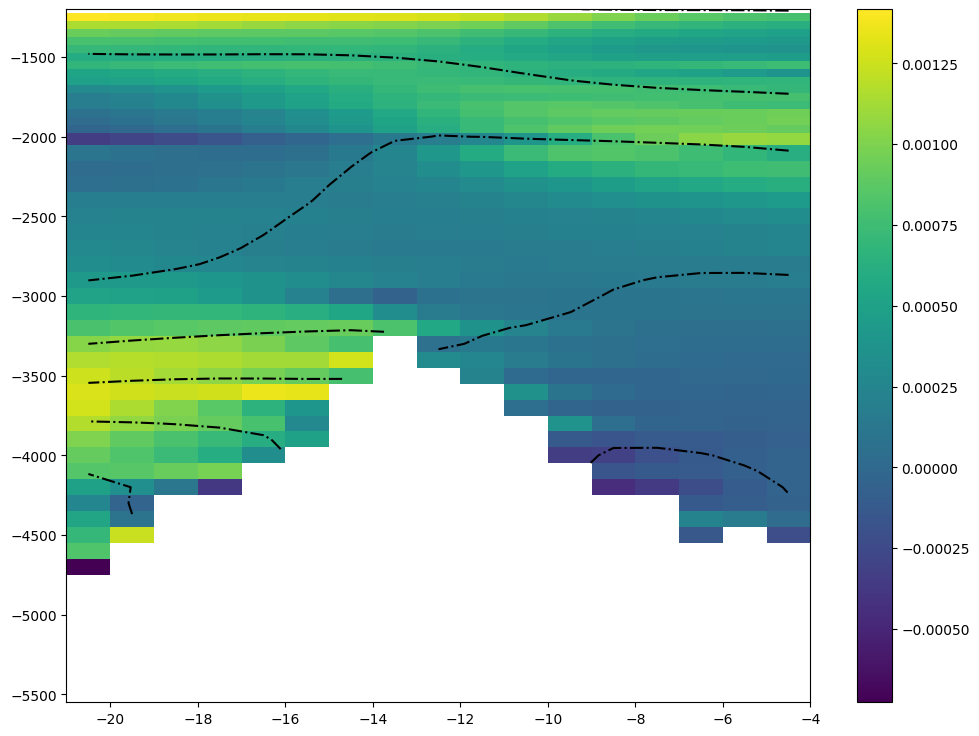

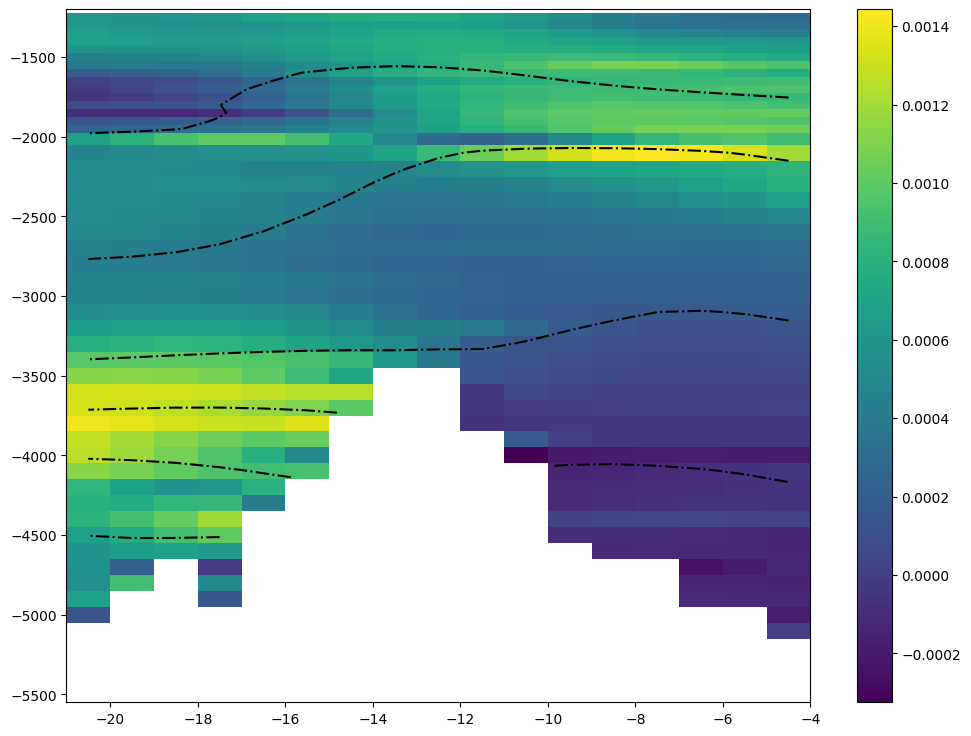

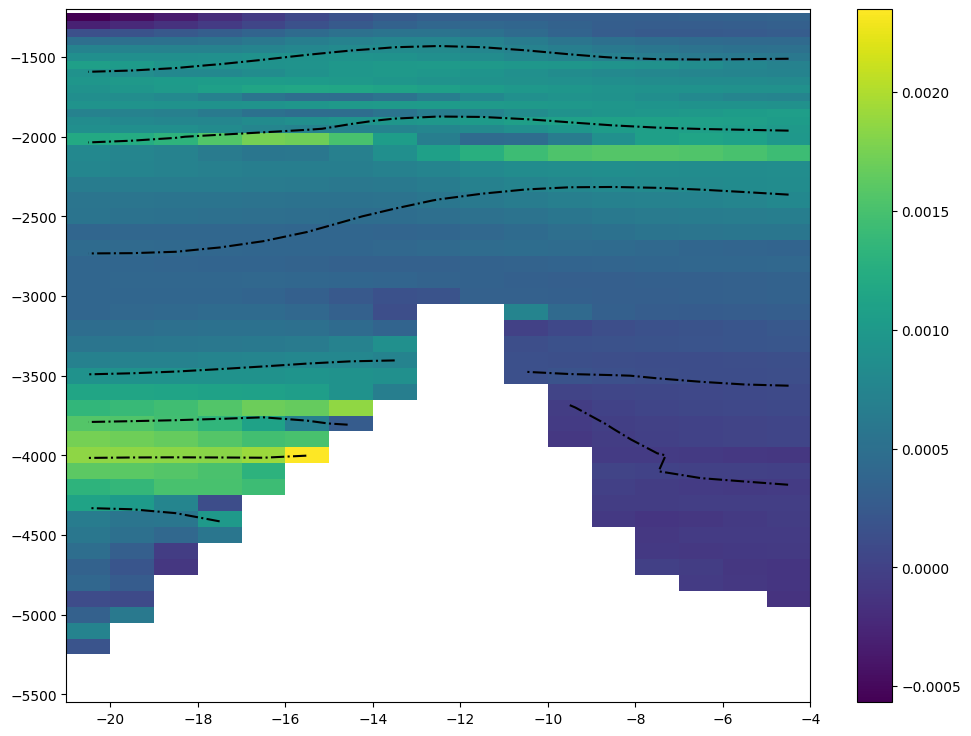

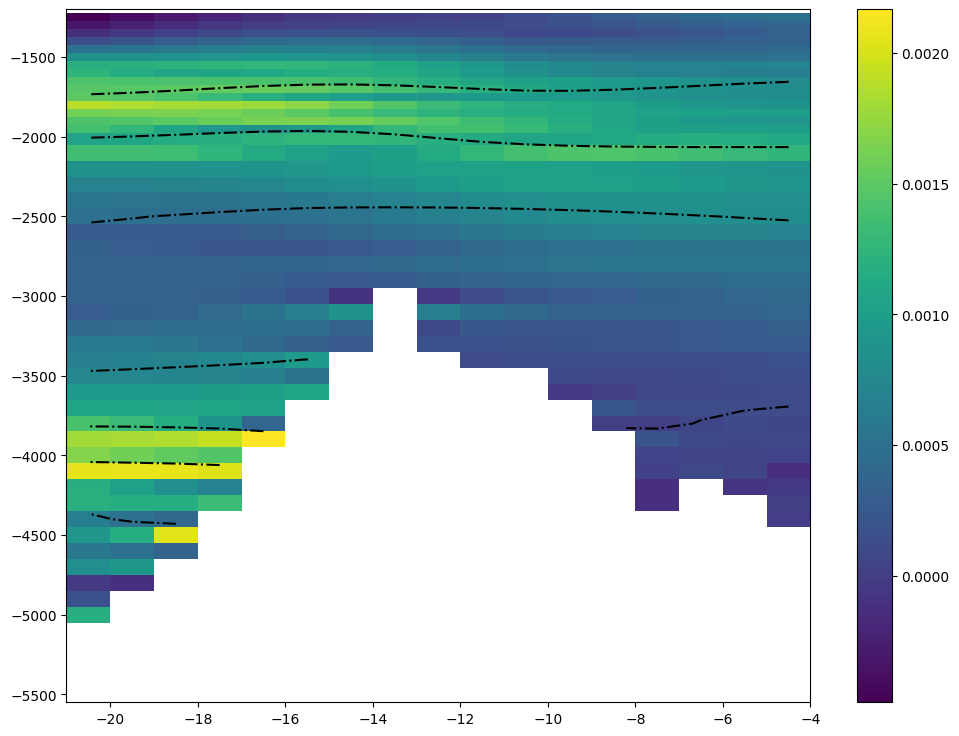

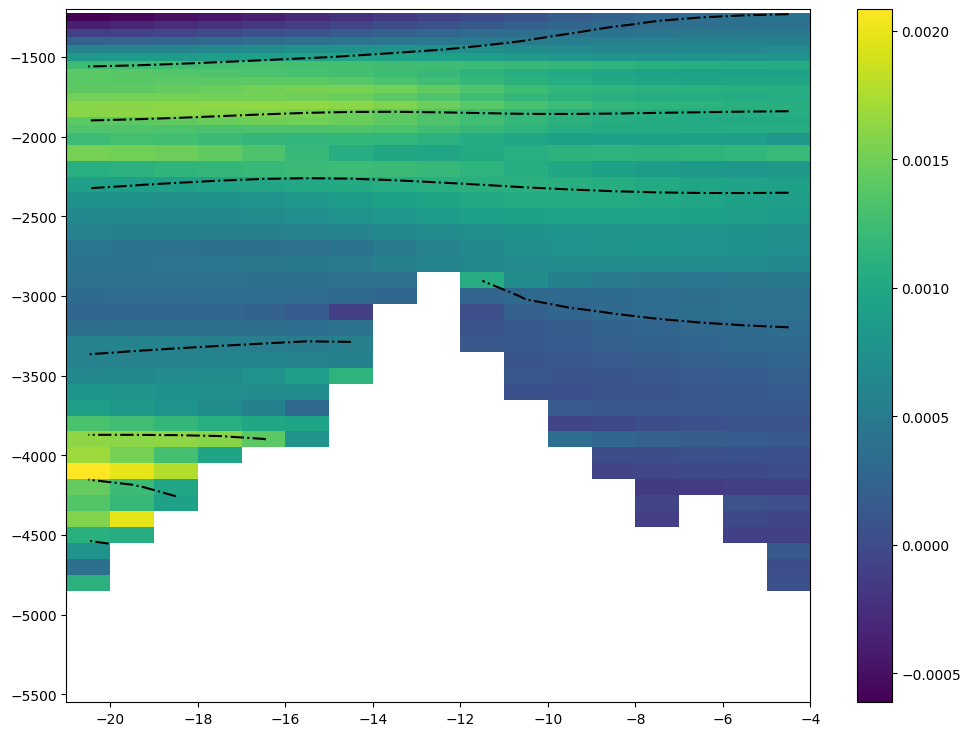

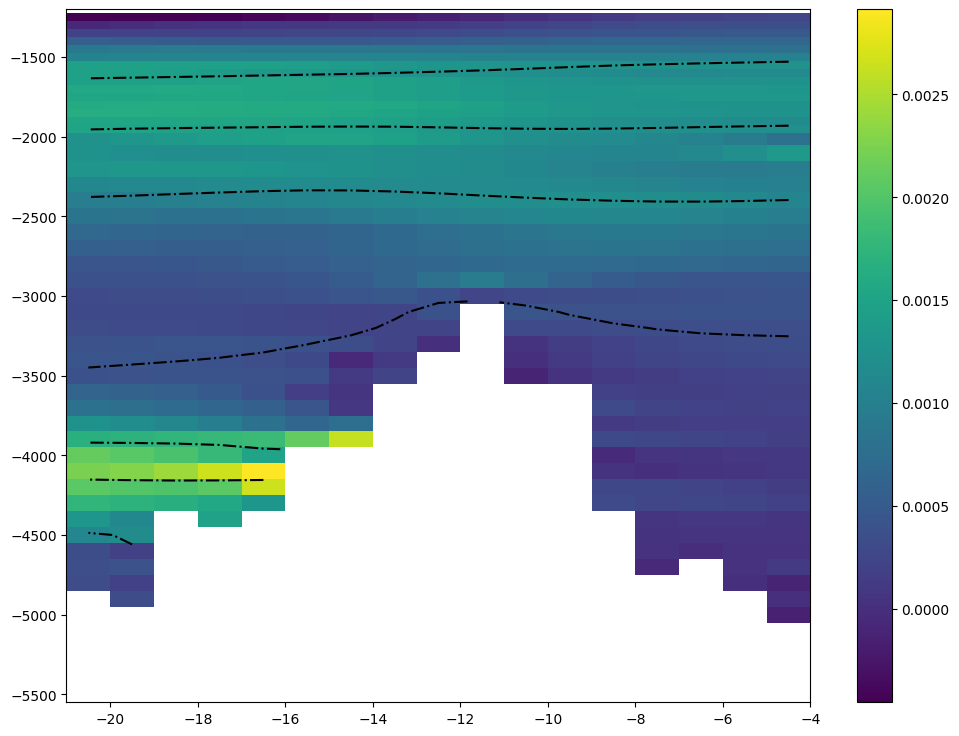

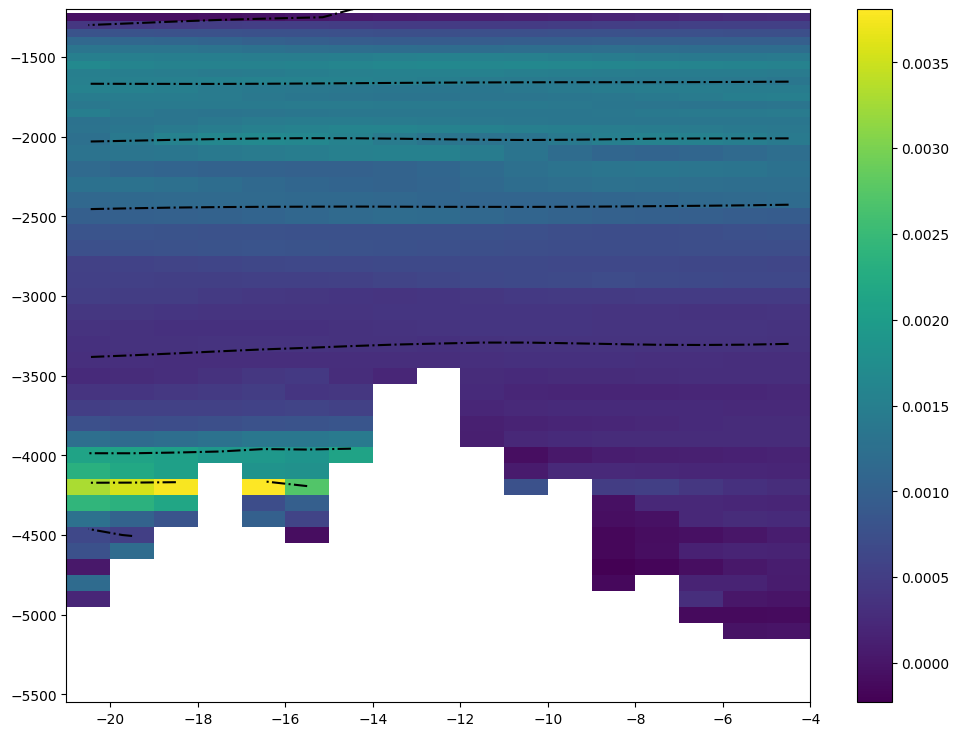

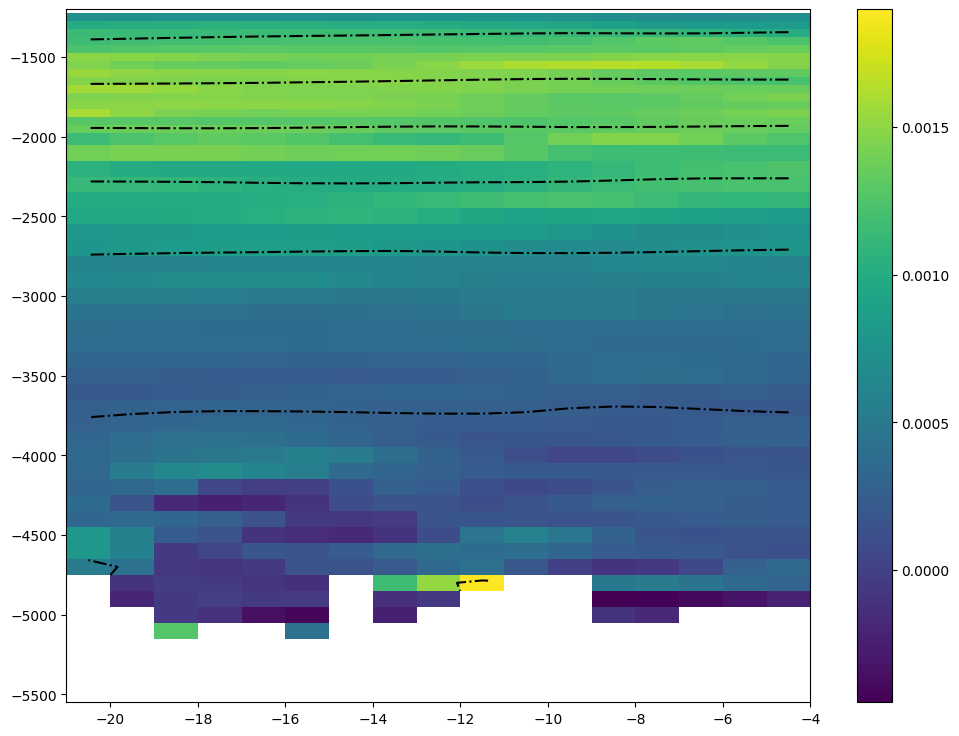

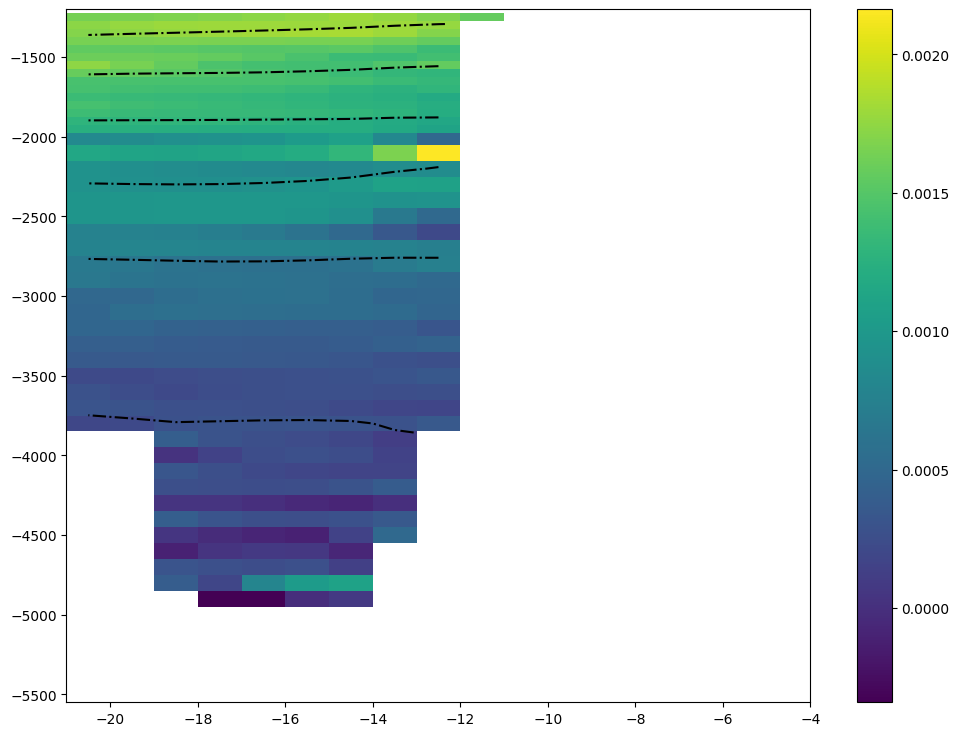

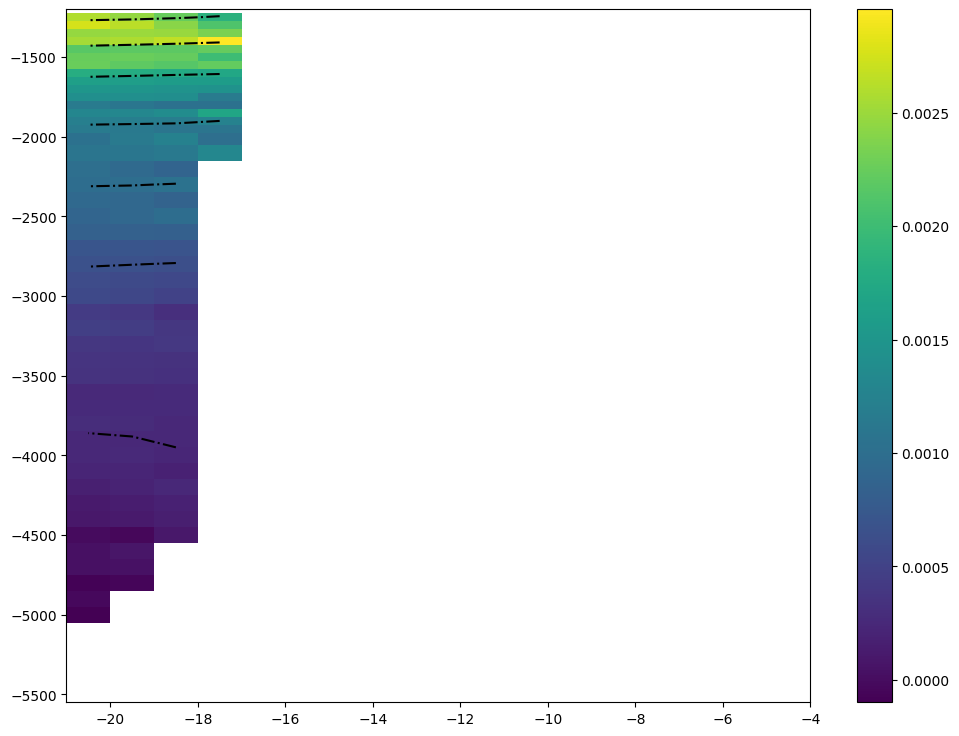

In [56]:
for i in np.linspace(49,101,13): #right version!!!

  lat1 = nc.variables['lat'][i]
  lon1 = nc.variables['lon'][159:176]
  depth1 = nc.variables['depth'][50:140]
  temp1 = nc.variables['t_an'][0,50:140,i,159:176]
  depth1=depth1*-1
  lonv1,depthv1= np.meshgrid(lon1,depth1,indexing='xy')
  lat = nc.variables['lat'][i]
  lon = nc.variables['lon'][159:176]
  depth = nc.variables['depth'][51:140]
  depth=depth*-1
  temp = nc.variables['t_an'][0,50:140,i,159:176]
  tempdiff= temp[1:]-temp[0:-1]
  lonv,depthv= np.meshgrid(lon,depth,indexing='xy')
  depthg = nc.variables['depth'][50:140]
  depthg=depthg*-1
  depthdiff = depthg[1:]-depthg[0:-1]
  lonv2,depthdiffv= np.meshgrid(lon,depthdiff,indexing='xy')
  tempgradient = tempdiff / depthdiffv
  fig = plt.figure(figsize=(12,9))
  cont = plt.contour(lonv1,depthv1,temp1,linestyles='dashdot',colors='black')#,origin='lower')
  plt.pcolormesh(lonv,depthv,tempgradient,alpha=1)
  #cont = plt.contourf(lonv,depthv,tempgradient,alpha=1)#,linestyles='dashdot')#,colors='black',origin='lower') 
  #cont = plt.contour(lonv,depthv,tempgradient,colors='black',linestyles='dashdot')#,colors='black',origin='lower') 
  plt.colorbar()
  plt.show()

**temperature gradient latitude cutoff**

In [22]:
temp = nc.variables['t_an'][0,:,:,:]

In [23]:
temp.shape

(102, 180, 360)

In [24]:
  tempgradient= temp[:] 
  tempgradient.shape

(102, 180, 360)

In [25]:
tt= temp[0:-1,:,:]
tt.shape

(101, 180, 360)

In [26]:
nc.variables['lon'][159]

masked_array(data=-20.5,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

longitude cut-off

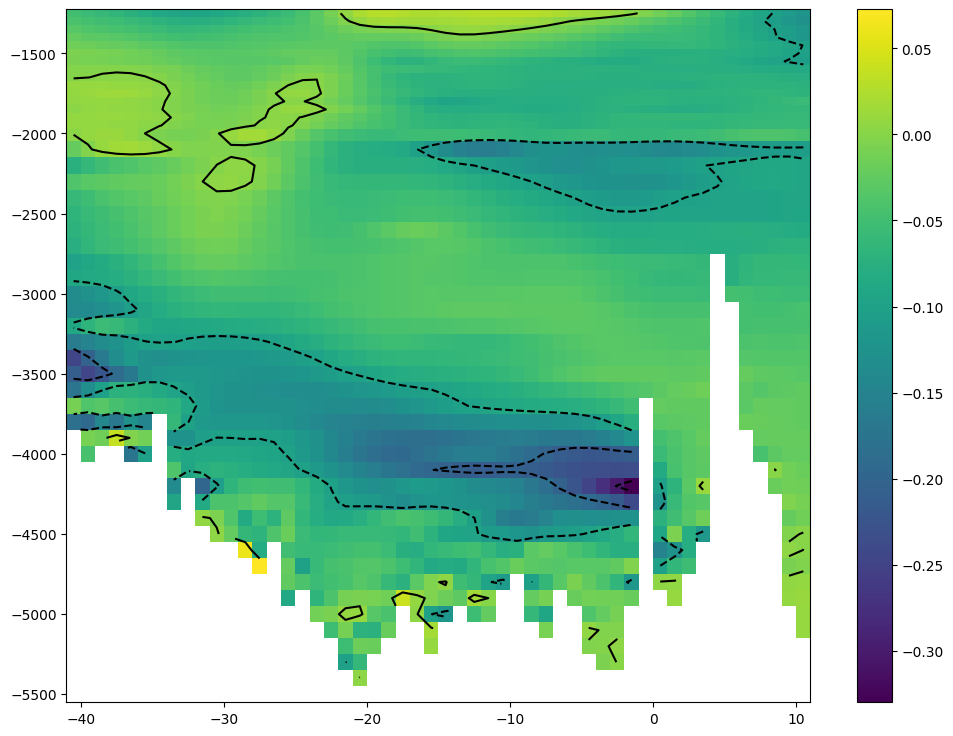

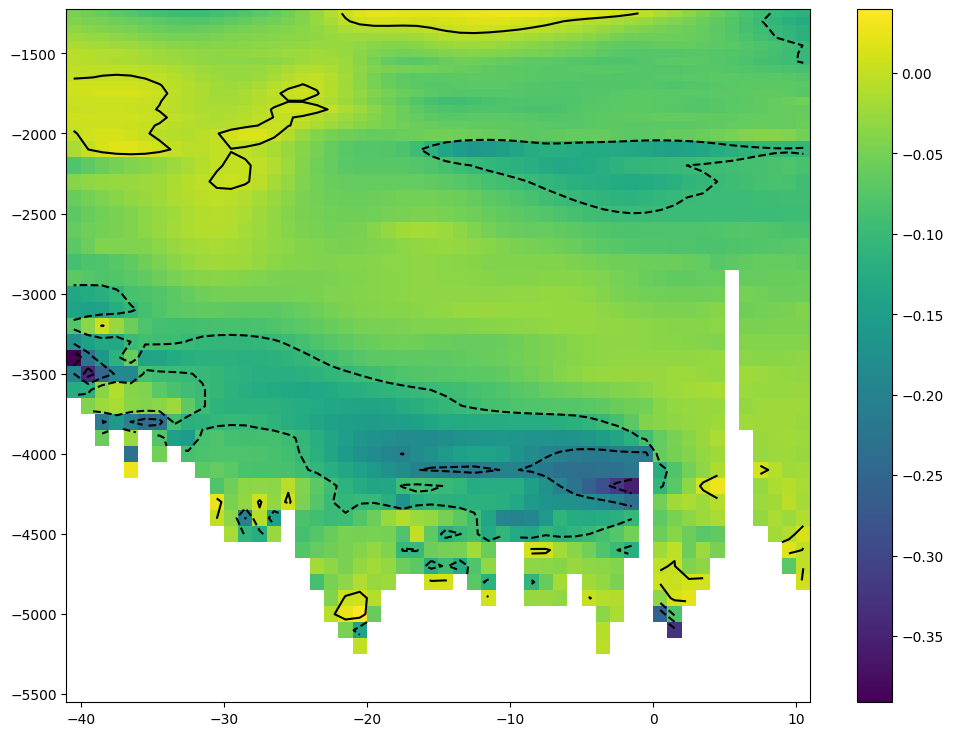

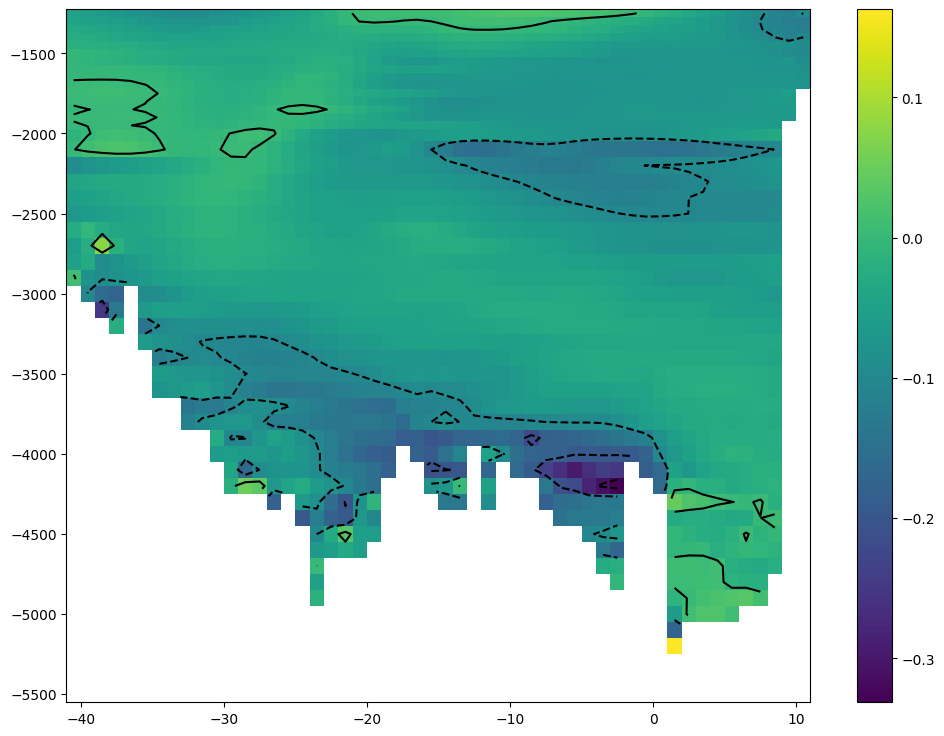

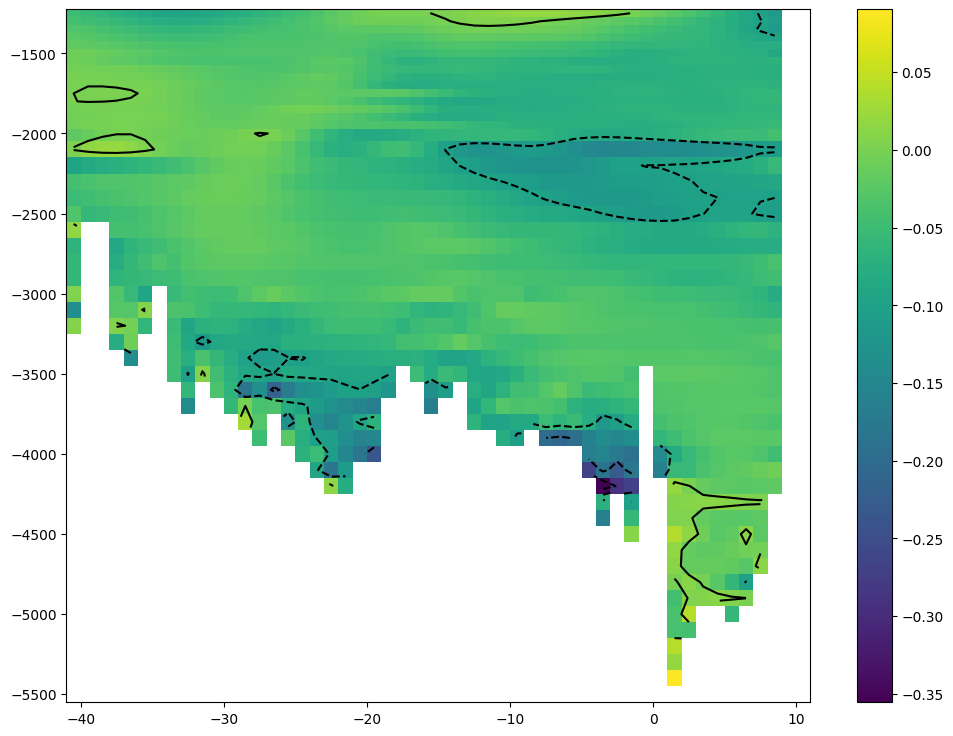

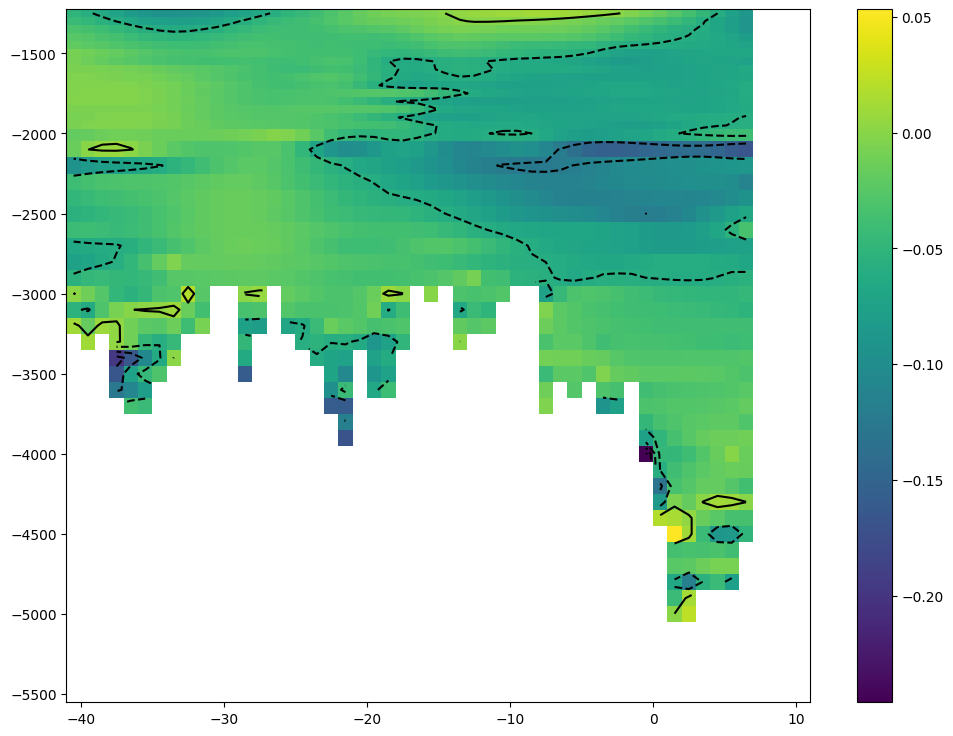

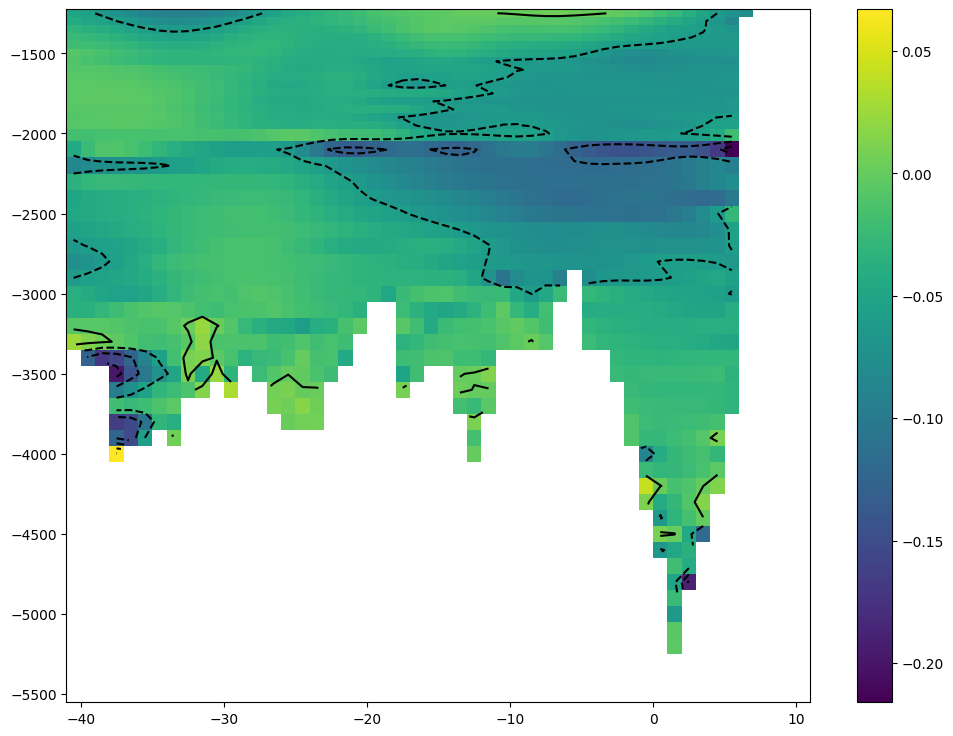

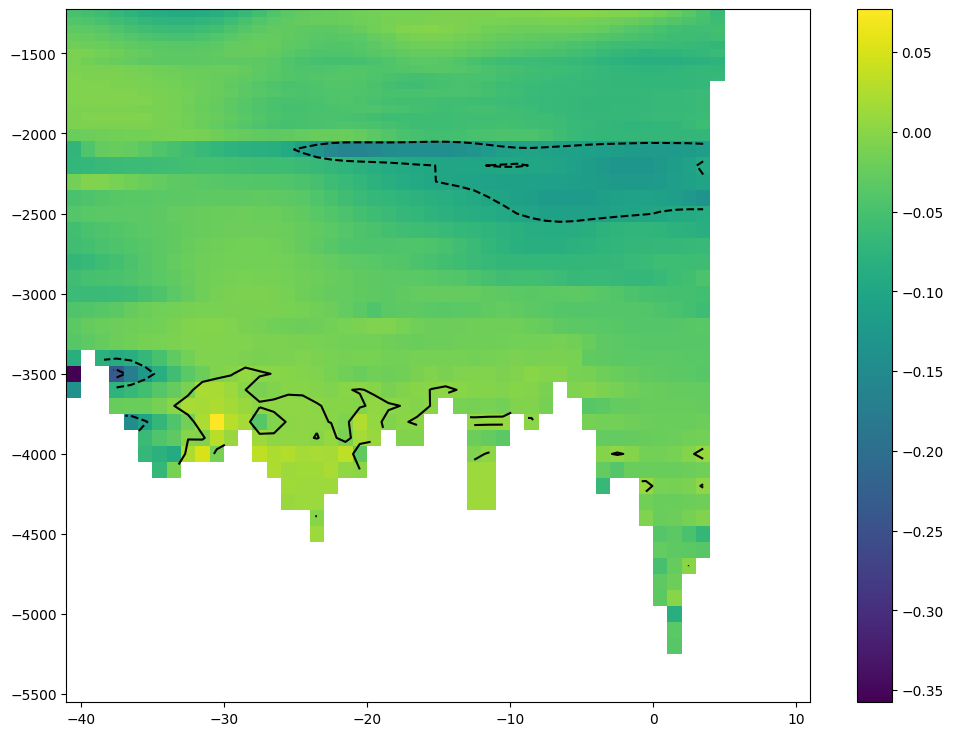

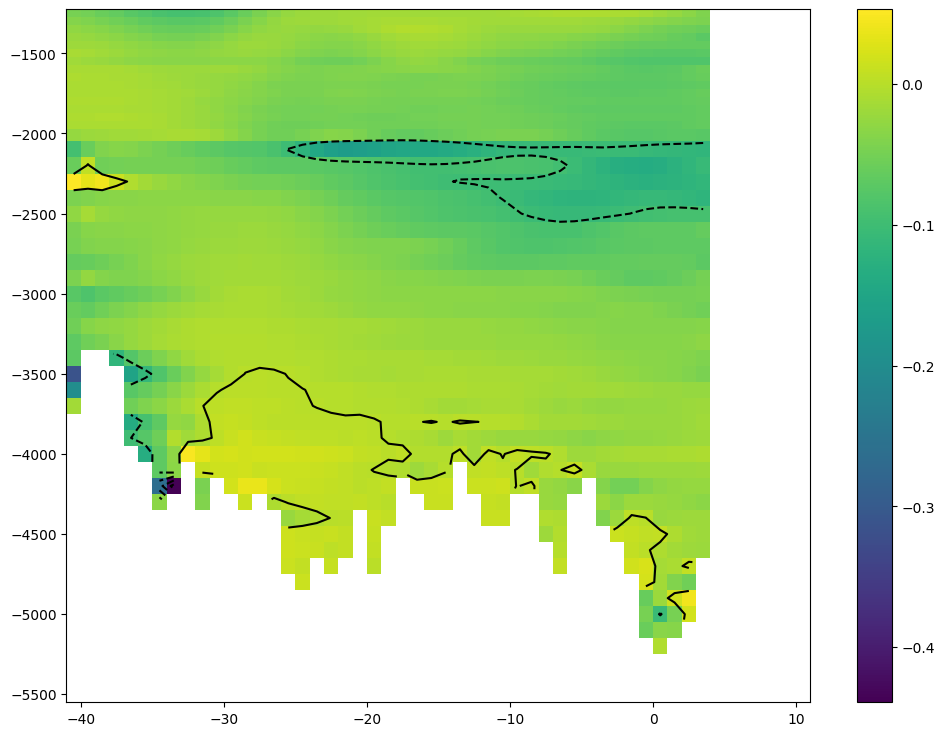

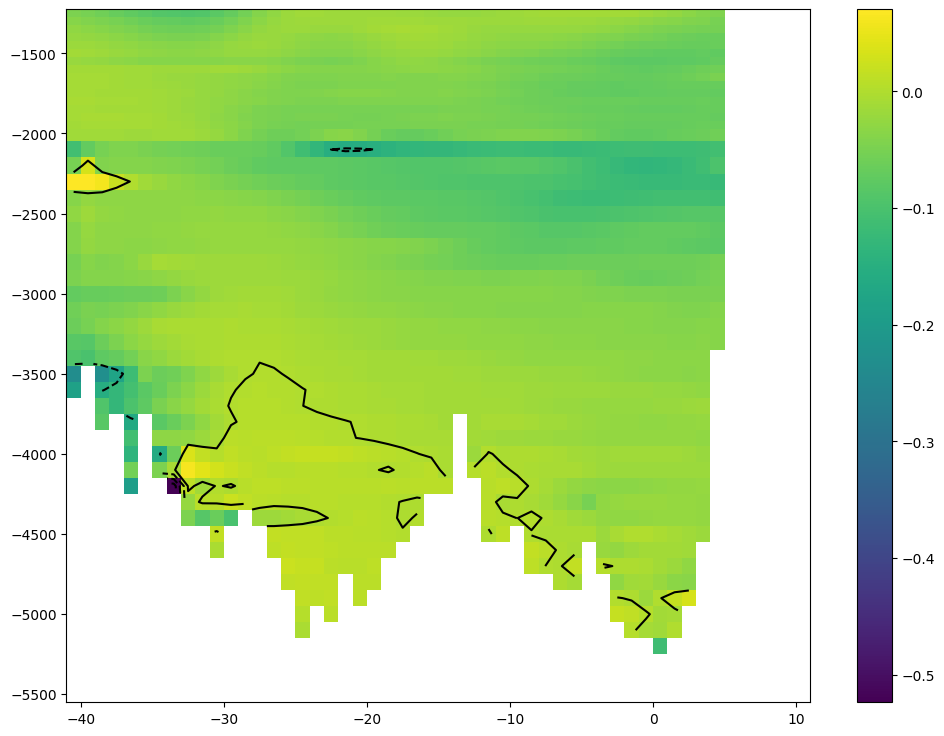

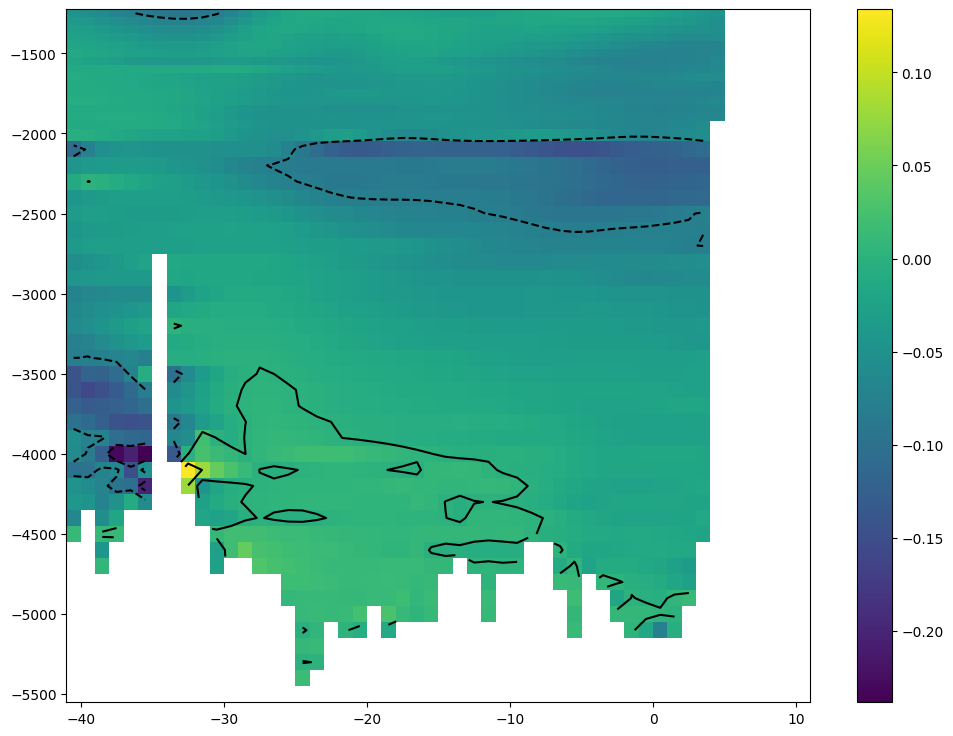

In [27]:
for i in np.linspace(159,176,10):
  lat = nc.variables['lat'][49:101]
  lon = nc.variables['lon'][i]
  depth = nc.variables['depth'][51:140]
  depth=depth*-1
  temp = nc.variables['t_an'][0,50:140,49:101,i]
  tempgradient= temp[1:,:]-temp[0:-1,:]
  latv,depthv= np.meshgrid(lat,depth,indexing='xy')
  fig = plt.figure(figsize=(12,9))
  cont = plt.contour(latv,depthv,tempgradient,4,colors='k',origin='lower')
  plt.pcolormesh(latv,depthv,tempgradient,cmap='viridis') 
  plt.colorbar()
  plt.show()

latitudes cutoff

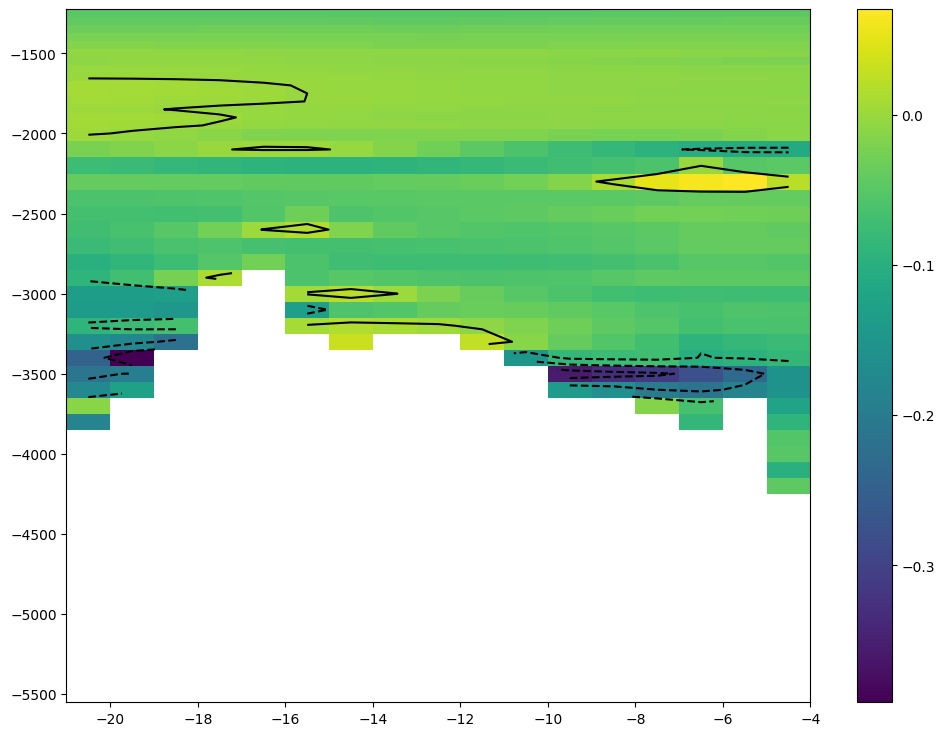

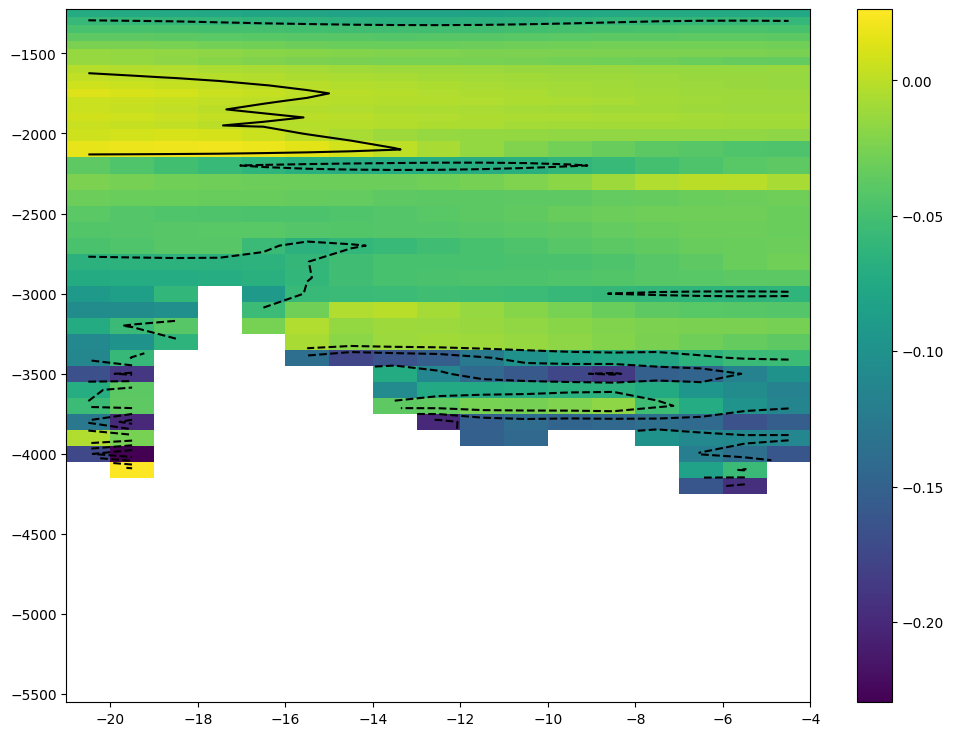

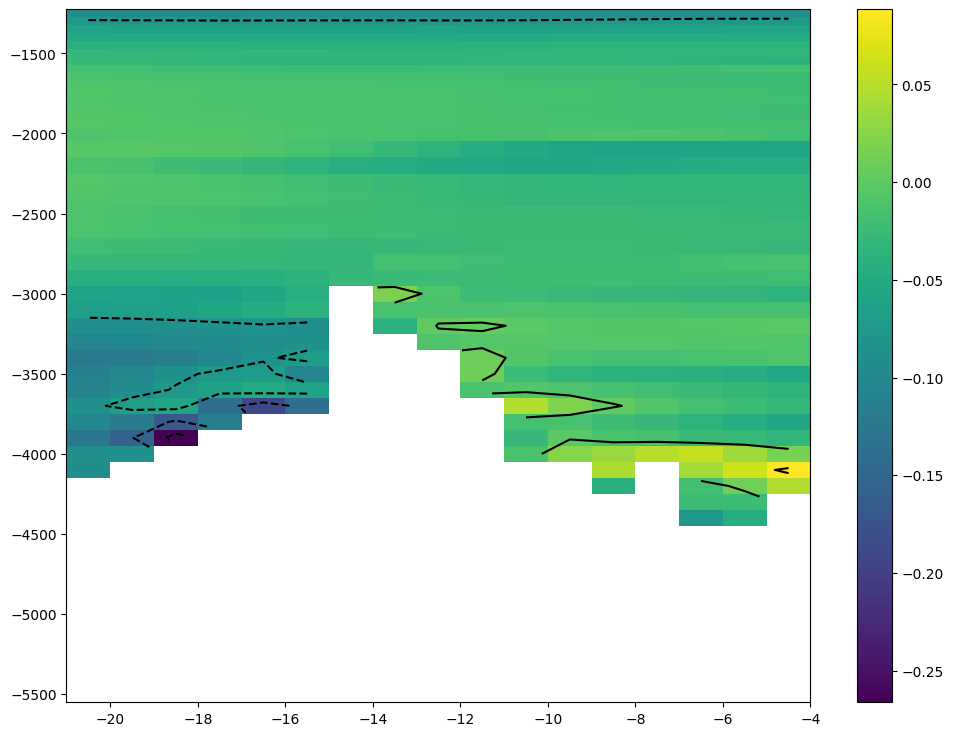

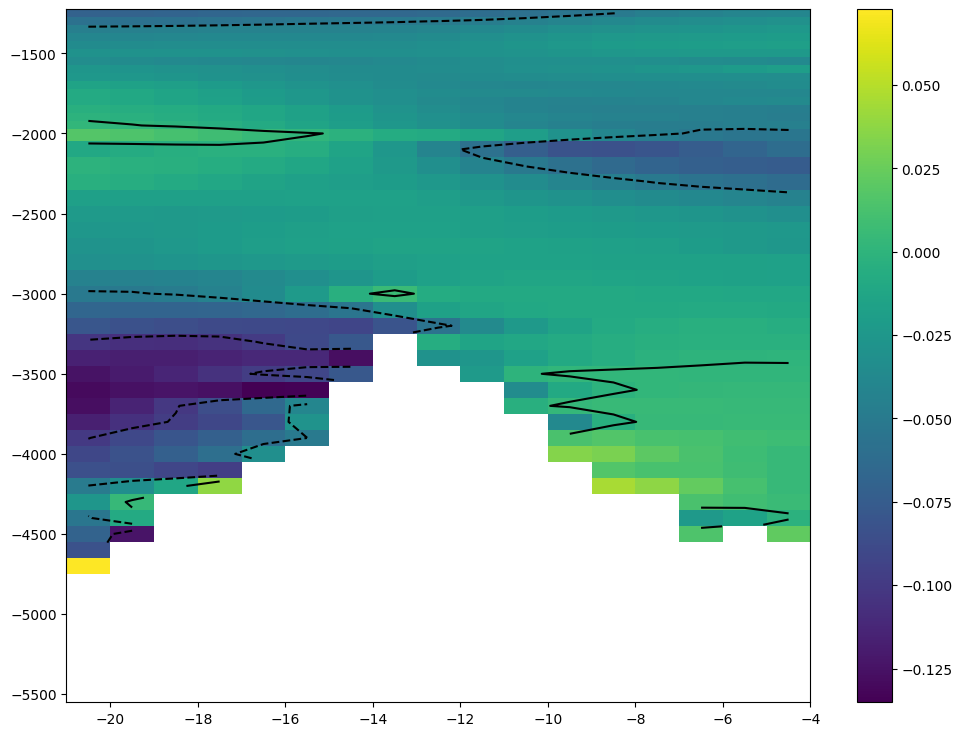

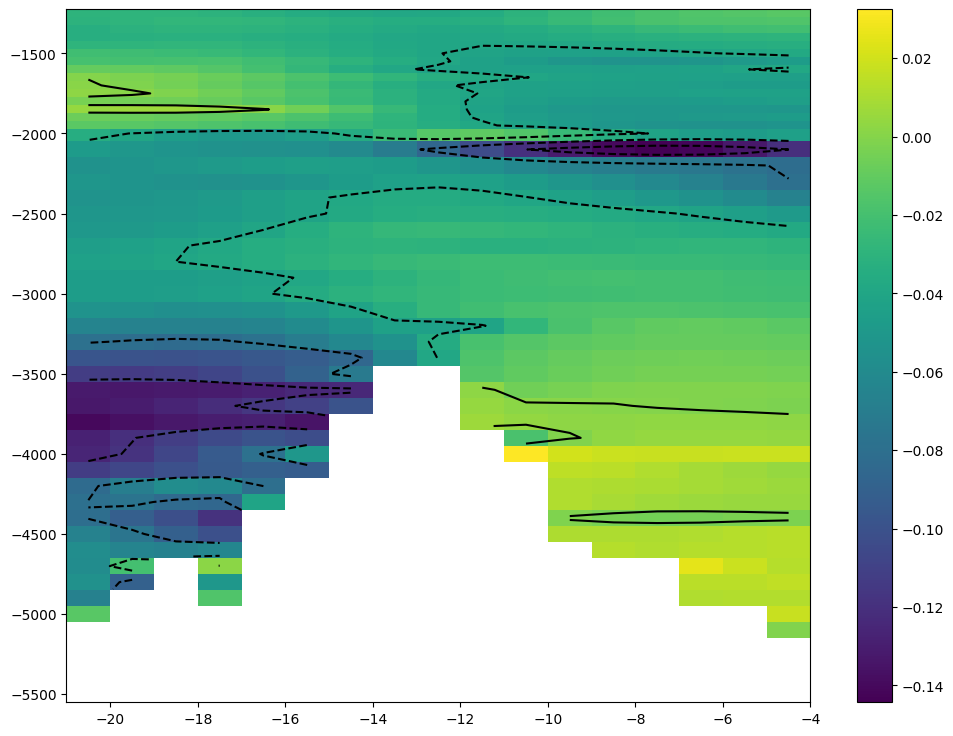

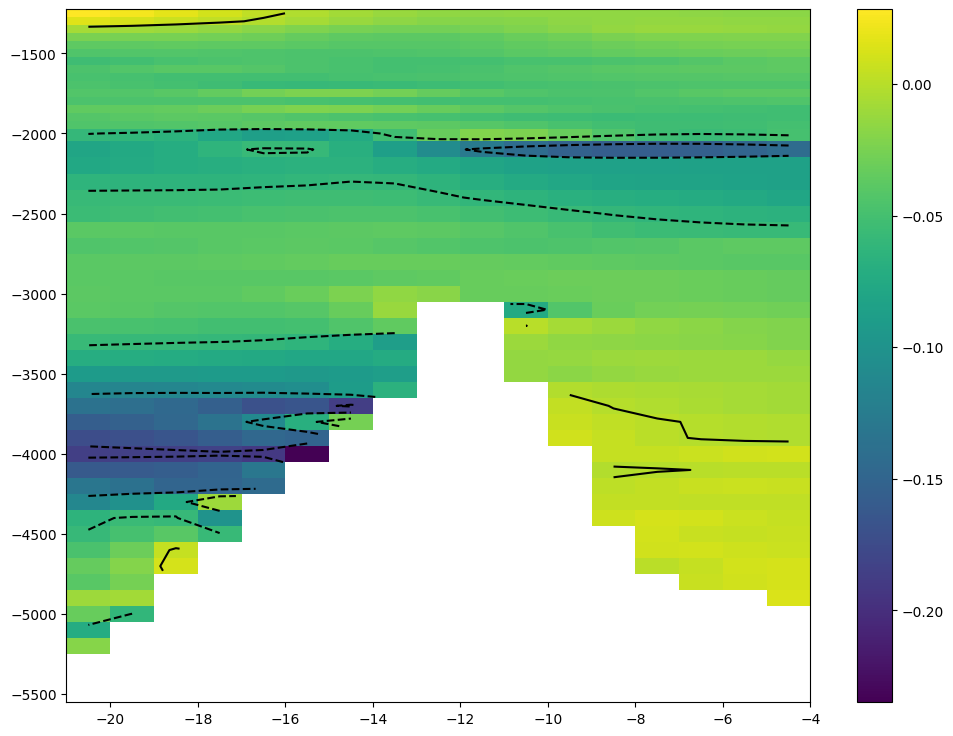

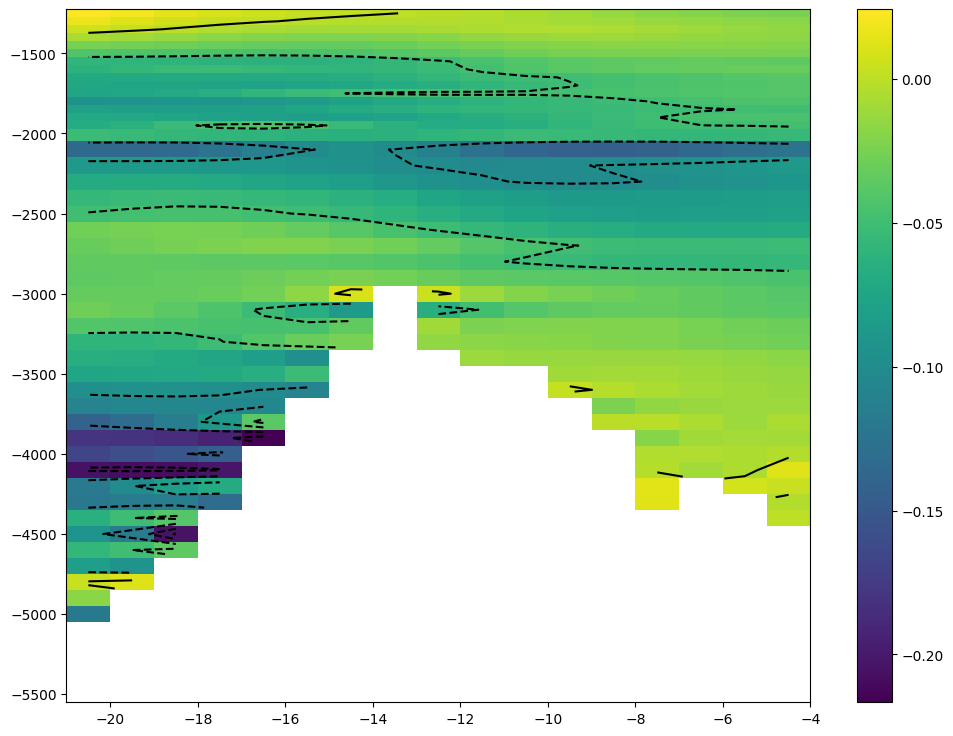

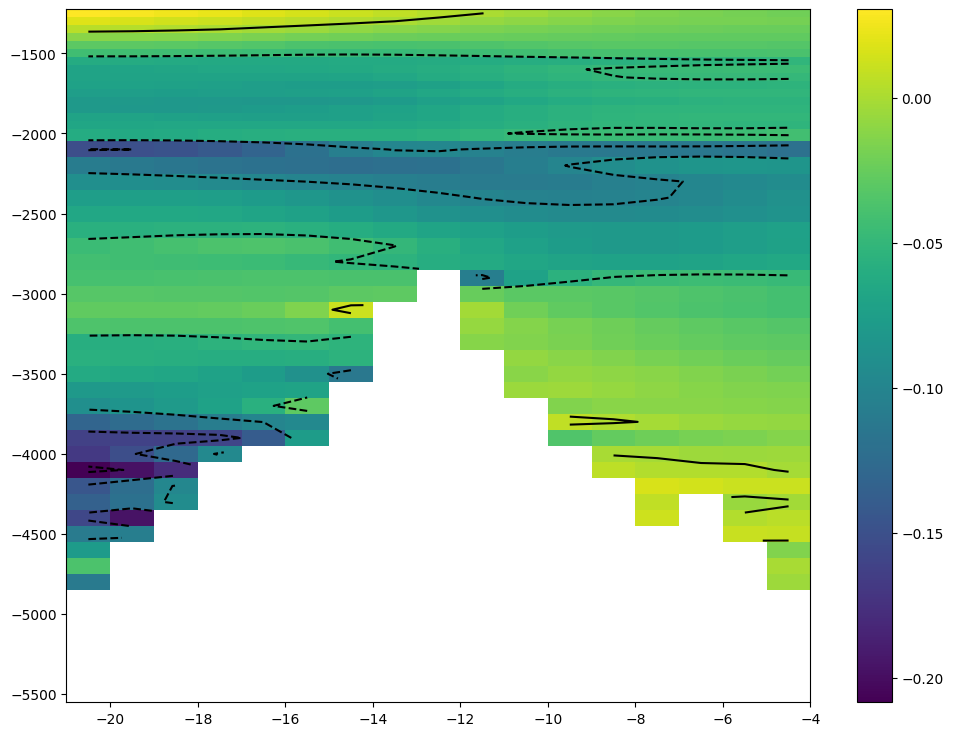

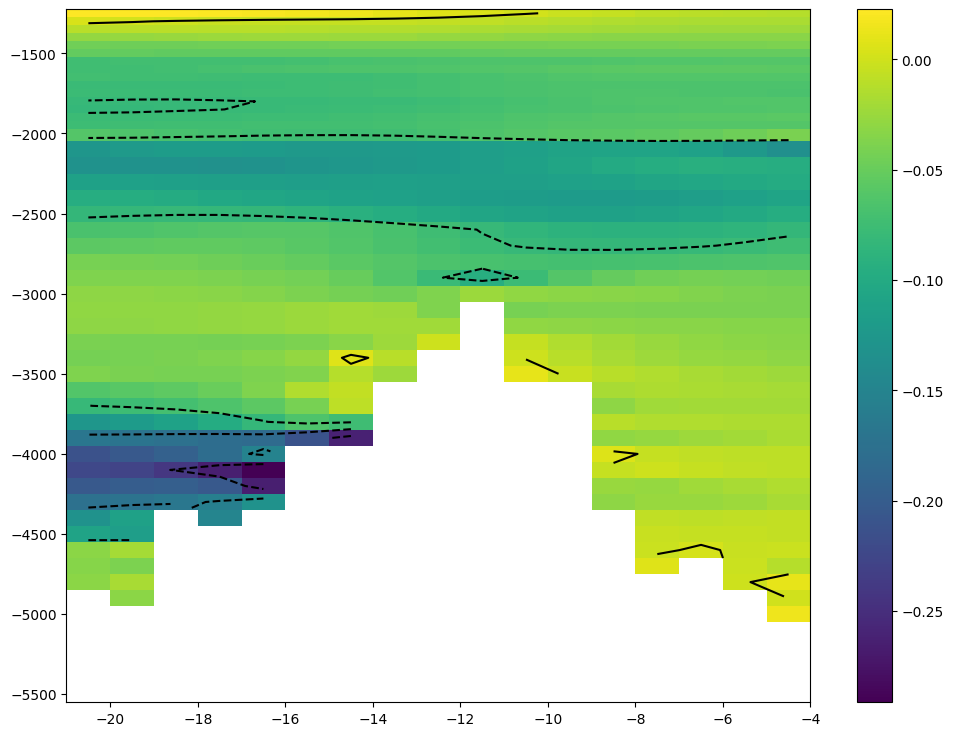

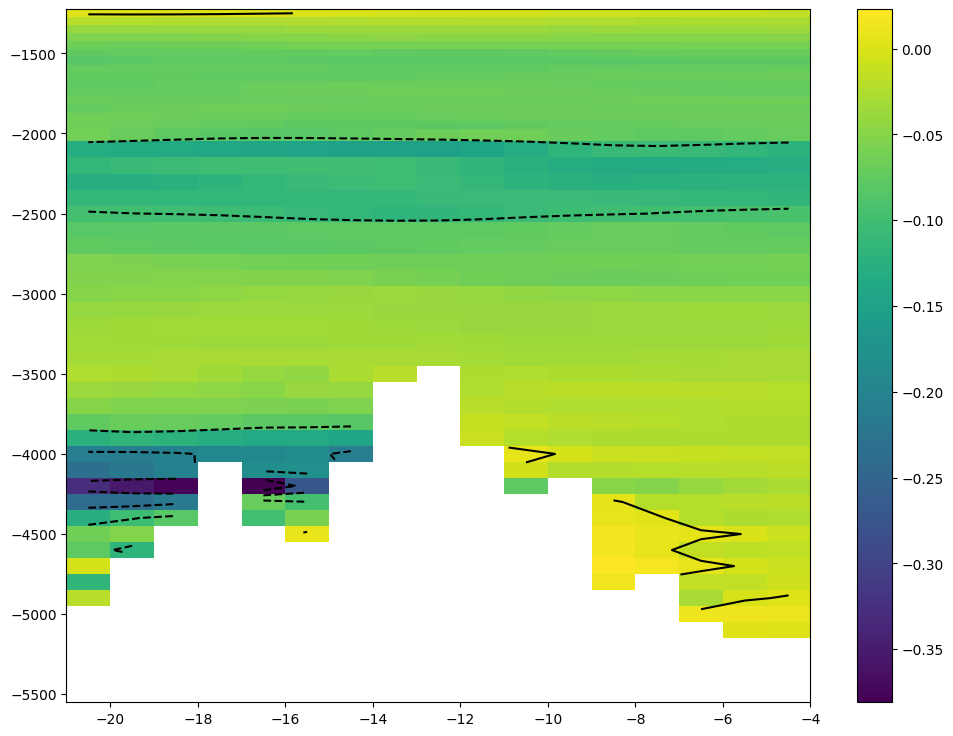

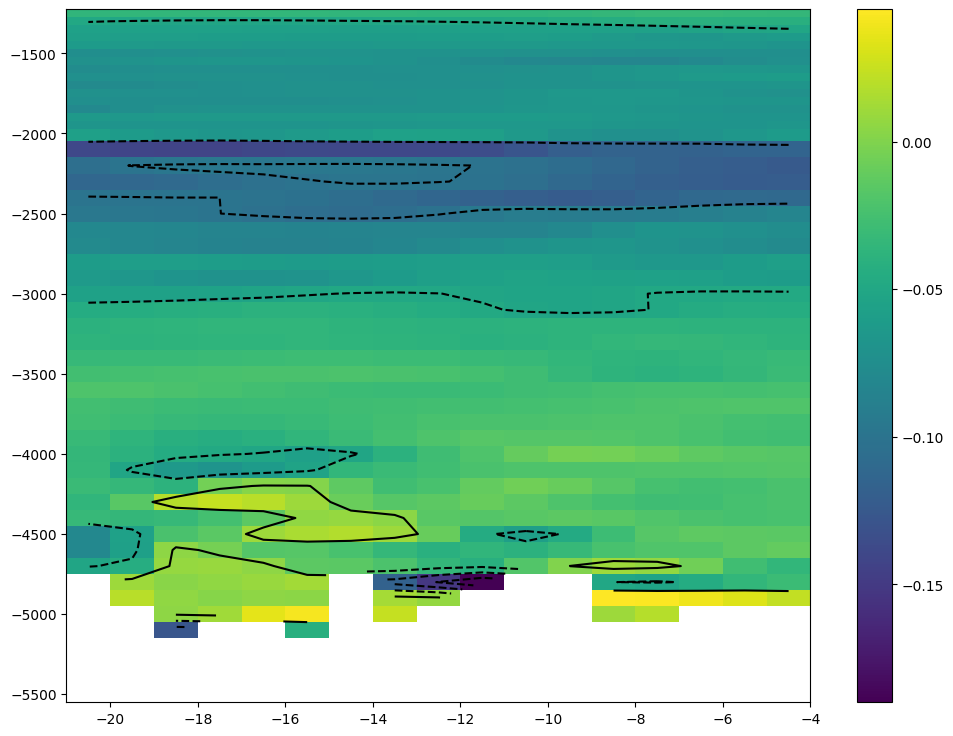

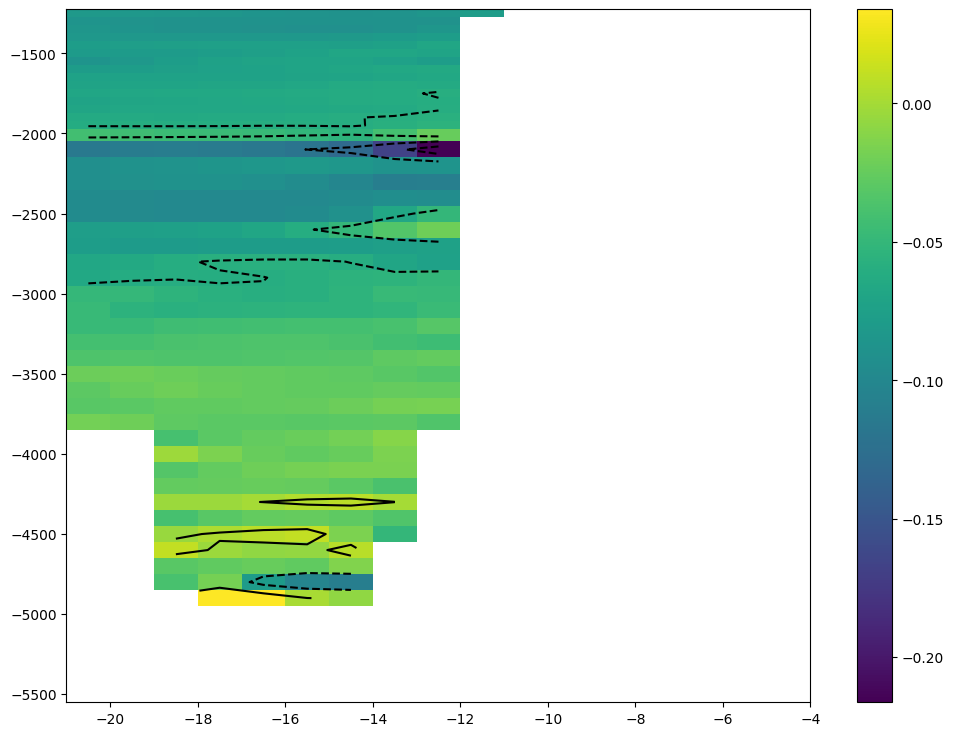

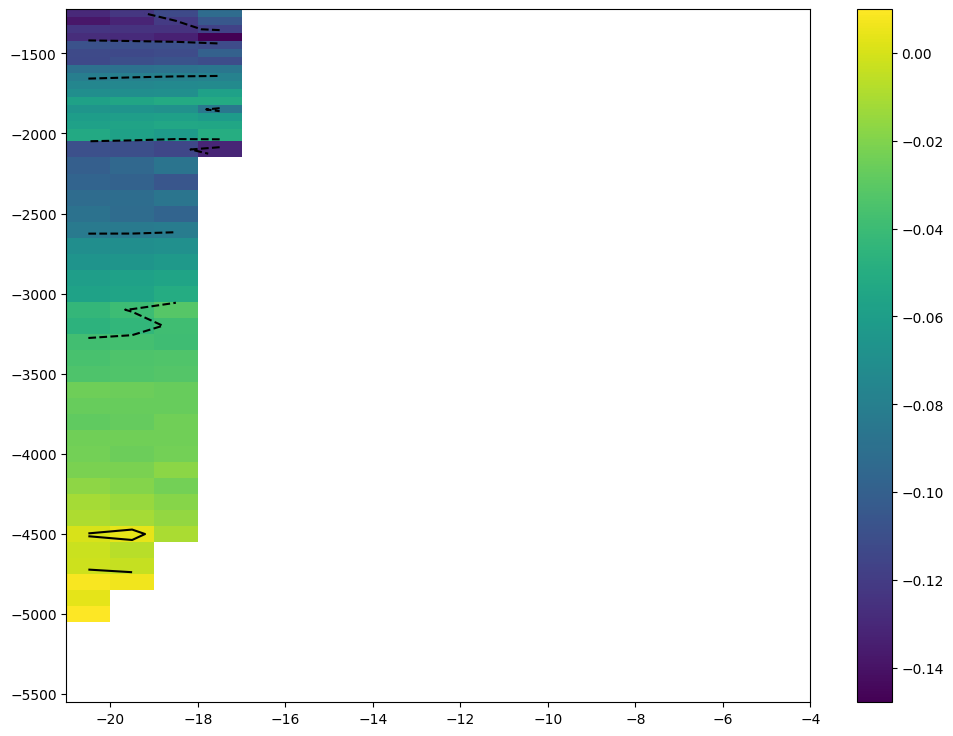

In [28]:
for i in np.linspace(49,101,13):
  lat = nc.variables['lat'][i]
  lon = nc.variables['lon'][159:176]
  depth = nc.variables['depth'][51:140]
  depth=depth*-1
  temp = nc.variables['t_an'][0,50:140,i,159:176]
  tempgradient= temp[1:]-temp[0:-1]
  lonv,depthv= np.meshgrid(lon,depth,indexing='xy')
  fig = plt.figure(figsize=(12,9))
  cont = plt.contour(lonv,depthv,tempgradient,4,colors='k',origin='lower')
  plt.pcolormesh(lonv,depthv,tempgradient) 
  plt.colorbar()
  plt.show()

# **practice** **playground**

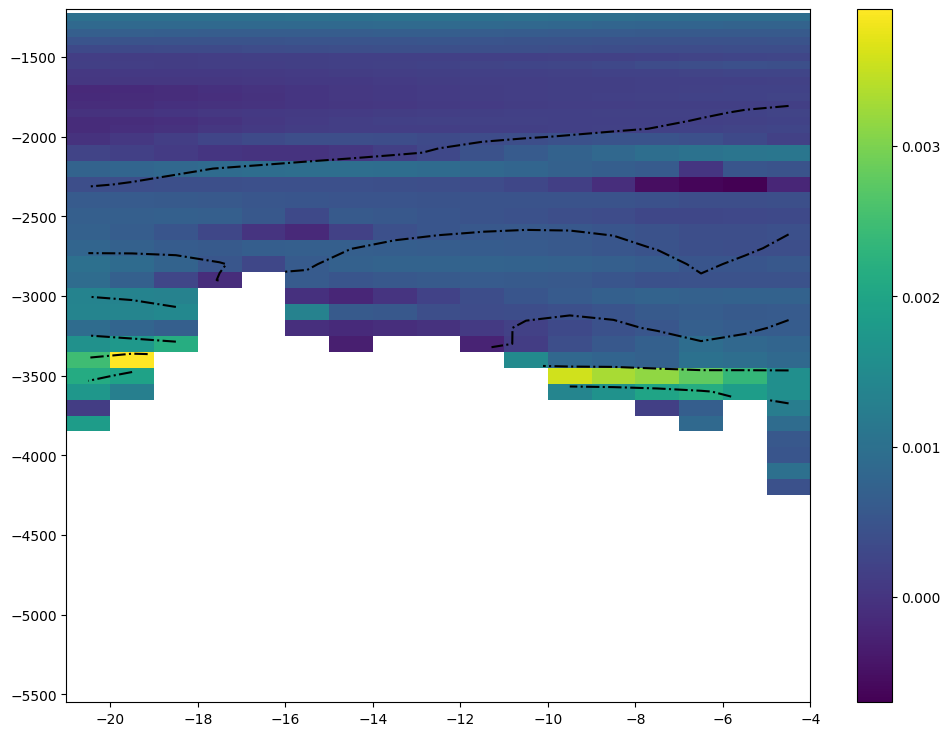

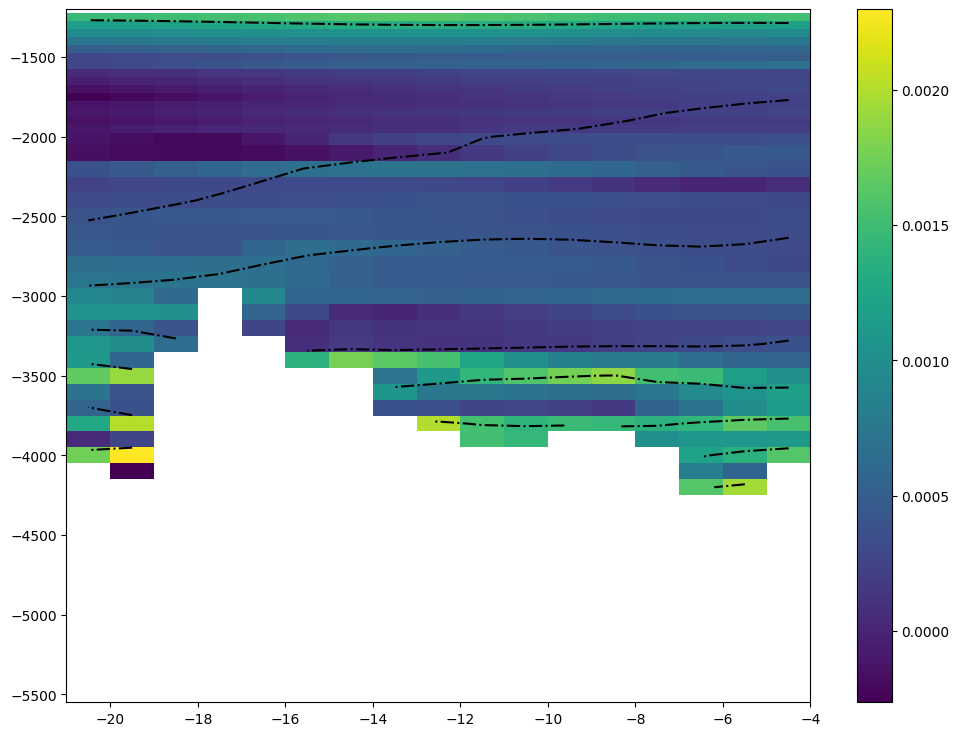

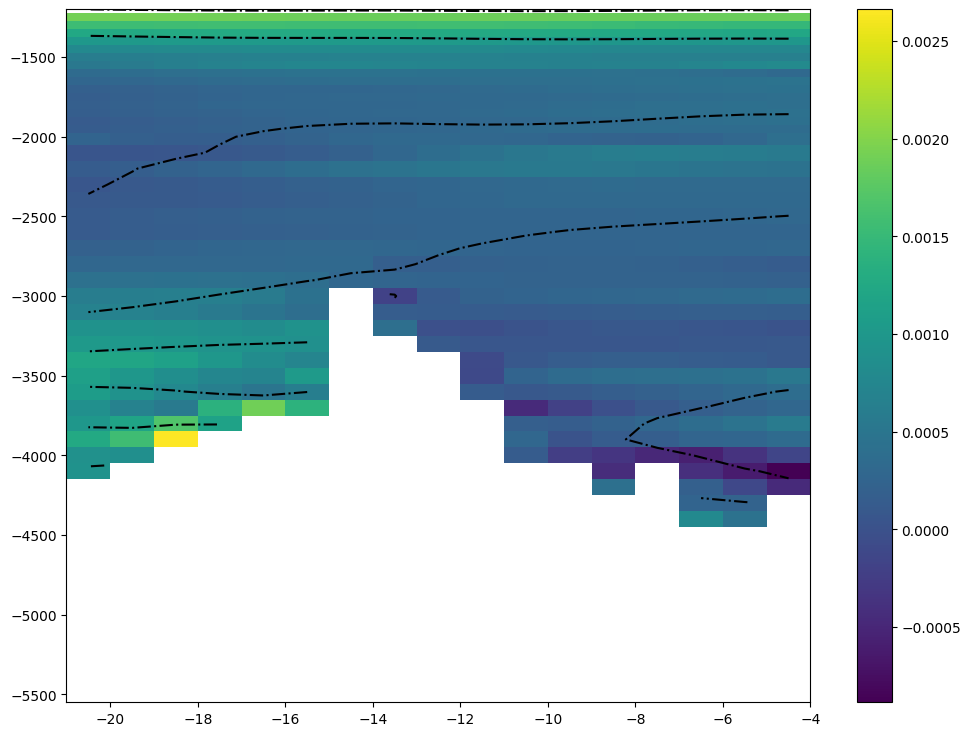

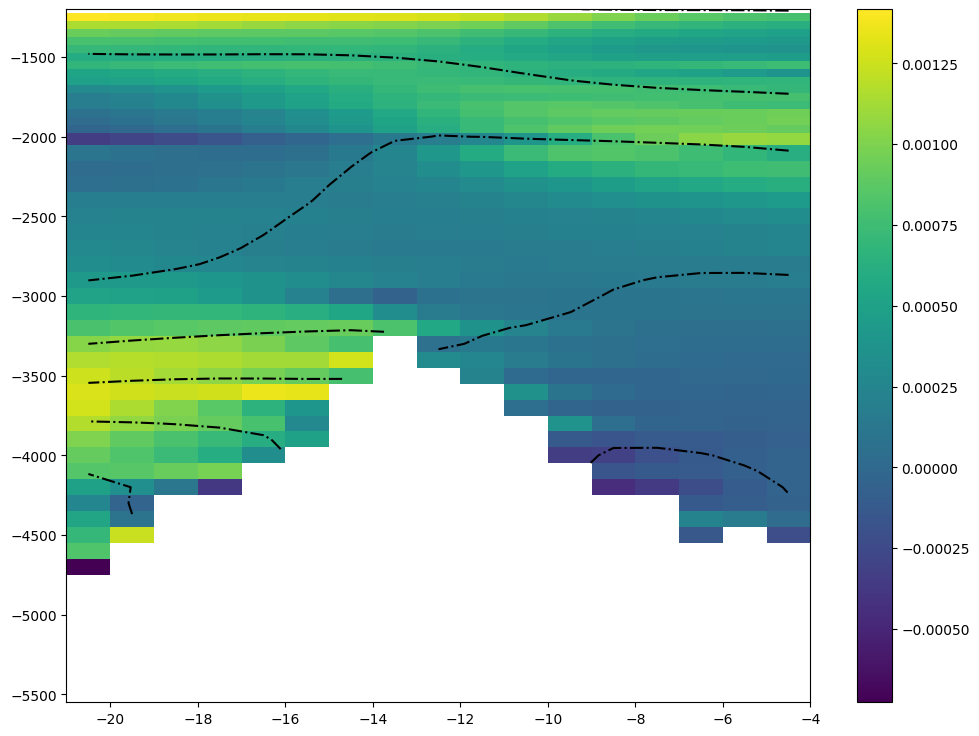

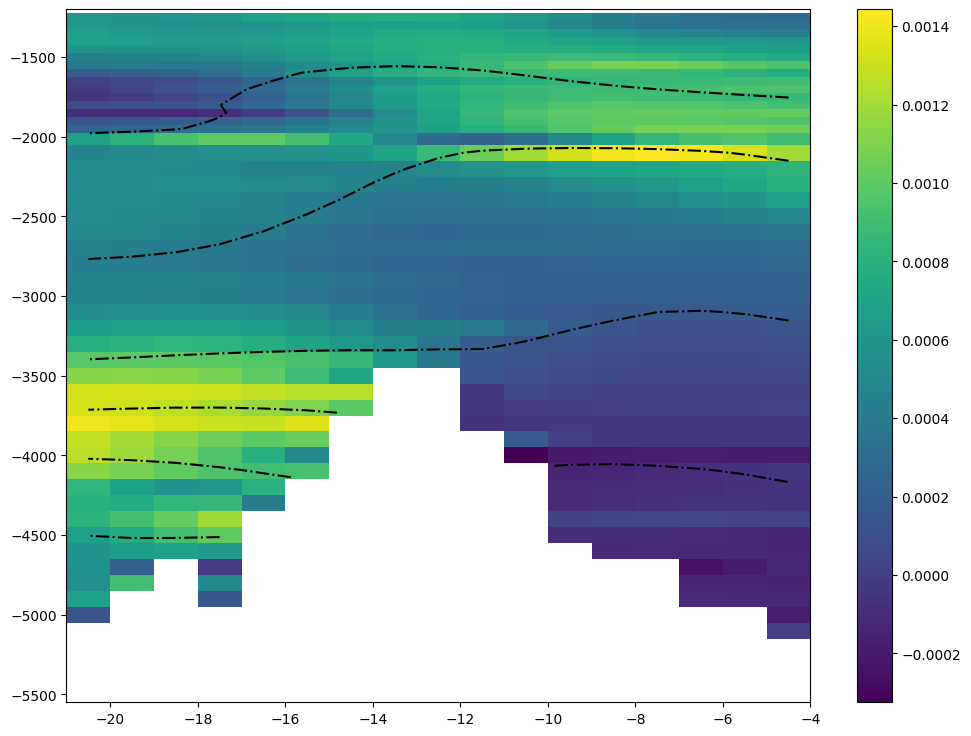

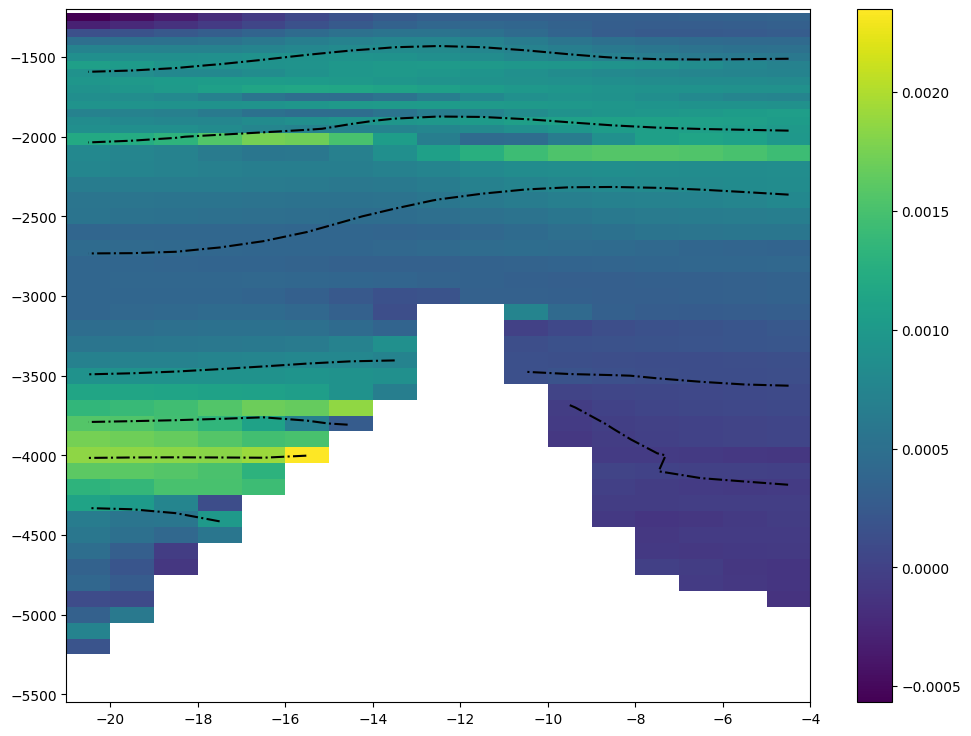

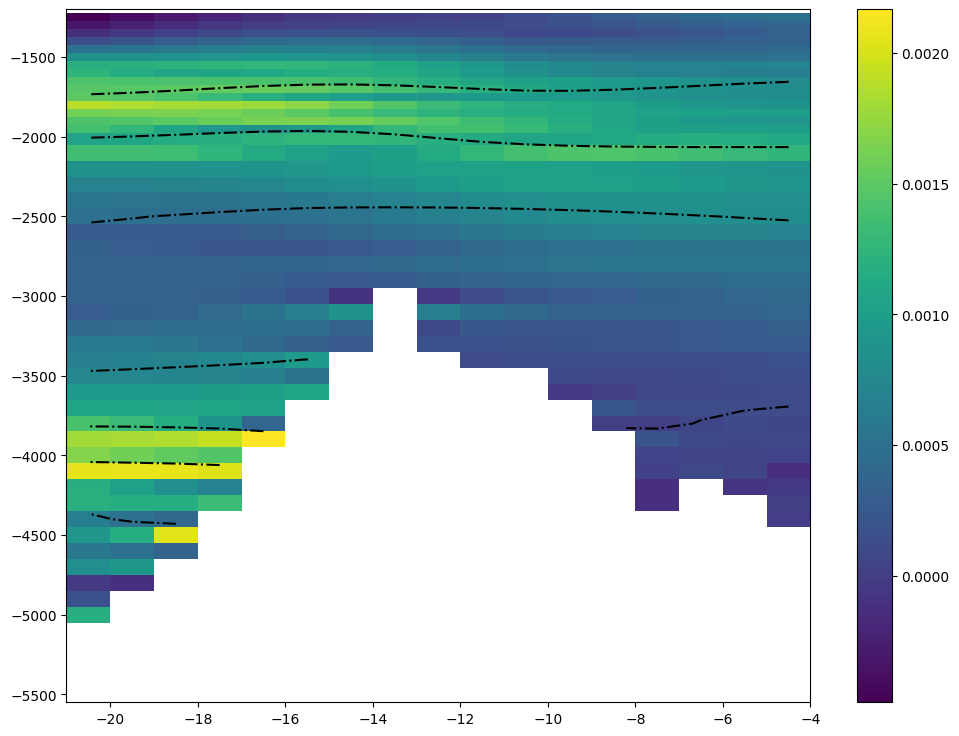

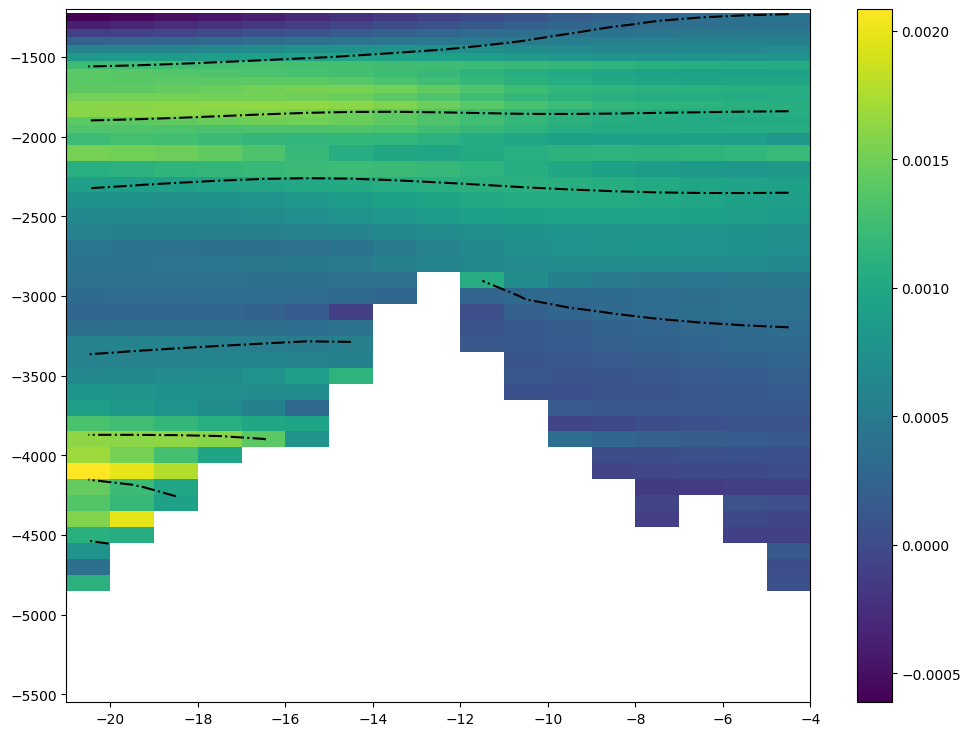

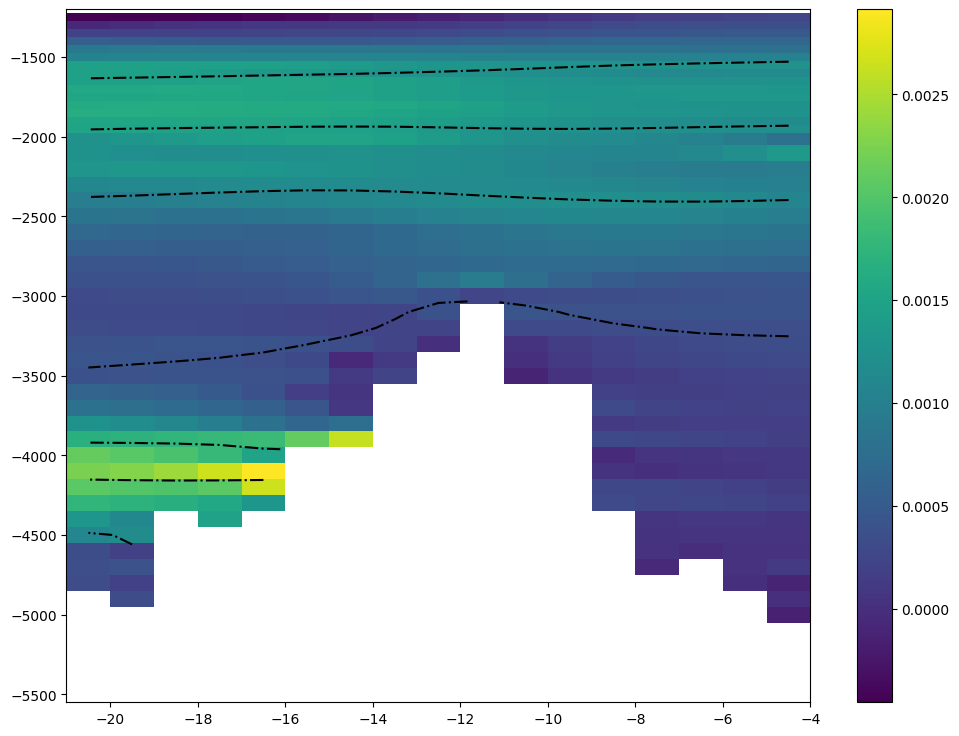

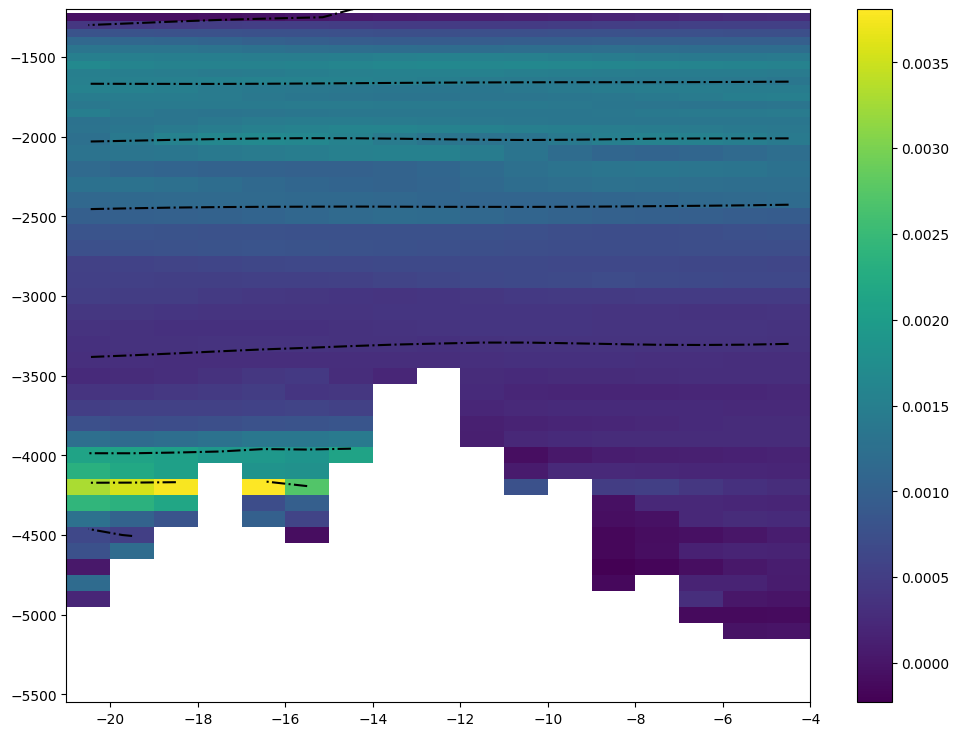

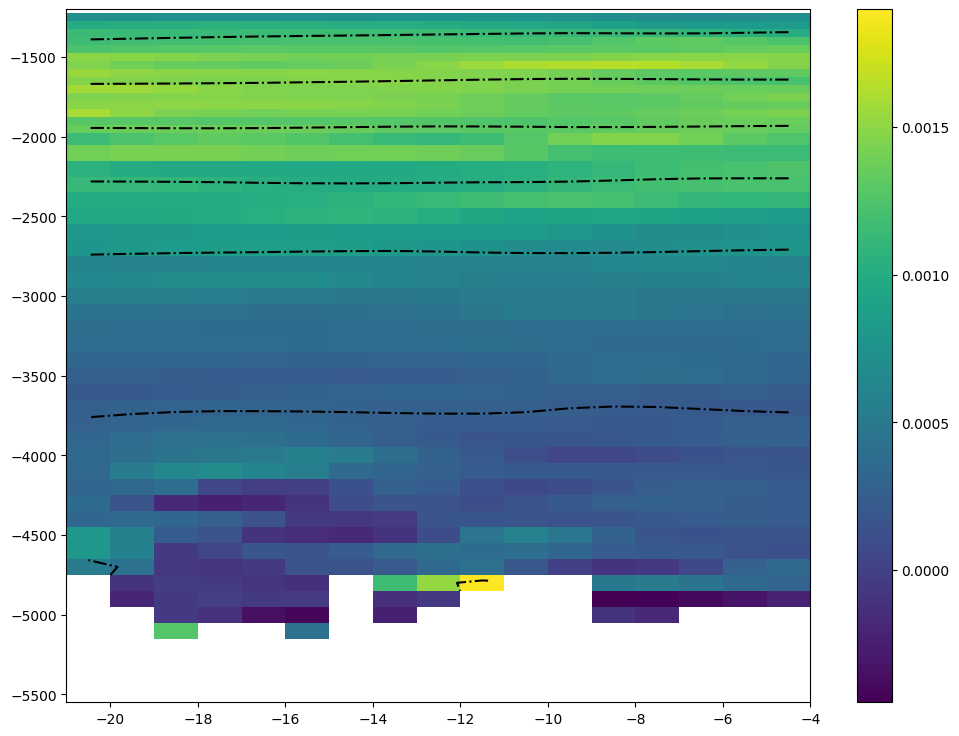

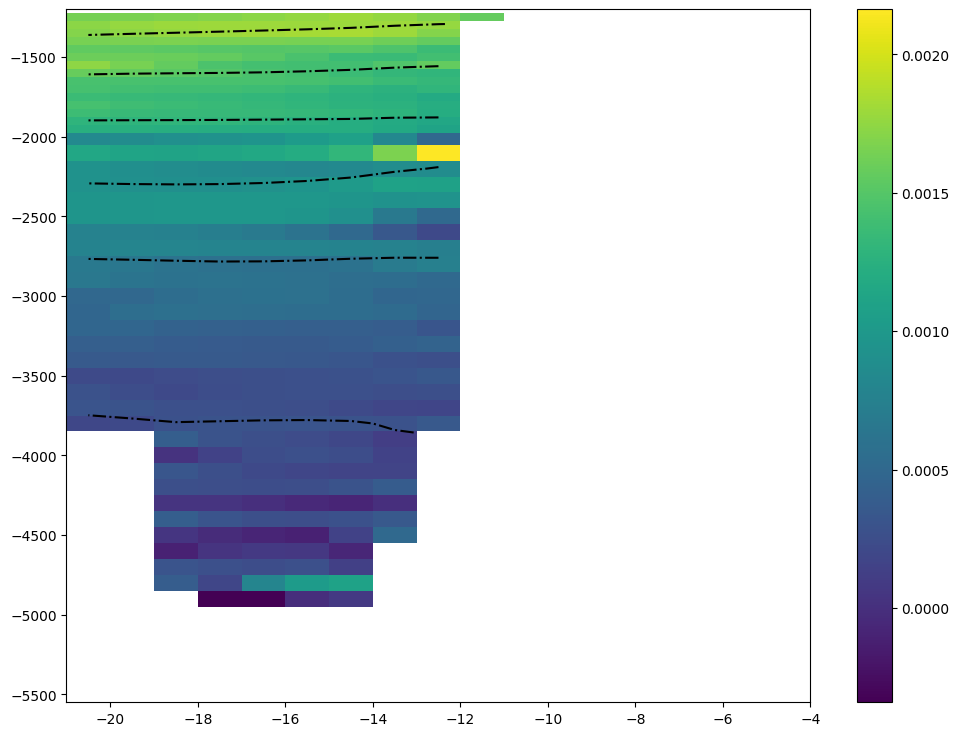

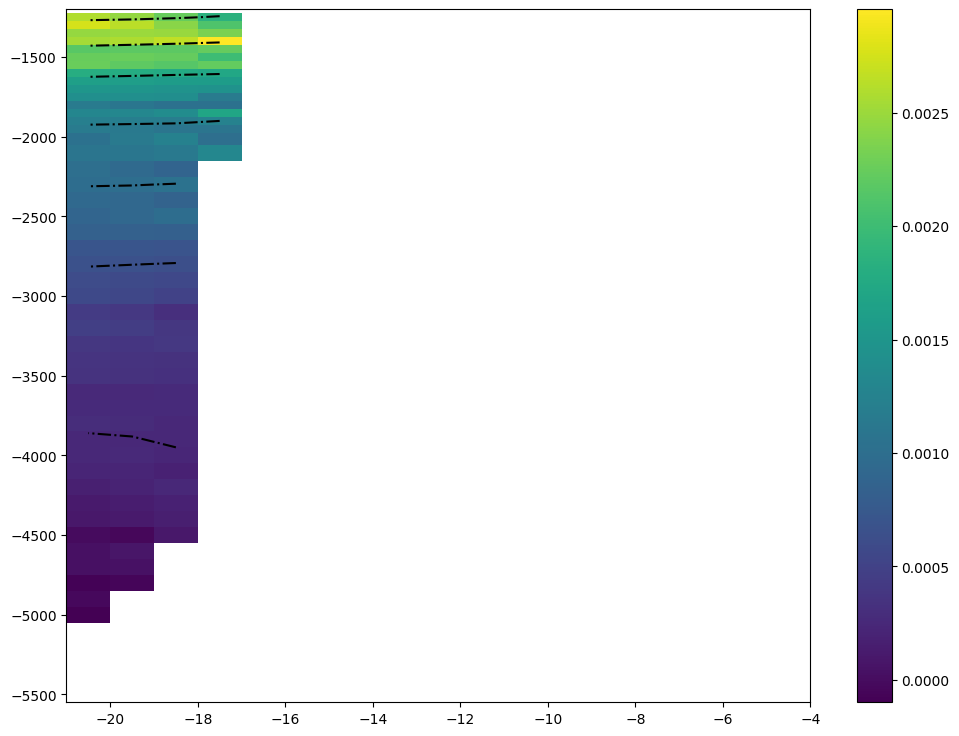

In [55]:
for i in np.linspace(49,101,13): #right version!!!

  lat1 = nc.variables['lat'][i]
  lon1 = nc.variables['lon'][159:176]
  depth1 = nc.variables['depth'][50:140]
  temp1 = nc.variables['t_an'][0,50:140,i,159:176]
  depth1=depth1*-1
  lonv1,depthv1= np.meshgrid(lon1,depth1,indexing='xy')
  lat = nc.variables['lat'][i]
  lon = nc.variables['lon'][159:176]
  depth = nc.variables['depth'][51:140]
  depth=depth*-1
  temp = nc.variables['t_an'][0,50:140,i,159:176]
  tempdiff= temp[1:]-temp[0:-1]
  lonv,depthv= np.meshgrid(lon,depth,indexing='xy')
  depthg = nc.variables['depth'][50:140]
  depthg=depthg*-1
  depthdiff = depthg[1:]-depthg[0:-1]
  lonv2,depthdiffv= np.meshgrid(lon,depthdiff,indexing='xy')
  tempgradient = tempdiff / depthdiffv
  fig = plt.figure(figsize=(12,9))
  cont = plt.contour(lonv1,depthv1,temp1,linestyles='dashdot',colors='black')#,origin='lower')
  plt.pcolormesh(lonv,depthv,tempgradient,alpha=1)
  #cont = plt.contourf(lonv,depthv,tempgradient,alpha=1)#,linestyles='dashdot')#,colors='black',origin='lower') 
  #cont = plt.contour(lonv,depthv,tempgradient,colors='black',linestyles='dashdot')#,colors='black',origin='lower') 
  plt.colorbar()
  plt.show()

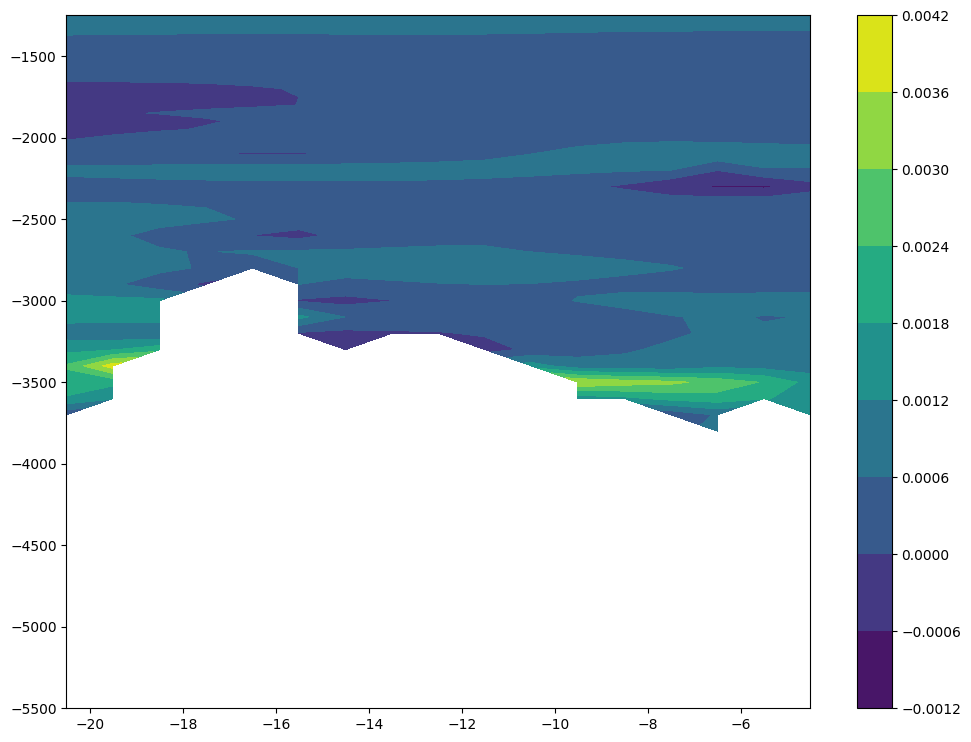

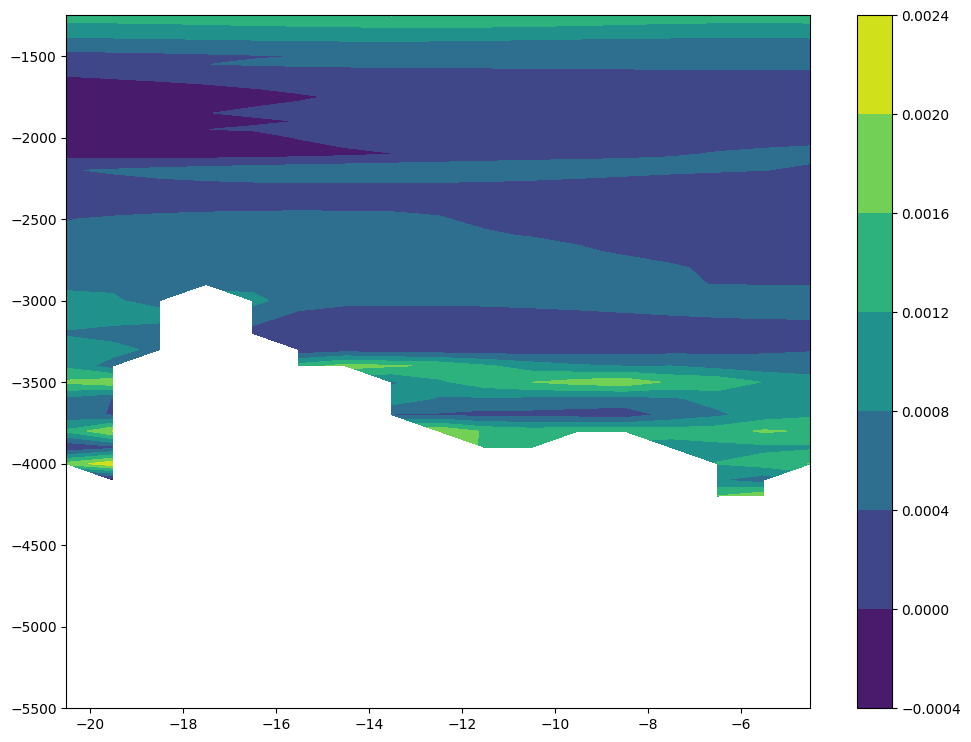

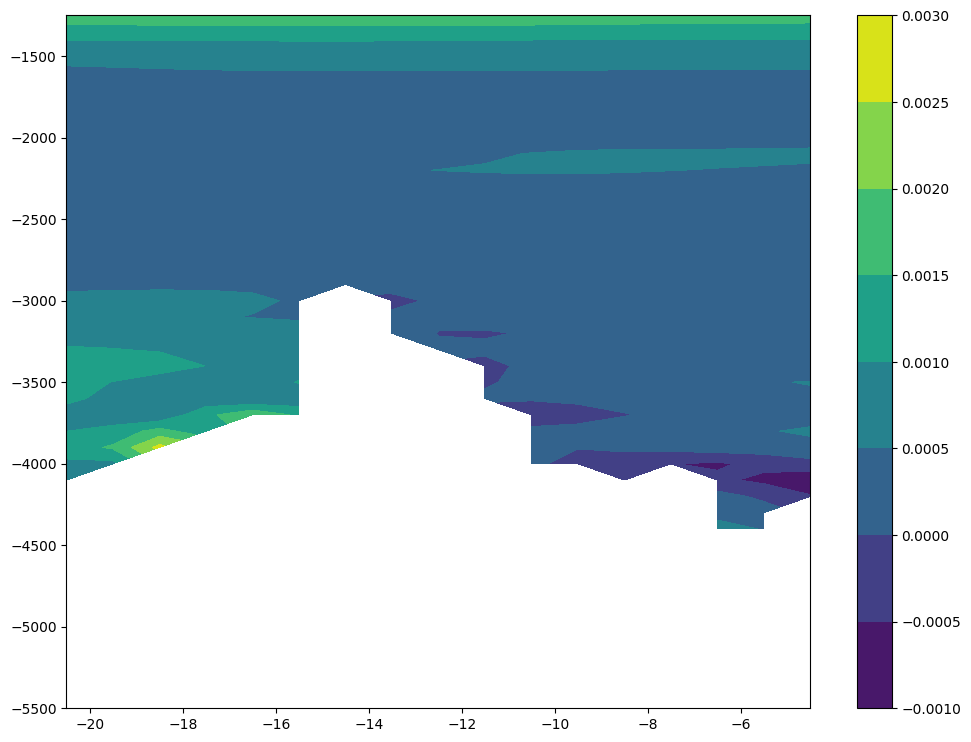

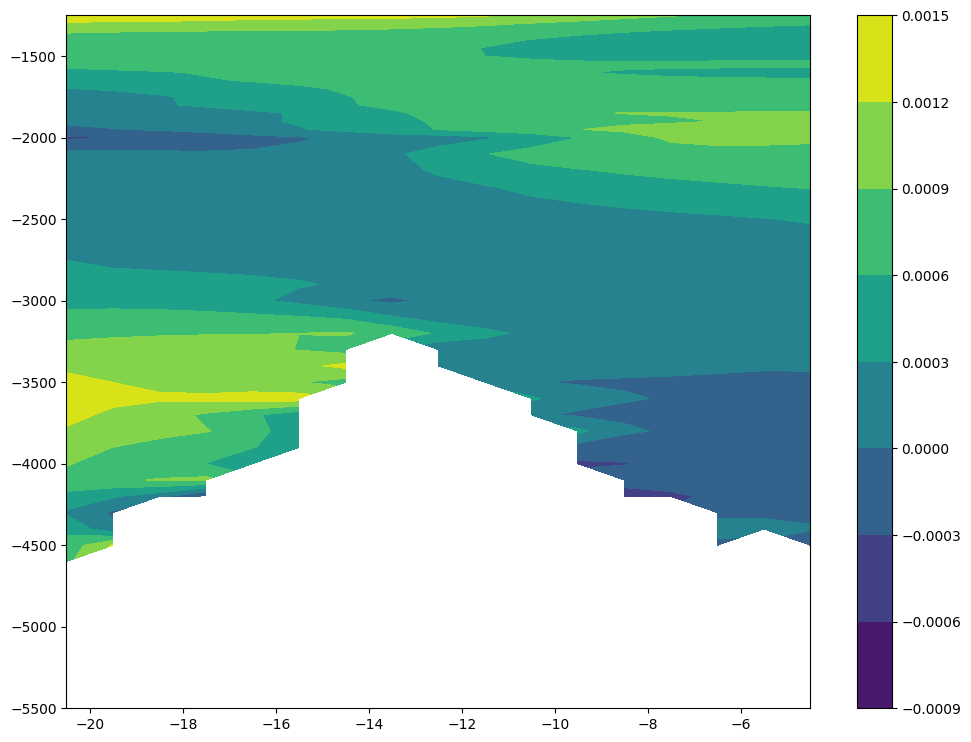

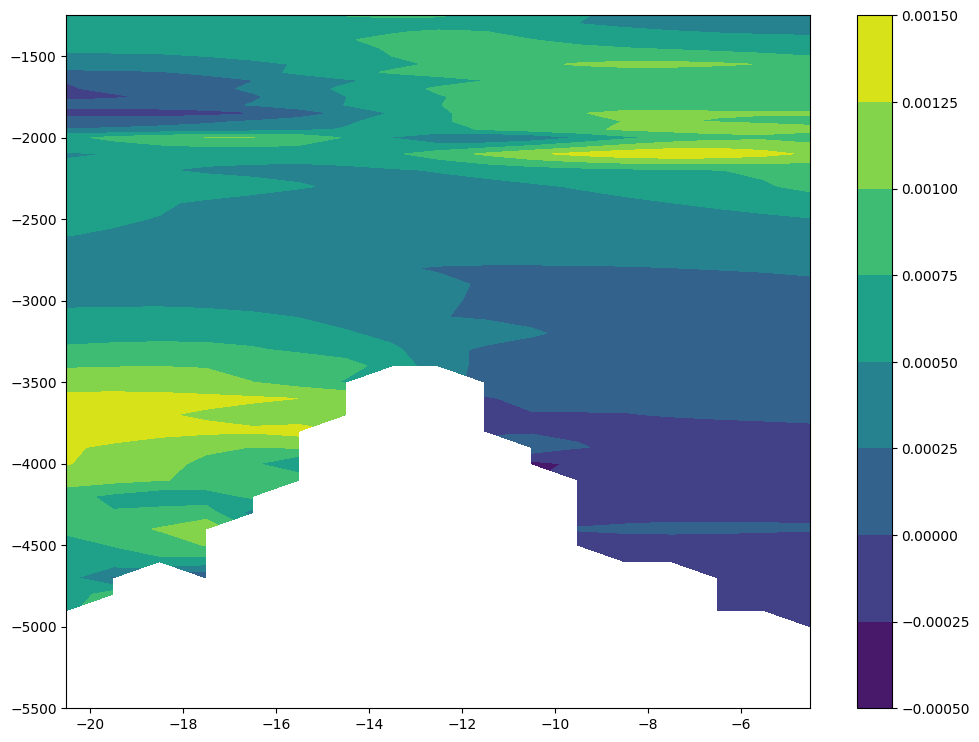

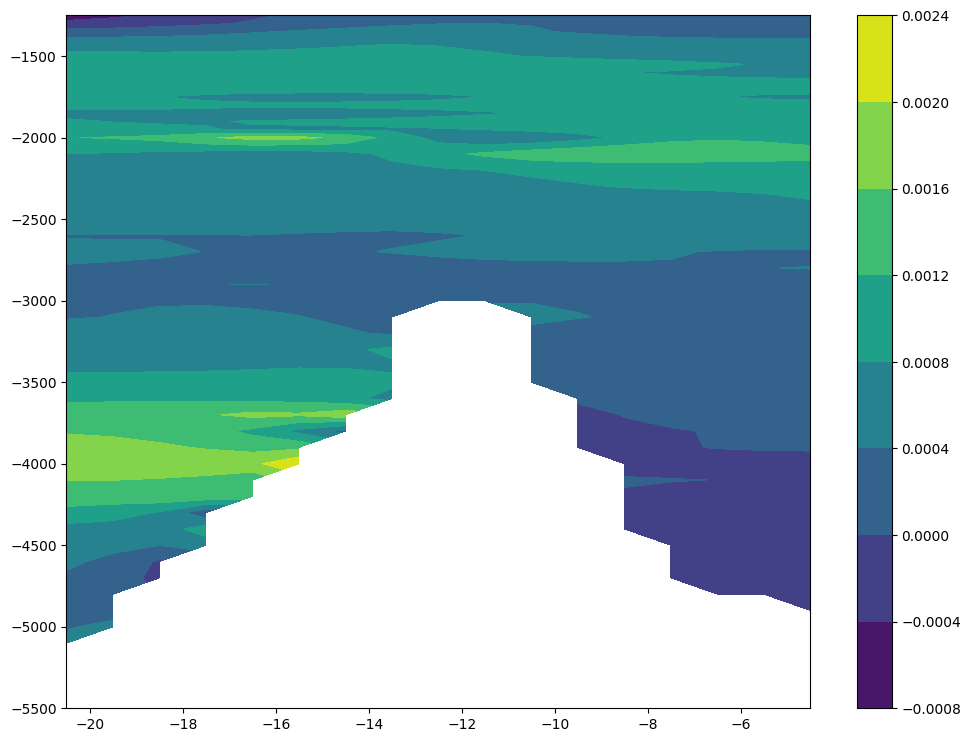

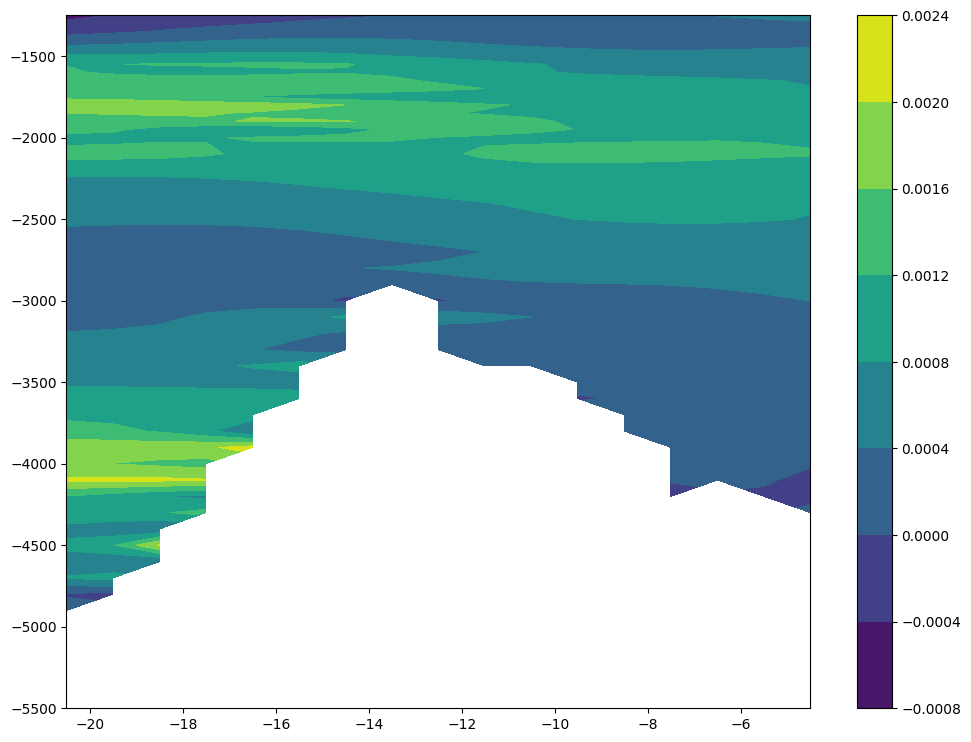

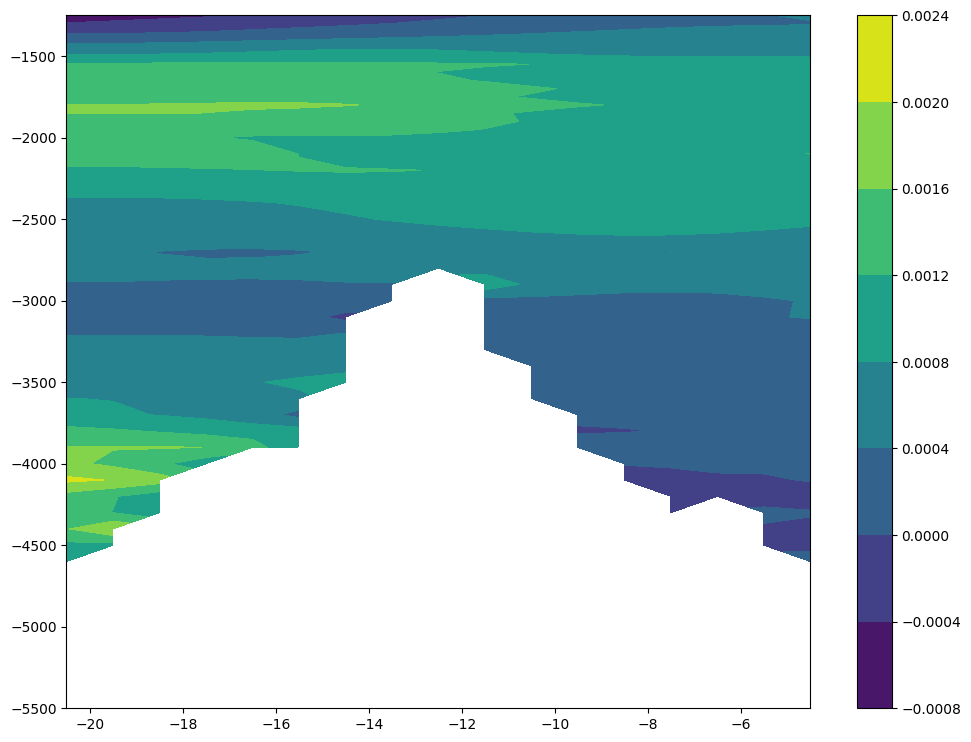

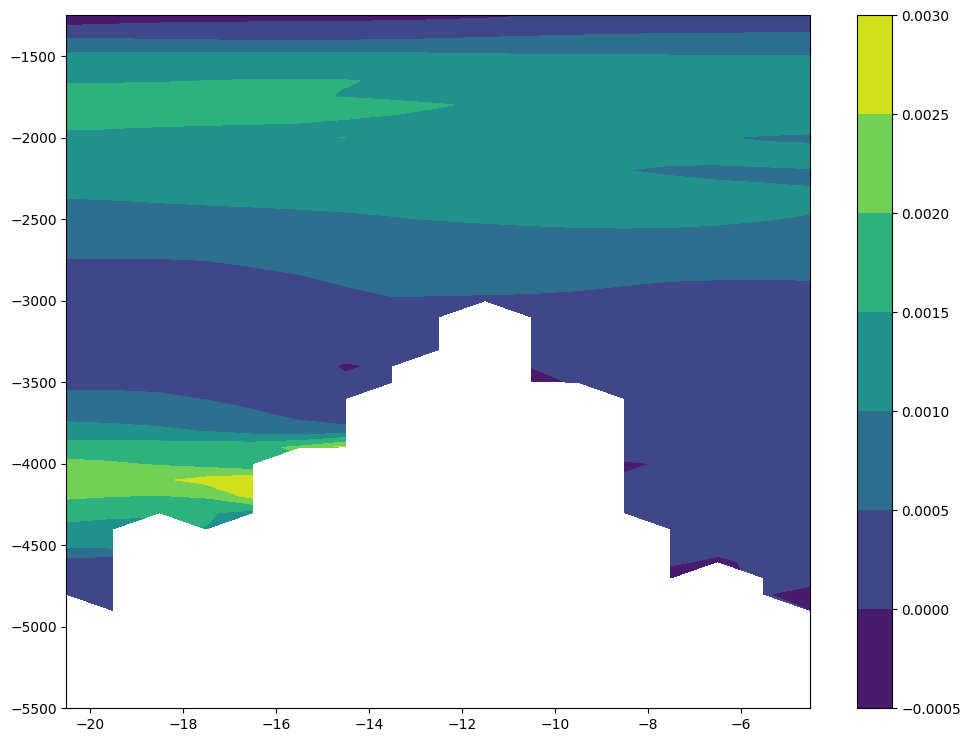

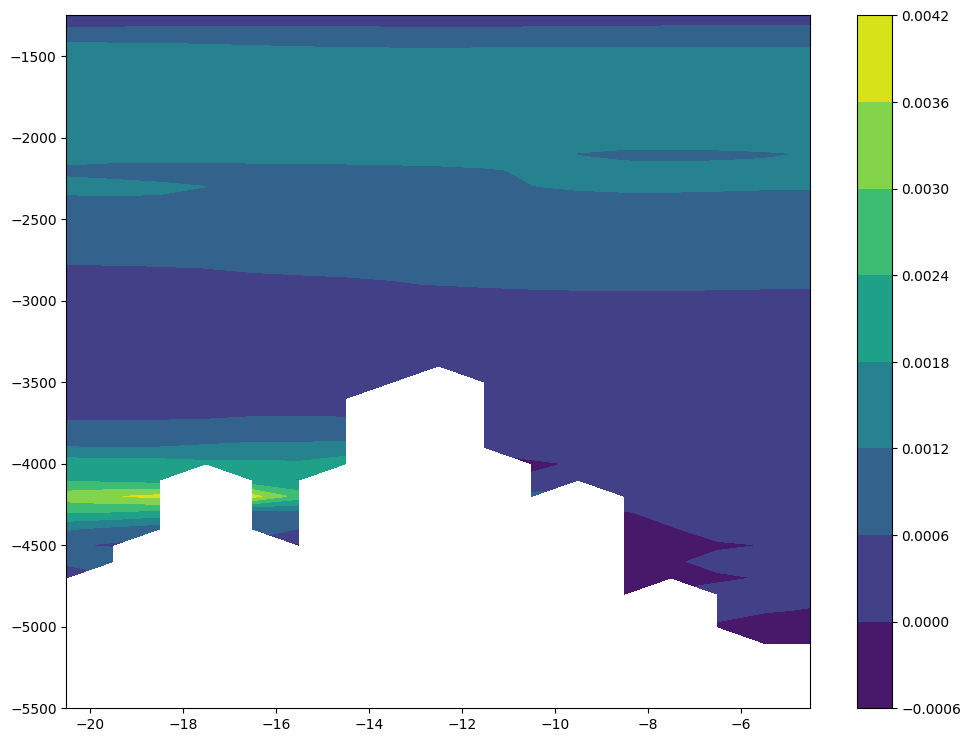

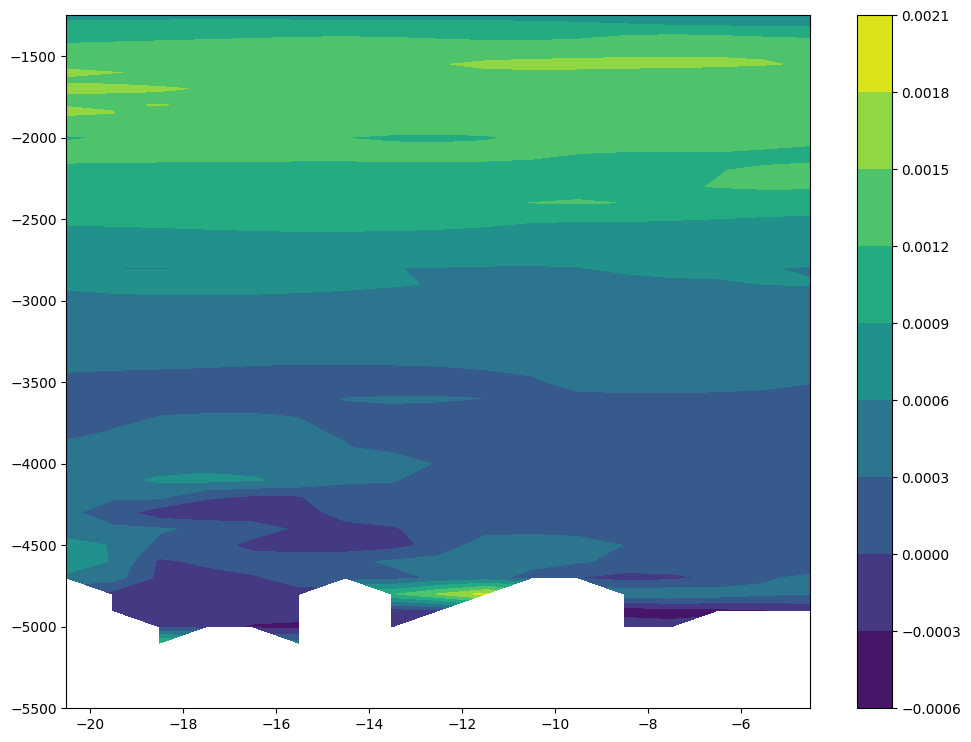

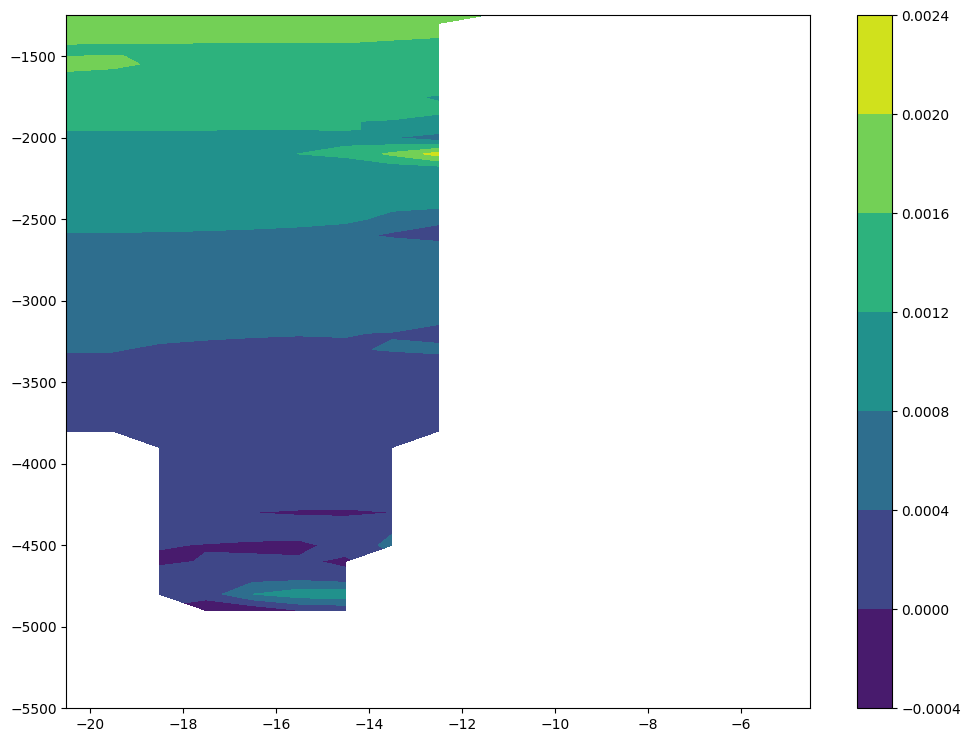

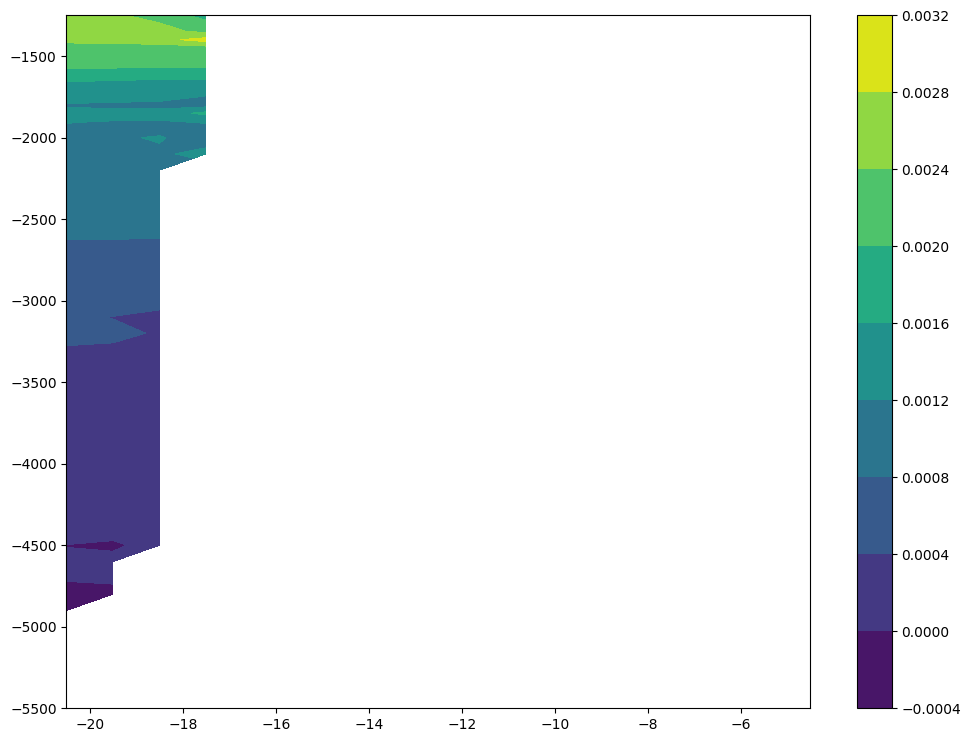

In [40]:
for i in np.linspace(49,101,13): #right version!!!

  lat1 = nc.variables['lat'][i]
  lon1 = nc.variables['lon'][159:176]
  depth1 = nc.variables['depth'][50:140]
  temp1 = nc.variables['t_an'][0,50:140,i,159:176]
  depth1=depth1*-1
  lonv1,depthv1= np.meshgrid(lon1,depth1,indexing='xy')
  lat = nc.variables['lat'][i]
  lon = nc.variables['lon'][159:176]
  depth = nc.variables['depth'][51:140]
  depth=depth*-1
  temp = nc.variables['t_an'][0,50:140,i,159:176]
  tempdiff= temp[1:]-temp[0:-1]
  lonv,depthv= np.meshgrid(lon,depth,indexing='xy')
  depthg = nc.variables['depth'][50:140]
  depthg=depthg*-1
  depthdiff = depthg[1:]-depthg[0:-1]
  lonv2,depthdiffv= np.meshgrid(lon,depthdiff,indexing='xy')
  tempgradient = tempdiff / depthdiffv
  fig = plt.figure(figsize=(12,9))
  #cont = plt.contourf(lonv1,depthv1,temp1,4)#,colors='black',origin='lower')
  #plt.pcolormesh(lonv,depthv,tempgradient)
  cont = plt.contourf(lonv,depthv,tempgradient,alpha=1)#,linestyles='dashdot')#,colors='black',origin='lower') 
  #cont = plt.contour(lonv,depthv,tempgradient,colors='black',linestyles='dashdot')#,colors='black',origin='lower') 
  plt.colorbar()
  plt.show()

In [29]:
a = np.array([1, 2, 3, 4, 5, 6])
b = np.expand_dims(a, axis=1)
b


array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [30]:
row_vector = a[np.newaxis, :]
row_vector

array([[1, 2, 3, 4, 5, 6]])

In [31]:
col_vector = a[:, np.newaxis]
col_vector

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [32]:
depth = nc.variables['depth'][51:140]
depth.shape

(51,)

In [33]:
 temp = nc.variables['t_an'][0,54:140,49,159:176]

In [34]:
tempgradient= (temp[0:-1,0]-temp[1:,0])
tempgradient.shape

(47,)

In [35]:
depth = nc.variables['depth'][54:140]
depth=depth*-1
depthgradient = depth[0:-1]-depth[1:]
depthgradient.shape

gradient = tempgradient/depthgradient
gradient

masked_array(data=[0.00032400130294263363, 0.0001276016264455393,
                   0.0001584005367476493, 5.15985484526027e-05,
                   2.5997162083513103e-05, -0.0001779985468601808,
                   -0.00014800071949139237, -0.00012599944602698088,
                   -5.000114470021799e-05, -0.00014359950728248805,
                   -0.00013599872181657702, -4.000186891062185e-05,
                   0.00022880076721776277, 0.0007402014452964067,
                   0.0003787994501180947, 0.0006081986357457936,
                   0.0006760001415386796, 0.0007148003787733614,
                   0.0007800007006153464, 0.0009741997928358614,
                   0.0009017991833388805, 0.0013639997923746705,
                   0.0013821006286889315, 0.0009051000815816224,
                   0.0016170000890269876, 0.002474000444635749,
                   0.002118799602612853, 0.001737099839374423,
                   0.0001138997104135342, 0.0018239999189972878, --, --,
       

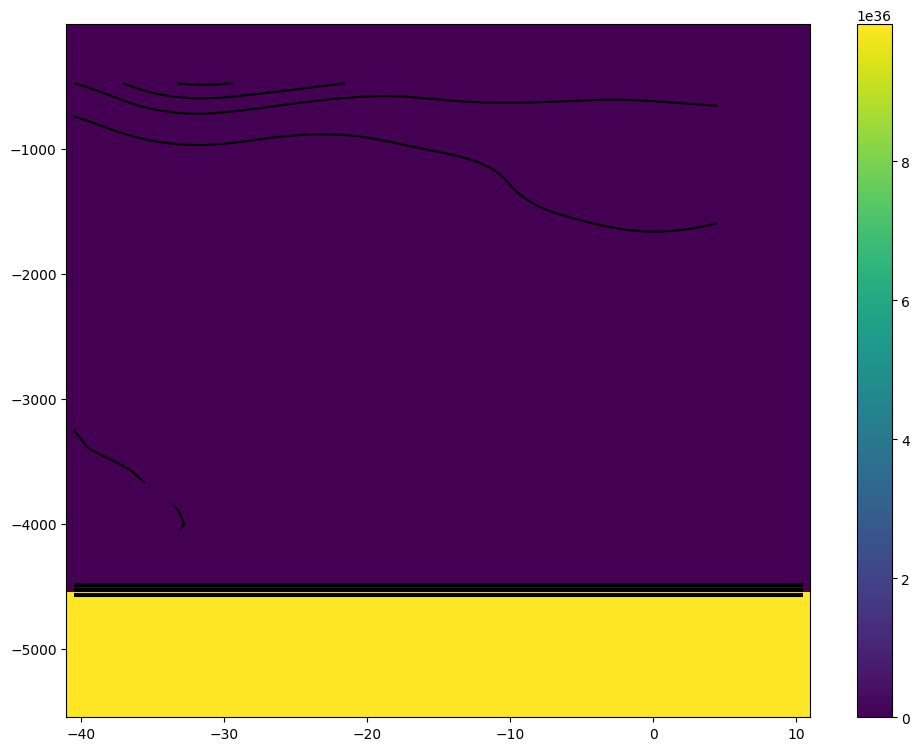

In [91]:
lat = nc.variables['lat'][49:101]
lon = nc.variables['lon'][49]
depth = nc.variables['depth'][35:140]
temp = nc.variables['t_an'][0,35:140,49:101,i]
depth=depth*-1
latv,depthv= np.meshgrid(lat,depth,indexing='xy')
lat2 = nc.variables['lat'][49:101]
lon2 = nc.variables['lon'][i]
depth2 = nc.variables['depth'][1:140]
depth2 = depth2*-1
temp2 = nc.variables['t_an'][0,0:140,49:101,i]
tempdiff = (temp2[1:,0]-temp2[0:-1,0])*1000000000
depthg = nc.variables['depth'][0:140]
depthg=depthg*-1
depthdiff = depthg[1:]-depthg[0:-1]
tempgradient = tempdiff/depthdiff
latv2,tempgradientv = np.meshgrid(lat2,tempgradient,indexing='xy')
latv2,depthv2= np.meshgrid(lat2,depth2,indexing='xy')
tempgradientv
fig = plt.figure(figsize=(12,9))
cont = plt.contour(latv,depthv,temp,4,colors='k',origin='lower')
cont = plt.contour(latv2,depthv2,tempgradientv,4,colors='k',origin='lower')
plt.pcolormesh(latv2,depthv2,tempgradientv) 
#plt.pcolormesh(latv,depthv,temp) 
plt.colorbar()
plt.show()

In [62]:
lat = nc.variables['lat'][49:101]
lon = nc.variables['lon'][159]
depth = nc.variables['depth'][35:140]
temp = nc.variables['t_an'][0,35:140,49:101,i]
depth=depth*-1
latv,depthv= np.meshgrid(lat,depth,indexing='xy')
lat2 = nc.variables['lat'][49:101]
lon2 = nc.variables['lon'][i]
depth2 = nc.variables['depth'][1:140]
depth2 = depth2*-1
temp2 = nc.variables['t_an'][0,0:140,49:101,i]
tempdiff = (((temp2[1:,0]-temp2[0:-1,0])- (temp2[1:,0]-temp2[0:-1,0]).mean())/(temp2[1:,0]-temp2[0:-1,0]).std())*10000000
depthg = nc.variables['depth'][0:140]
depthg=depthg*-1
depthdiff = (((depthg[1:]-depthg[0:-1])-(depthg[1:]-depthg[0:-1]).mean())/(depthg[1:]-depthg[0:-1]).std())
tempgradient =  tempdiff/depthdiff
latv2,tempgradientv = np.meshgrid(lat2,tempgradient,indexing='xy')
latv2,depthv2= np.meshgrid(lat2,depth2,indexing='xy')

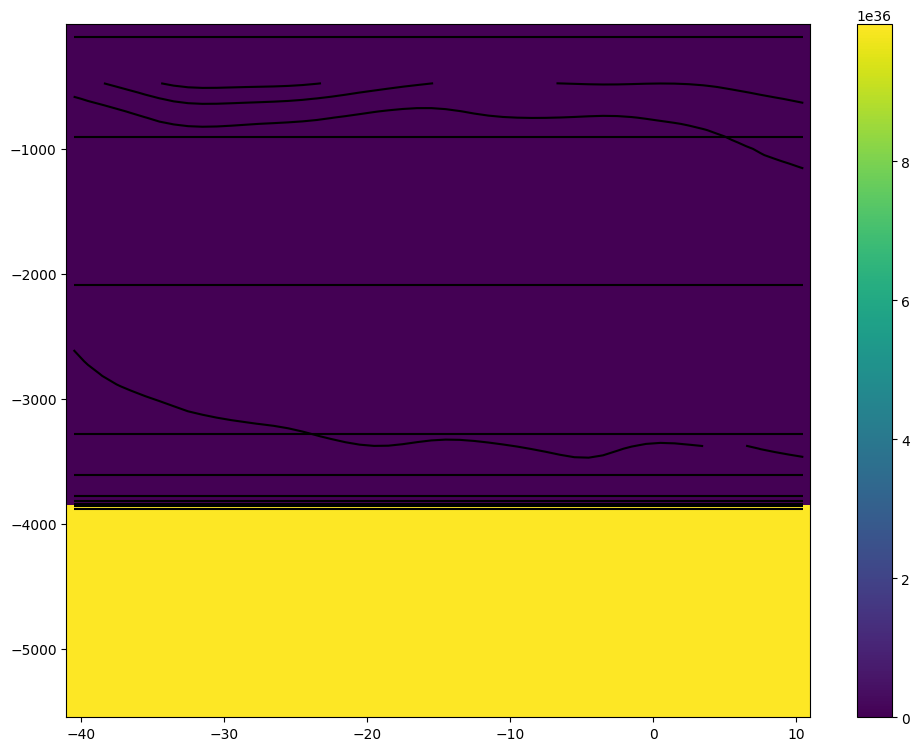

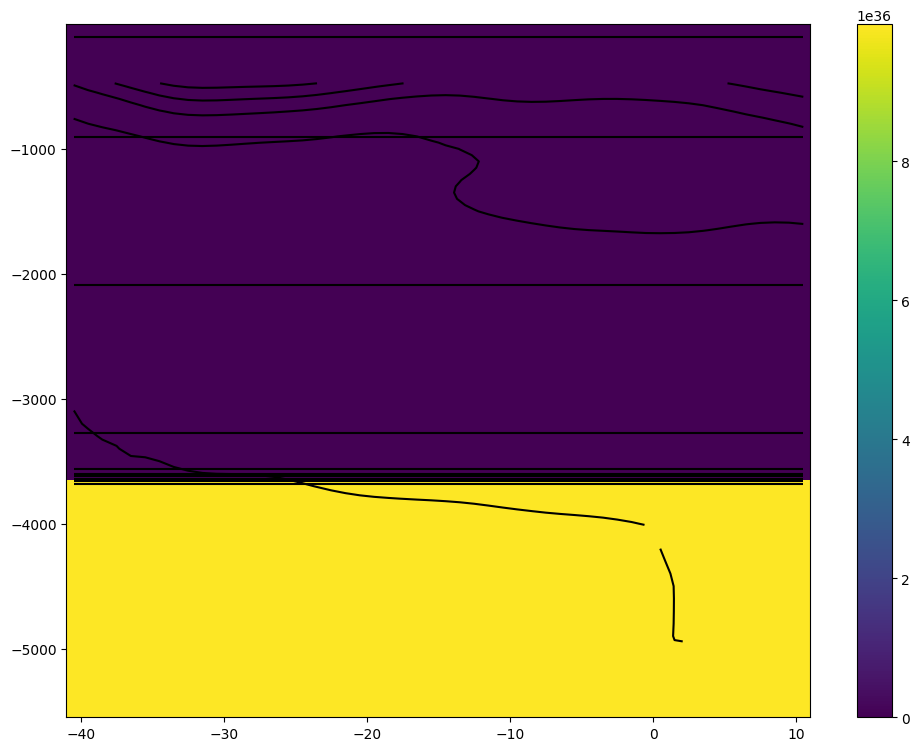

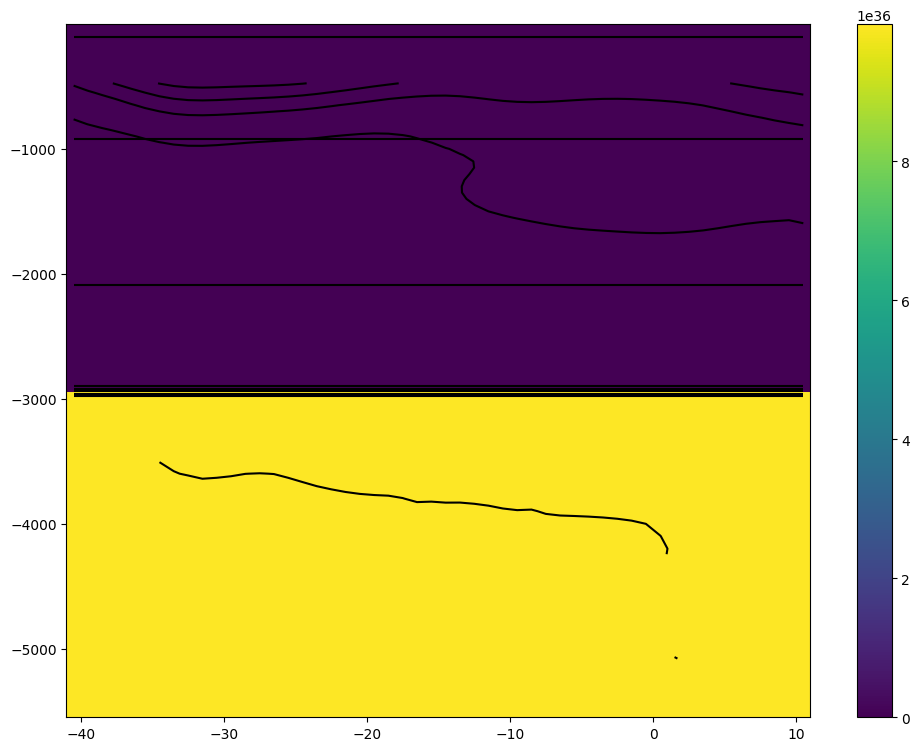

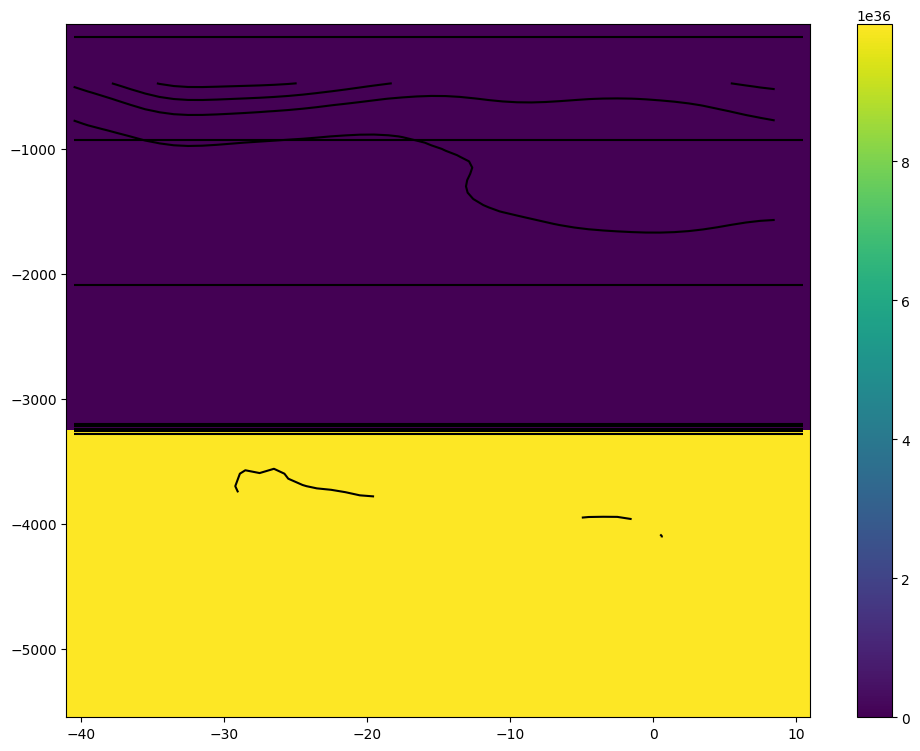

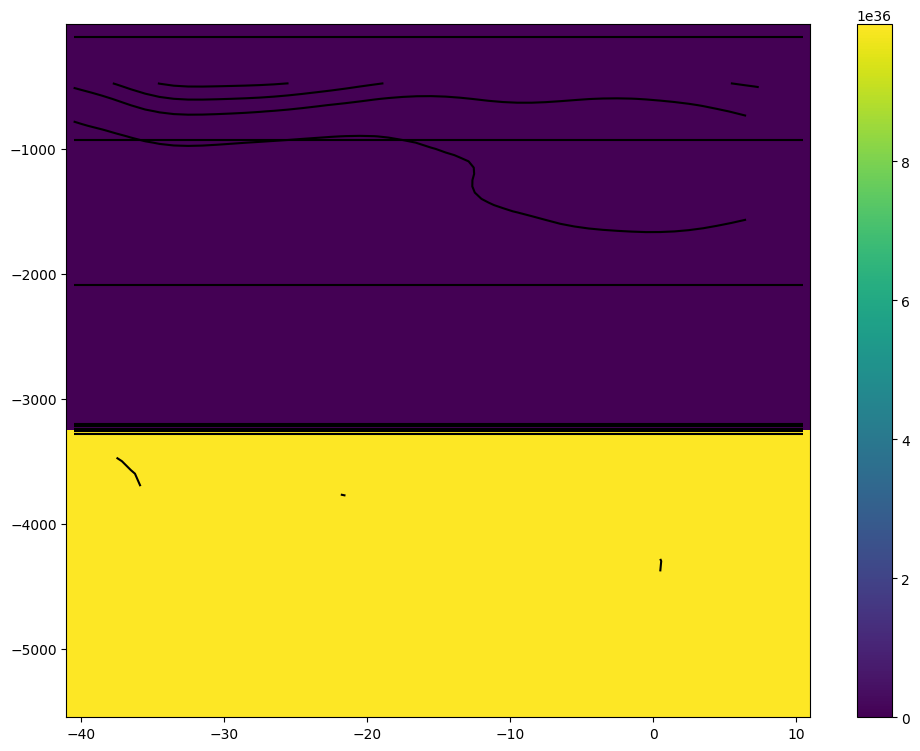

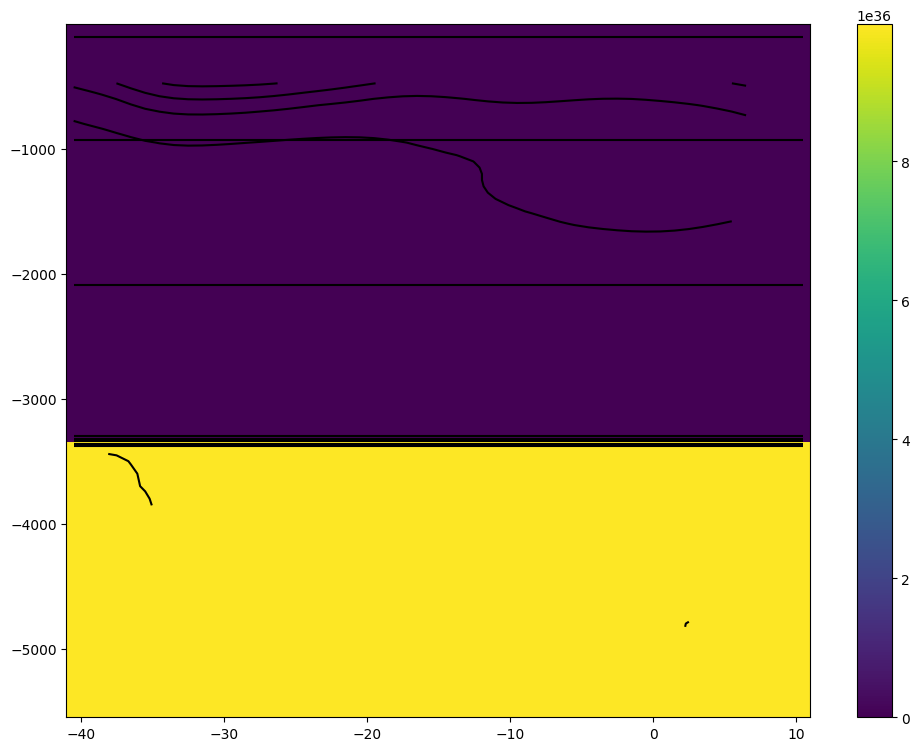

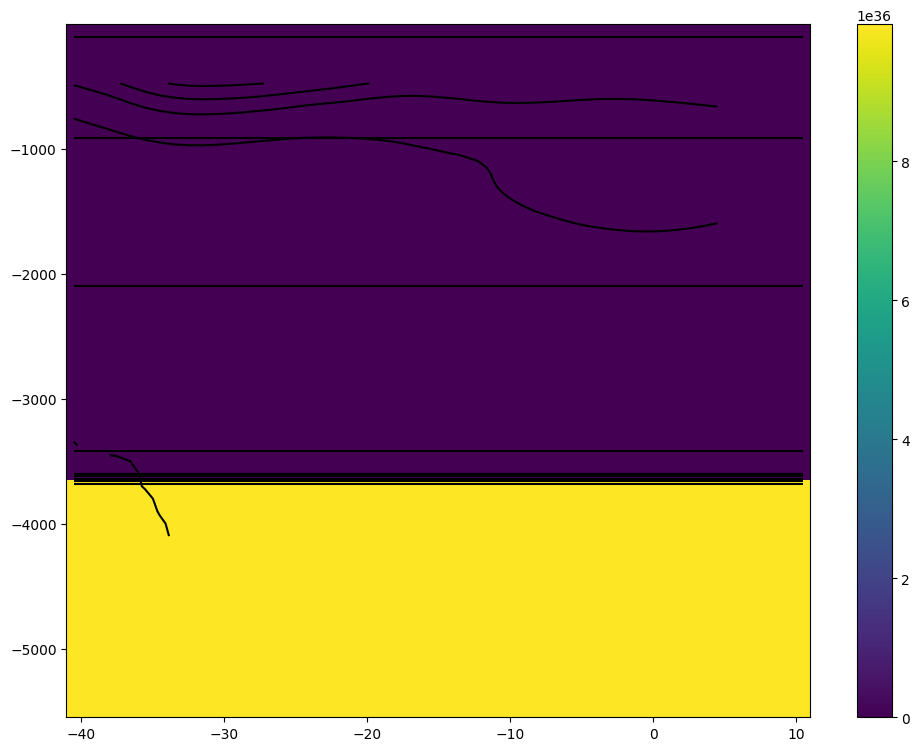

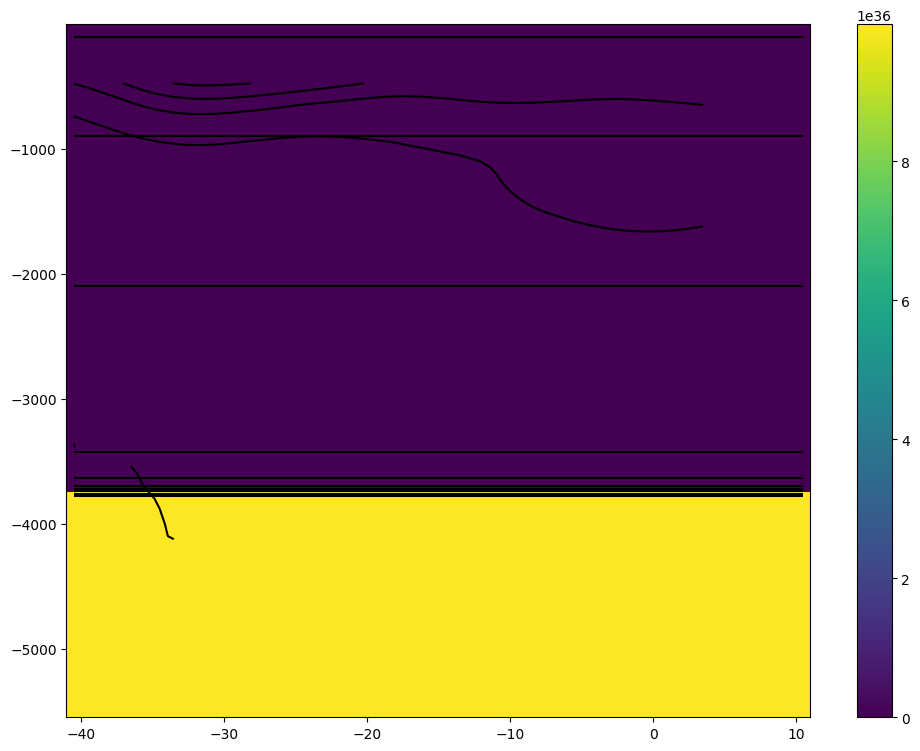

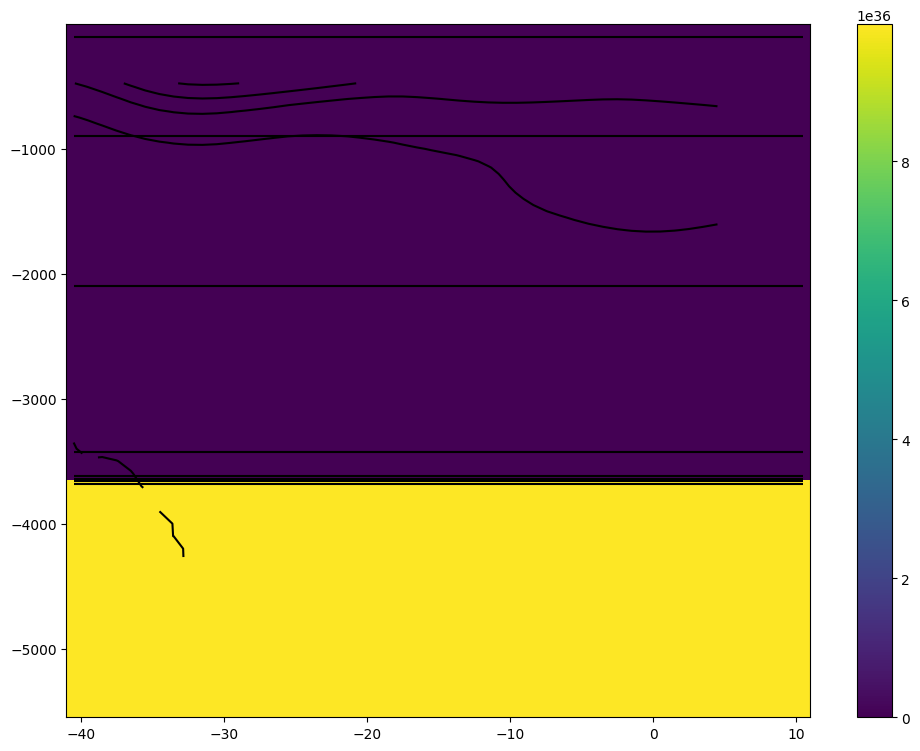

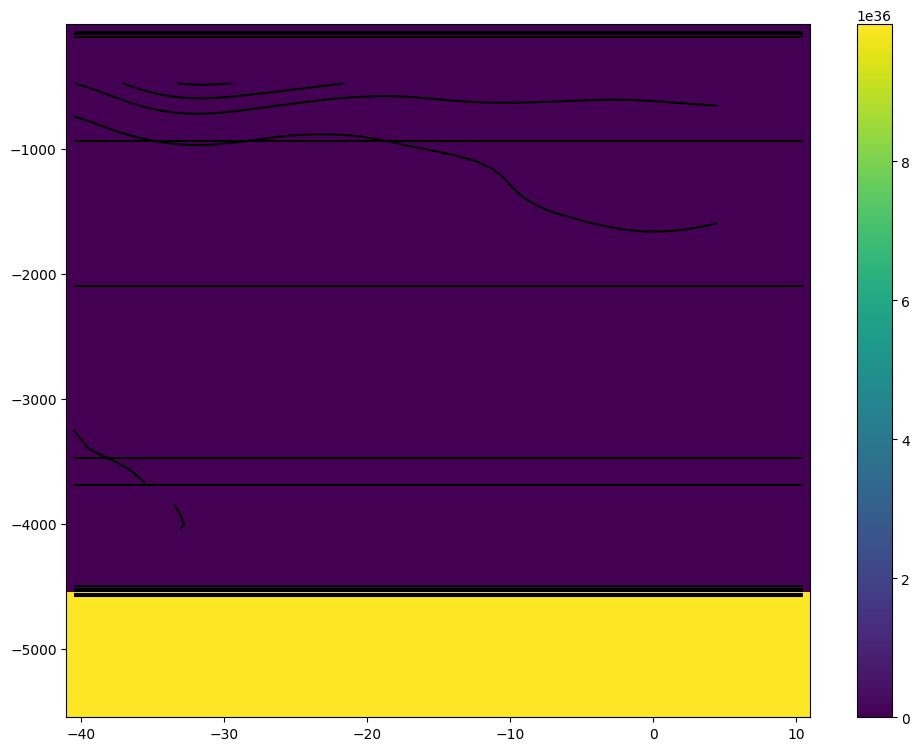

In [65]:
from numpy.ma.extras import average
for i in np.linspace(159,176,10):
  lat = nc.variables['lat'][49:101]
  lon = nc.variables['lon'][i]
  depth = nc.variables['depth'][35:140]
  temp = nc.variables['t_an'][0,35:140,49:101,i]
  depth=depth*-1
  latv,depthv= np.meshgrid(lat,depth,indexing='xy')
  lat2 = nc.variables['lat'][49:101]
  lon2 = nc.variables['lon'][i]
  depth2 = nc.variables['depth'][1:140]
  depth2 = depth2*-1
  temp2 = nc.variables['t_an'][0,0:140,49:101,i]
  tempdiff = (((temp2[1:,0]-temp2[0:-1,0])- (temp2[1:,0]-temp2[0:-1,0]).mean())/(temp2[1:,0]-temp2[0:-1,0]).std())*10000
  depthg = nc.variables['depth'][0:140]
  depthg=depthg*-1
  depthdiff = (((depthg[1:]-depthg[0:-1])-(depthg[1:]-depthg[0:-1]).mean())/(depthg[1:]-depthg[0:-1]).std())
  tempgradient =  tempdiff/depthdiff
  latv2,tempgradientv = np.meshgrid(lat2,tempgradient,indexing='xy')
  latv2,depthv2= np.meshgrid(lat2,depth2,indexing='xy')
  fig = plt.figure(figsize=(12,9))
  cont = plt.contour(latv,depthv,temp,4,colors='k',origin='lower')
  cont = plt.contour(latv2,depthv2,tempgradientv,4,colors='k',origin='lower')
  plt.pcolormesh(latv2,depthv2,tempgradientv) 
  #plt.pcolormesh(latv,depthv,temp) 
  plt.colorbar()
  plt.show()

In [84]:
  depthdiff = depthg[1:]-depthg[0:-1]
  tempdiff = (temp2[1:,0]-temp2[0:-1,0])*1000
  tempgradient =  tempdiff/depthdiff
  tempgradient

masked_array(data=[14.340019226074219, 17.55809783935547,
                   6.120109558105469, 6.9019317626953125,
                   6.456184387207031, 9.223747253417969,
                   11.619949340820312, 13.716316223144531,
                   16.223716735839844, 19.85626220703125,
                   22.17998504638672, 23.760032653808594,
                   28.203771591186523, 27.796173095703125,
                   26.86004638671875, 27.179906845092773,
                   24.920082092285156, 19.93999481201172,
                   20.419883728027344, 18.980026245117188,
                   15.972023010253906, 10.864753723144531,
                   9.023246765136719, 8.967971801757812, 9.96002197265625,
                   11.012382507324219, 11.939621925354004,
                   12.807997703552246, 13.751983642578125,
                   14.455986022949219, 15.039997100830078,
                   14.512805938720703, 14.379197120666504,
                   13.535996437072754, 13.472003

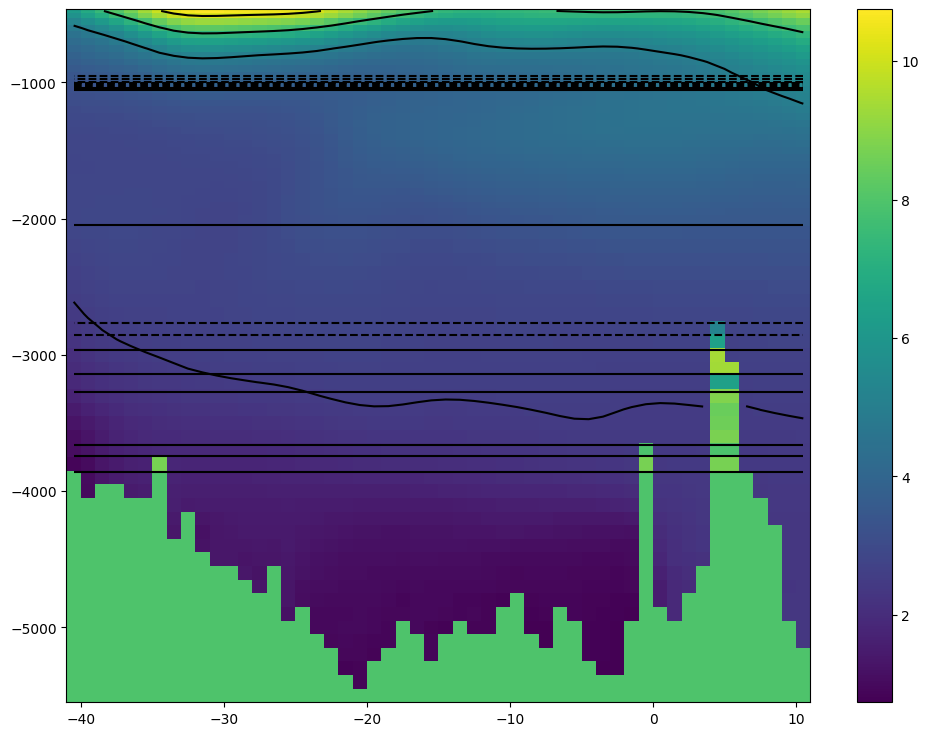

masked_array(
  data=[[-1.0045415 , -1.0045415 , -1.0045415 , ..., -1.0045415 ,
         -1.0045415 , -1.0045415 ],
        [-0.27311563, -0.27311563, -0.27311563, ..., -0.27311563,
         -0.27311563, -0.27311563],
        [-0.36164016, -0.36164016, -0.36164016, ..., -0.36164016,
         -0.36164016, -0.36164016],
        ...,
        [-0.9344879 , -0.9344879 , -0.9344879 , ..., -0.9344879 ,
         -0.9344879 , -0.9344879 ],
        [-0.9344879 , -0.9344879 , -0.9344879 , ..., -0.9344879 ,
         -0.9344879 , -0.9344879 ],
        [-0.9344879 , -0.9344879 , -0.9344879 , ..., -0.9344879 ,
         -0.9344879 , -0.9344879 ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [127]:
from numpy.ma.extras import average
#for i in np.linspace(159,176,10):
lat = nc.variables['lat'][49:101]
lon = nc.variables['lon'][159]
depth = nc.variables['depth'][35:140]
temp = nc.variables['t_an'][0,35:140,49:101,159]
depth=depth*-1
latv,depthv= np.meshgrid(lat,depth,indexing='xy')
lat2 = nc.variables['lat'][49:101]
lon2 = nc.variables['lon'][159]
depth2 = nc.variables['depth'][36:140]
depth2 = depth2*-1
temp2 = nc.variables['t_an'][0,35:140,49:101,159]
tempdiff = ((temp2[1:,0]-temp2[0:-1,0])-(temp2[1:,0]-temp2[0:-1,0]).mean())/(temp2[1:,0]-temp2[0:-1,0]).std()
depthg = nc.variables['depth'][35:140]
depthg=depthg*-1
depthdiff = ((depthg[1:]-depthg[0:-1])-(depthg[1:]-depthg[0:-1]).mean())/(depthg[1:]-depthg[0:-1]).std()
tempgradient =depthdiff/tempdiff
latv2,tempgradientv = np.meshgrid(lat2,tempgradient,indexing='xy')
latv2,depthv2= np.meshgrid(lat2,depth2,indexing='xy')

fig = plt.figure(figsize=(12,9))
cont = plt.contour(latv,depthv,temp,4,colors='k',origin='lower')
cont = plt.contour(latv2,depthv2,tempgradientv,4,colors='k',origin='lower')

plt.pcolormesh(latv2,depthv2,tempgradientv) #the magnitutude may not match here(depth axis dimension not match to gradient's dimension)
plt.pcolormesh(latv,depthv,temp)
plt.colorbar()
plt.show()
tempgradientv

In [110]:
tempgradientv

masked_array(
  data=[[1.4340019e+02, 1.4340019e+02, 1.4340019e+02, ..., 1.4340019e+02,
         1.4340019e+02, 1.4340019e+02],
        [1.7558098e+02, 1.7558098e+02, 1.7558098e+02, ..., 1.7558098e+02,
         1.7558098e+02, 1.7558098e+02],
        [6.1201096e+01, 6.1201096e+01, 6.1201096e+01, ..., 6.1201096e+01,
         6.1201096e+01, 6.1201096e+01],
        ...,
        [9.9692100e+36, 9.9692100e+36, 9.9692100e+36, ..., 9.9692100e+36,
         9.9692100e+36, 9.9692100e+36],
        [9.9692100e+36, 9.9692100e+36, 9.9692100e+36, ..., 9.9692100e+36,
         9.9692100e+36, 9.9692100e+36],
        [9.9692100e+36, 9.9692100e+36, 9.9692100e+36, ..., 9.9692100e+36,
         9.9692100e+36, 9.9692100e+36]],
  mask=False,
  fill_value=9.96921e+36,
  dtype=float32)

In [71]:
d = nc.variables['depth'][:]
d

masked_array(data=[0.00e+00, 5.00e+00, 1.00e+01, 1.50e+01, 2.00e+01,
                   2.50e+01, 3.00e+01, 3.50e+01, 4.00e+01, 4.50e+01,
                   5.00e+01, 5.50e+01, 6.00e+01, 6.50e+01, 7.00e+01,
                   7.50e+01, 8.00e+01, 8.50e+01, 9.00e+01, 9.50e+01,
                   1.00e+02, 1.25e+02, 1.50e+02, 1.75e+02, 2.00e+02,
                   2.25e+02, 2.50e+02, 2.75e+02, 3.00e+02, 3.25e+02,
                   3.50e+02, 3.75e+02, 4.00e+02, 4.25e+02, 4.50e+02,
                   4.75e+02, 5.00e+02, 5.50e+02, 6.00e+02, 6.50e+02,
                   7.00e+02, 7.50e+02, 8.00e+02, 8.50e+02, 9.00e+02,
                   9.50e+02, 1.00e+03, 1.05e+03, 1.10e+03, 1.15e+03,
                   1.20e+03, 1.25e+03, 1.30e+03, 1.35e+03, 1.40e+03,
                   1.45e+03, 1.50e+03, 1.55e+03, 1.60e+03, 1.65e+03,
                   1.70e+03, 1.75e+03, 1.80e+03, 1.85e+03, 1.90e+03,
                   1.95e+03, 2.00e+03, 2.10e+03, 2.20e+03, 2.30e+03,
                   2.40e+03, 2.50e